In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

path = rf'/content/Base de données - SNI.xlsx'
datarisk = pd.read_excel(path)
datarisk.head()

numtiers  Annee      NUMTIERS_ANNEE  defaut DATE_DE_CREATION_TIERS  \
0  5200000007513   2015  5200000007513_2015       0             2008-01-02   
1  5200000007513   2016  5200000007513_2016       0             2008-01-02   
2  5200000007934   2015  5200000007934_2015       0             1988-05-31   
3  5200000007934   2017  5200000007934_2017       0             1988-05-31   
4  5200000008051   2015  5200000008051_2015       0             1998-10-02   

  DATE_DE_CREATION_ENTREP  CHIFFRE_AFFAIRES  EXCEDENT_BRUT_EXPLOITATION  \
0              1982-01-05       236073240.2                  8258201.71   
1              1982-01-05       258386615.0                  4107268.85   
2              1953-08-05       202426475.2                  5028464.60   
3              1953-08-05       210917616.4                 13076487.89   
4              1995-05-22       171987524.1                 16142629.85   

   RESULTAT_EXPlOITATION  RESULTAT_NET  ...  \
0             7120503.00  -14040379.78  ...   
1             2031311.93    2312466.82  ...   
2             3602225.77    -413273.04  ...   
3            12514233.63    7501946.85  ...   
4            12544851.82    1401029.14  ...   

                                NIVEAU_COMPETITIVITE  \
0           Quelques competiteurs majeurs identifies   
1                             Tres forte concurrence   
2            Absence de concurrence (quasi monopole)   
3  Forte presence de produits similaires et compe...   
4           Quelques competiteurs majeurs identifies   

                      QUALITE_INFORMATION_FINANCIERE  REPUTATION  \
0  Etats comptables et financiers audites par un ...       Bonne   
1  Etats comptables et financiers audites par un ...  Tres bonne   
2  Etats comptables et financiers audites par un ...  Tres bonne   
3  Etats comptables et financiers audites par un ...  Tres bonne   
4  Etats comptables et financiers audites par un ...  Tres bonne   

   STRUCTUREDUMANAGEMENT                        SUPPORT  \
0         Bien structure  Support conforme aux attentes   
1         Bien structure  Support conforme aux attentes   
2         Bien structure  Support conforme aux attentes   
3         Bien structure  Support conforme aux attentes   
4         Bien structure  Support conforme aux attentes   

                       POSITIONNEMENTMARCHE  Categorie_juridique  \
0  Acteur majeur + de 20% de part de marche                   SA   
1  Acteur majeur + de 20% de part de marche                   SA   
2                                    Leader                   SA   
3  Acteur majeur + de 20% de part de marche                   SA   
4                   Acteur non significatif                   SA   

   Cote en bourse  Appartenance a un groupe  \
0               0                         0   
1               0                         0   
2               0                         1   
3               0                         1   
4               0                         1   

                                            Secteurs  
0                         Transport et Communication  
1                         Transport et Communication  
2            Industries agroalimentaires et du tabac  
3            Industries agroalimentaires et du tabac  
4  Commerce, reparations automobiles et d'article...  

[5 rows x 40 columns]

# Project Overview: Credit Risk Classification

**Data Preprocessing:**

1. **Data Splitting:**
   - The dataset was divided into numerical, categorical, and date features for a comprehensive analysis.

2. **Numerical Features:**
   - Outliers were identified and handled using Winsorization, aiming to minimize their impact on the analysis.
   - Outliers imputation was crucial for robust feature distributions, and Winsorization proved effective.

3. **Numerical Features Analysis:**
   - Correlation analysis with the target variable ('defaut') revealed low correlation for some features.
   - To enhance predictive power, various ratios were computed to capture relevant financial relationships.
   - After evaluation, five key ratios were selected based on their correlation with the target.

4. **Categorical Features:**
   - Modalities of categorical features were explored to understand their distributions.
   - Anomalies in modalities were identified and corrected for accurate representation.

**Modeling:**

1. **Addressing Class Imbalance:**
   - SMOTE (Synthetic Minority Over-sampling Technique) was employed to balance the class distribution, particularly important for credit risk classification.

2. **Hyperparameter Tuning:**
   - A Random Forest Classifier was chosen as the base model.
   - GridSearchCV was used for hyperparameter tuning to optimize model performance.

3. **Evaluation:**
   - The model was evaluated on the test dataset, and its performance was assessed using key metrics.
   - Confusion matrix, classification report, and ROC-AUC score provided a comprehensive understanding of model performance.

**Results:**

- The final model demonstrated robust performance with improved precision, recall, F1-score, and ROC-AUC compared to the initial analysis.
- Key features, including numerical ratios and categorical variables, were instrumental in enhancing the model's predictive capabilities.

**Conclusion:**

- The project successfully addressed data preprocessing challenges, including outlier handling, feature engineering, and anomaly correction in categorical data.
- By implementing advanced techniques and selecting relevant features, the credit risk classification model achieved commendable accuracy and reliability.


In [ ]:
data = datarisk.copy()


In [ ]:
unique_values_cote_en_bourse = data['Cote en bourse'].unique()
print(unique_values_cote_en_bourse)

[0 1]


In [ ]:
data.dtypes.value_counts().sort_values()

datetime64[ns]     2
int64              5
object            13
float64           20
dtype: int64

In [ ]:
data.isna().sum().sort_values()

numtiers                                   0
DELAI_REGLEMENT_FOURNISSEURS               0
AUTO_FINANCEMENT                           0
FRAIS_FINANCIERS                           0
STOCK                                      0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT    0
DIVERSITE_CLIENTS                          0
DIVERSITE_FOURNISSEURS                     0
DELAI_REGLEMENT_CLIENTS                    0
IMPACT_SOCIAUX_ENVIRONNEMENTAL             0
QUALITE_INFORMATION_FINANCIERE             0
REPUTATION                                 0
STRUCTUREDUMANAGEMENT                      0
SUPPORT                                    0
POSITIONNEMENTMARCHE                       0
Categorie_juridique                        0
Cote en bourse                             0
NIVEAU_COMPETITIVITE                       0
TOTAL_PASSIF                               0
TOTAL_ACTIF                                0
PASSIF_CIRCULANT                           0
Annee                                      0
NUMTIERS_A

In [ ]:
data.columns

Index(['numtiers', 'Annee', 'NUMTIERS_ANNEE', 'defaut',
       'DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP', 'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK',
       'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Cote en bourse', 'Appartenance a un groupe',
       'Secteurs'],
      dtype='object')

In [ ]:
data.drop('DATE_DE_CREATION_TIERS',axis=1,inplace=True)
pd.to_datetime(data['DATE_DE_CREATION_ENTREP'],format='%D%M%Y')
data.drop('numtiers',axis=1,inplace=True)
data.drop('Annee',axis=1,inplace=True)
data.set_index('NUMTIERS_ANNEE',inplace=True)

In [ ]:
data.head()

defaut DATE_DE_CREATION_ENTREP  CHIFFRE_AFFAIRES  \
NUMTIERS_ANNEE                                                         
5200000007513_2015       0              1982-01-05       236073240.2   
5200000007513_2016       0              1982-01-05       258386615.0   
5200000007934_2015       0              1953-08-05       202426475.2   
5200000007934_2017       0              1953-08-05       210917616.4   
5200000008051_2015       0              1995-05-22       171987524.1   

                    EXCEDENT_BRUT_EXPLOITATION  RESULTAT_EXPlOITATION  \
NUMTIERS_ANNEE                                                          
5200000007513_2015                  8258201.71             7120503.00   
5200000007513_2016                  4107268.85             2031311.93   
5200000007934_2015                  5028464.60             3602225.77   
5200000007934_2017                 13076487.89            12514233.63   
5200000008051_2015                 16142629.85            12544851.82   

                    RESULTAT_NET  FINANCEMENT_PERMANENT  FONDS_DE_ROULEMENT  \
NUMTIERS_ANNEE                                                                
5200000007513_2015  -14040379.78            98670394.75         81519577.20   
5200000007513_2016    2312466.82            98615613.61         95726090.85   
5200000007934_2015    -413273.04            25786354.28         25292672.24   
5200000007934_2017    7501946.85            43636340.95         43556340.95   
5200000008051_2015    1401029.14            55186477.68         55087777.68   

                    BESOIN_FONDS_ROULEMENT  CAPITAUX_PROPRES  ...  \
NUMTIERS_ANNEE                                                ...   
5200000007513_2015            1.099038e+08       94487686.39  ...   
5200000007513_2016            1.251023e+08       96800153.21  ...   
5200000007934_2015            1.686528e+07       25786354.28  ...   
5200000007934_2017            3.864704e+07       43636340.95  ...   
5200000008051_2015            1.029947e+08       51002844.16  ...   

                                                 NIVEAU_COMPETITIVITE  \
NUMTIERS_ANNEE                                                          
5200000007513_2015           Quelques competiteurs majeurs identifies   
5200000007513_2016                             Tres forte concurrence   
5200000007934_2015            Absence de concurrence (quasi monopole)   
5200000007934_2017  Forte presence de produits similaires et compe...   
5200000008051_2015           Quelques competiteurs majeurs identifies   

                                       QUALITE_INFORMATION_FINANCIERE  \
NUMTIERS_ANNEE                                                          
5200000007513_2015  Etats comptables et financiers audites par un ...   
5200000007513_2016  Etats comptables et financiers audites par un ...   
5200000007934_2015  Etats comptables et financiers audites par un ...   
5200000007934_2017  Etats comptables et financiers audites par un ...   
5200000008051_2015  Etats comptables et financiers audites par un ...   

                    REPUTATION  STRUCTUREDUMANAGEMENT  \
NUMTIERS_ANNEE                                          
5200000007513_2015       Bonne         Bien structure   
5200000007513_2016  Tres bonne         Bien structure   
5200000007934_2015  Tres bonne         Bien structure   
5200000007934_2017  Tres bonne         Bien structure   
5200000008051_2015  Tres bonne         Bien structure   

                                          SUPPORT  \
NUMTIERS_ANNEE                                      
5200000007513_2015  Support conforme aux attentes   
5200000007513_2016  Support conforme aux attentes   
5200000007934_2015  Support conforme aux attentes   
5200000007934_2017  Support conforme aux attentes   
5200000008051_2015  Support conforme aux attentes   

                                        POSITIONNEMENTMARCHE  \
NUMTIERS_ANNEE                                                 
5200000007513_2015  Acteur majeur + de 20

In [ ]:
cat =list(data.select_dtypes('O').columns)
num =list(data.select_dtypes(('int64','float64')).columns)
time =list(data.select_dtypes('datetime64').columns)

In [ ]:
num

['defaut',
 'CHIFFRE_AFFAIRES',
 'EXCEDENT_BRUT_EXPLOITATION',
 'RESULTAT_EXPlOITATION',
 'RESULTAT_NET',
 'FINANCEMENT_PERMANENT',
 'FONDS_DE_ROULEMENT',
 'BESOIN_FONDS_ROULEMENT',
 'CAPITAUX_PROPRES',
 'TRESORIE_NETTE',
 'TOTAL_BILAN',
 'DETTE_FINANCIERE',
 'ACTIF_CIRCULANT',
 'PASSIF_CIRCULANT',
 'TOTAL_ACTIF',
 'TOTAL_PASSIF',
 'DELAI_REGLEMENT_CLIENTS',
 'DELAI_REGLEMENT_FOURNISSEURS',
 'AUTO_FINANCEMENT',
 'FRAIS_FINANCIERS',
 'STOCK',
 'Cote en bourse',
 'Appartenance a un groupe']

In [ ]:
categorical_data = data[cat]
numerical_data = data[num]
date_data = data[time]

In [ ]:
categorical_data

EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT  \
NUMTIERS_ANNEE                                               
5200000007513_2015                       Entre 5 et 10 ans   
5200000007513_2016                          Plus de 10 ans   
5200000007934_2015                       Entre 5 et 10 ans   
5200000007934_2017                          Plus de 10 ans   
5200000008051_2015                          Plus de 10 ans   
...                                                    ...   
5200008692041_2019                           Modalite vide   
5200008791992_2016                           Modalite vide   
5200007684315_2018                       Entre 5 et 10 ans   
5200007955060_2019                          Plus de 10 ans   
5200008030705_2015                          Plus de 10 ans   

                                                    DIVERSITE_CLIENTS  \
NUMTIERS_ANNEE                                                          
5200000007513_2015  Diversification tres forte par produits, clien...   
5200000007513_2016  Diversification tres forte par produits, clien...   
5200000007934_2015  Diversification limitee e un seul client ou un...   
5200000007934_2017  Diversification tres forte par produits, clien...   
5200000008051_2015  Diversification tres forte par produits, clien...   
...                                                               ...   
5200008692041_2019  Diversification tres forte par produits, clien...   
5200008791992_2016  Diversification tres forte par produits, clien...   
5200007684315_2018  Diversification très forte par produits,client...   
5200007955060_2019  Diversification très forte par produits, clien...   
5200008030705_2015                                      Modalite vide   

                   DIVERSITE_FOURNISSEURS  \
NUMTIERS_ANNEE                              
5200000007513_2015  Tres grande diversite   
5200000007513_2016  Tres grande diversite   
5200000007934_2015  Tres grande diversite   
5200000007934_2017  Tres grande diversite   
5200000008051_2015  Tres grande diversite   
...                                   ...   
5200008692041_2019  Tres grande diversite   
5200008791992_2016  Tres grande diversite   
5200007684315_2018  Très grande diversite   
5200007955060_2019  Très grande diversite   
5200008030705_2015  Diversite insufisante   

                                       IMPACT_SOCIAUX_ENVIRONNEMENTAL  \
NUMTIERS_ANNEE                                                          
5200000007513_2015  Impact social ou environnemental potentiel mai...   
5200000007513_2016          Impact social ou environnemental marginal   
5200000007934_2015  Aucun impact social ou environnemental, soumis...   
5200000007934_2017  Aucun impact social ou environnemental, soumis...   
5200000008051_2015  Aucun impact social ou environnemental, soumis...   
...                                                               ...   
5200008692041_2019  Aucun impact social ou environnemental, soumis...   
5200008791992_2016  Aucun impact social ou environnemental, soumis...   
5200007684315_2018  Aucun impact social ou environnemental, soumis...   
5200007955060_2019  Aucun impact social ou environnemental, soumis...   
5200008030705_2015                                       Aucun impact   

                                                 NIVEAU_COMPETITIVITE  \
NUMTIERS_ANNEE                                                          
5200000007513_2015           Quelques competiteurs majeurs identifies   
5200000007513_2016                             Tres forte concurrence   
5200000007934_2015            Absence de concurrence (quasi monopole)   
5200000007934_2017  Forte presence de produits similaires et compe...   
5200000008051_2015           Quelques competiteurs majeurs identifies   
...                                                               ...   
5200008692041_2019           Quelques competiteurs majeurs identifies   
5200008791992_2016            Absence de concurrence (quasi monopole)

#Numerical Colunms Checking :



1) Checking Distribution of Numerical Data

In [15]:
numerical_features = [col for col in num if col not in ('defaut', 'Cote en bourse')]


In [16]:
for col in numerical_features:
    print(f"\nDescriptive Statistics for {col}:")
    print(data[col].describe())


Descriptive Statistics for CHIFFRE_AFFAIRES:
count    1.521000e+03
mean     8.836712e+08
std      2.260292e+09
min      2.407834e+05
25%      2.201000e+08
50%      3.666245e+08
75%      7.300641e+08
max      4.654680e+10
Name: CHIFFRE_AFFAIRES, dtype: float64

Descriptive Statistics for EXCEDENT_BRUT_EXPLOITATION:
count    1.521000e+03
mean     1.113634e+11
std      4.338997e+12
min     -7.244920e+08
25%      9.256980e+06
50%      2.337180e+07
75%      6.484448e+07
max      1.692210e+14
Name: EXCEDENT_BRUT_EXPLOITATION, dtype: float64

Descriptive Statistics for RESULTAT_EXPlOITATION:
count    1.521000e+03
mean     7.084423e+07
std      3.374614e+08
min     -9.228820e+08
25%      6.046446e+06
50%      1.626471e+07
75%      4.753765e+07
max      7.383194e+09
Name: RESULTAT_EXPlOITATION, dtype: float64

Descriptive Statistics for RESULTAT_NET:
count    1.521000e+03
mean     4.466026e+07
std      2.689441e+08
min     -1.365167e+09
25%      1.626665e+06
50%      6.890254e+06
75%      2.61

2. Checking Outliers Using Boxplot


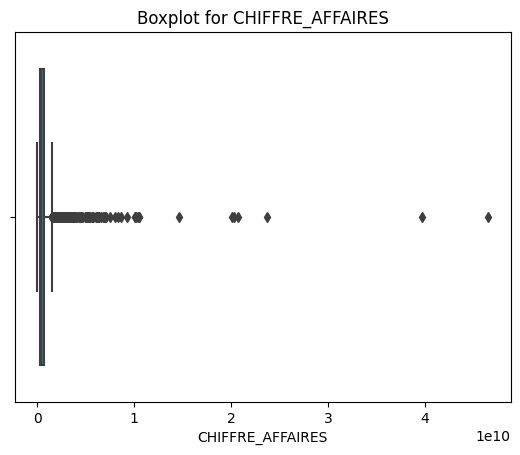

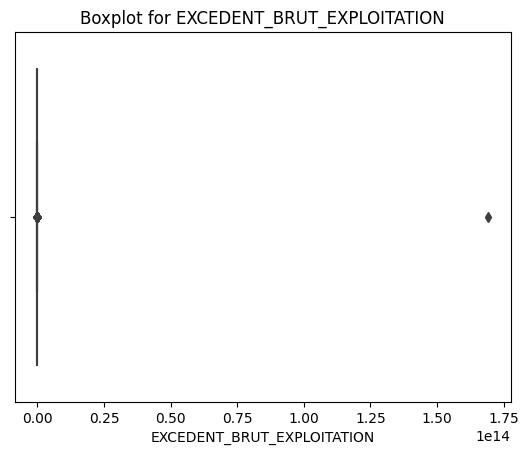

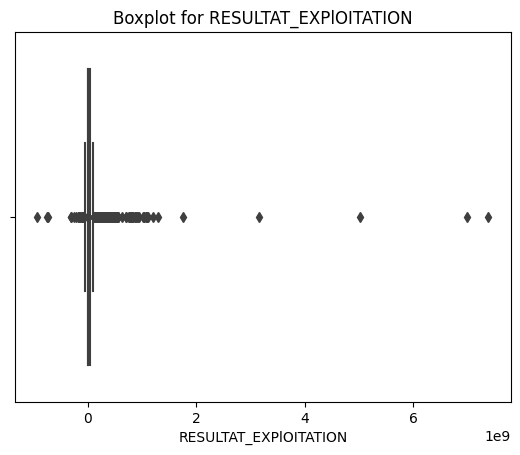

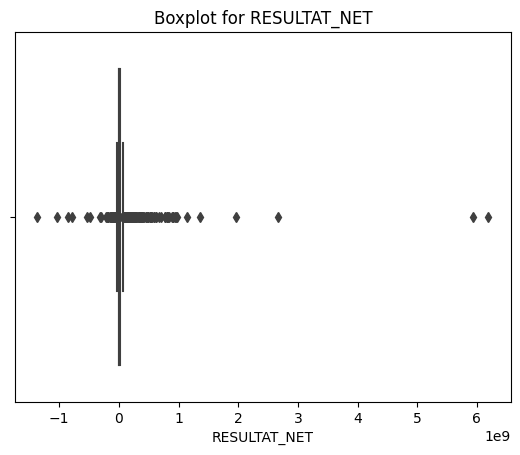

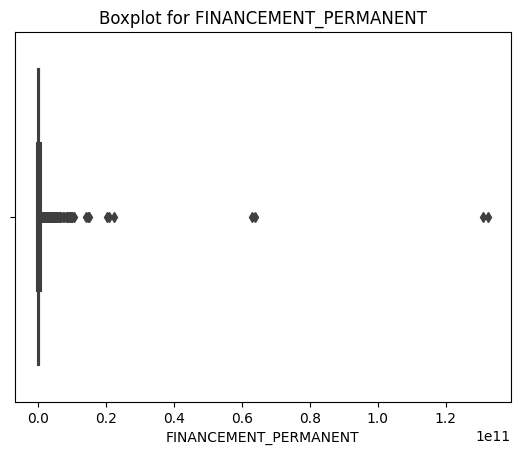

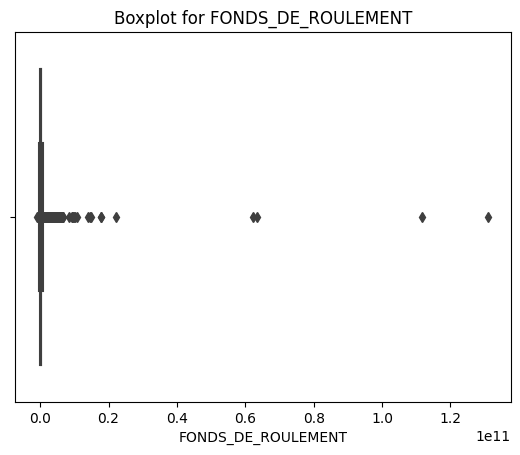

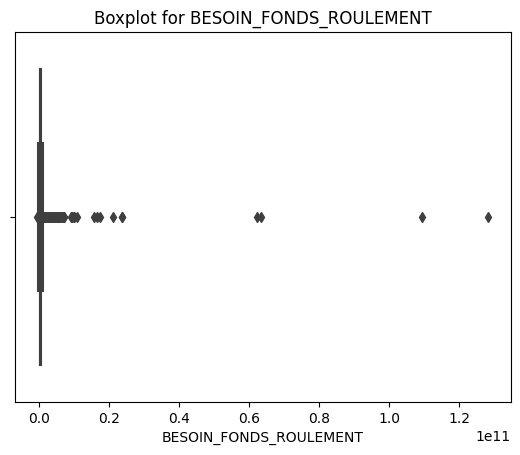

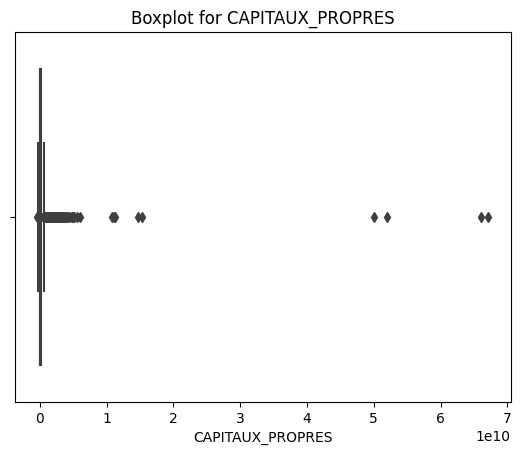

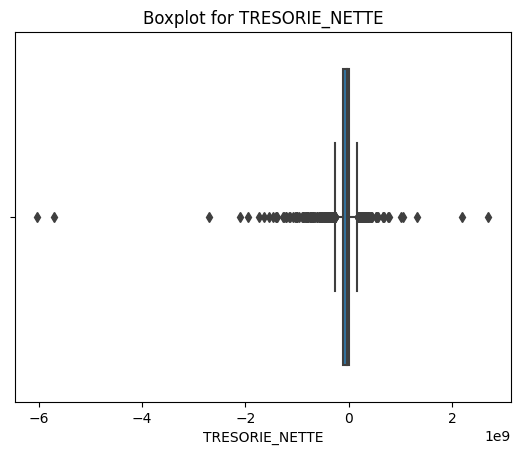

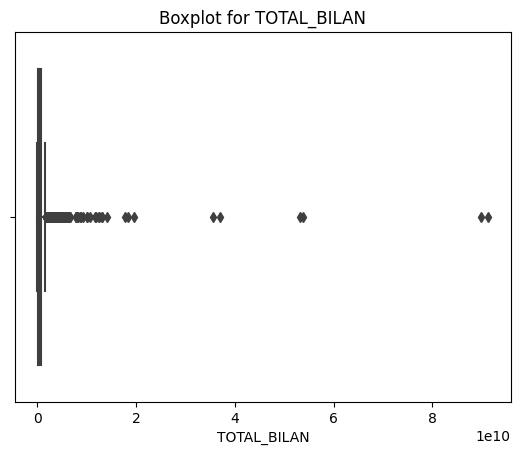

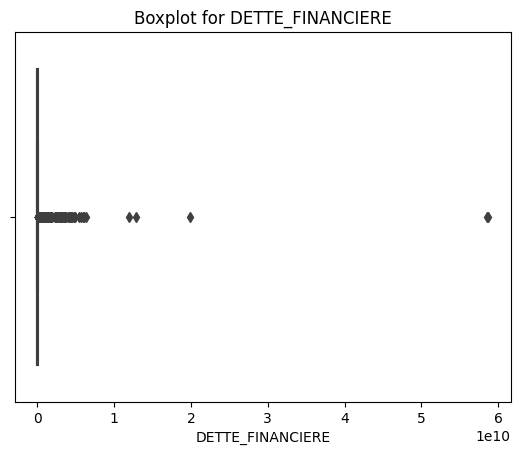

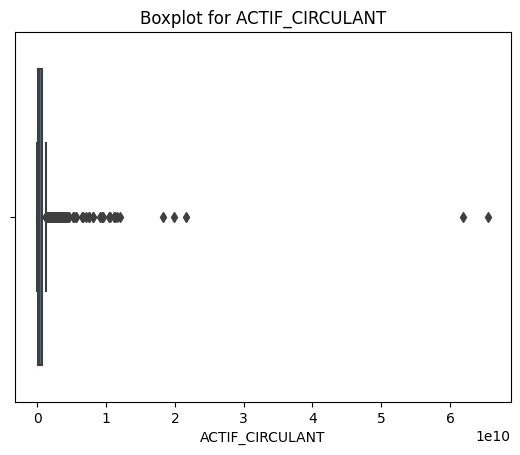

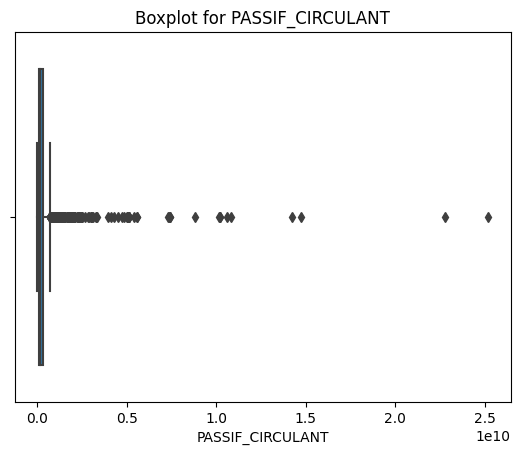

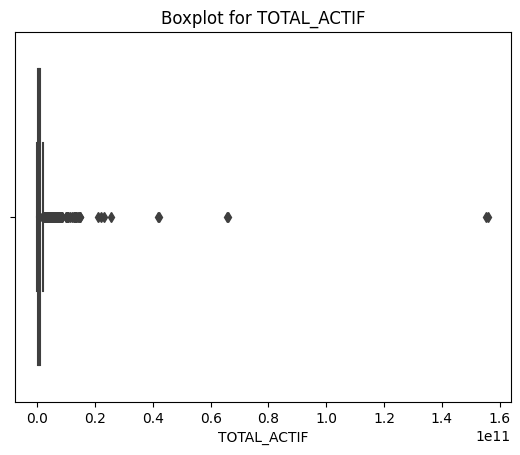

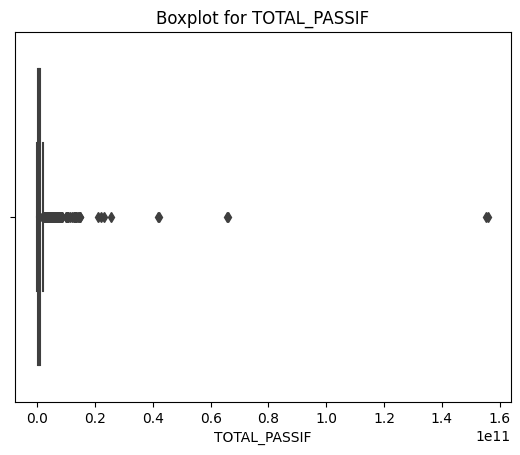

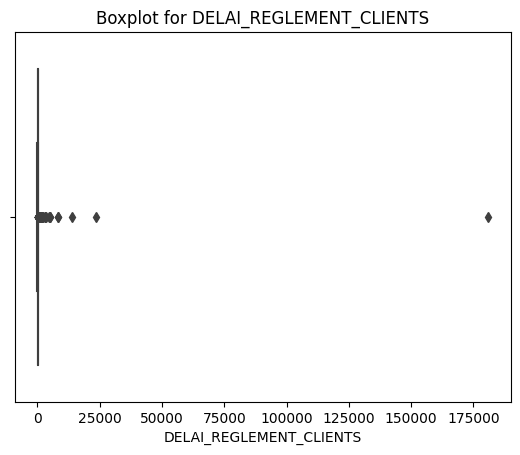

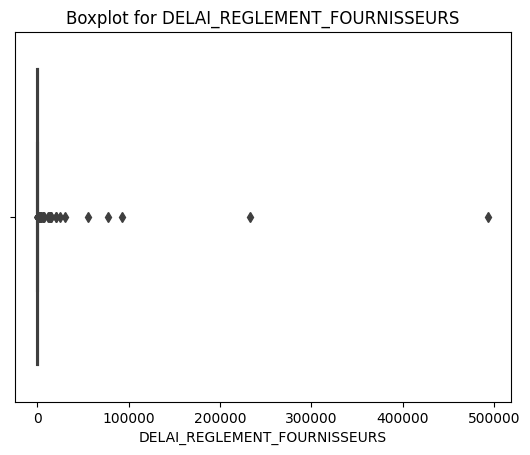

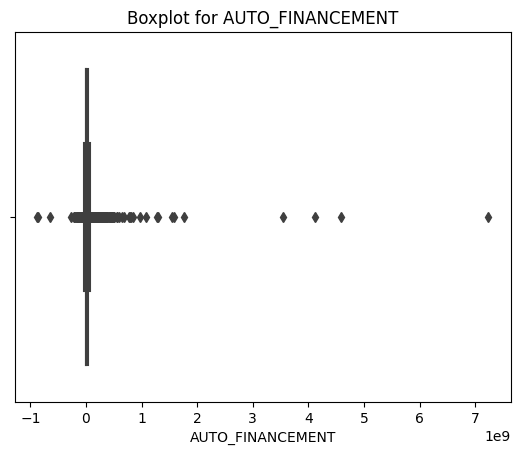

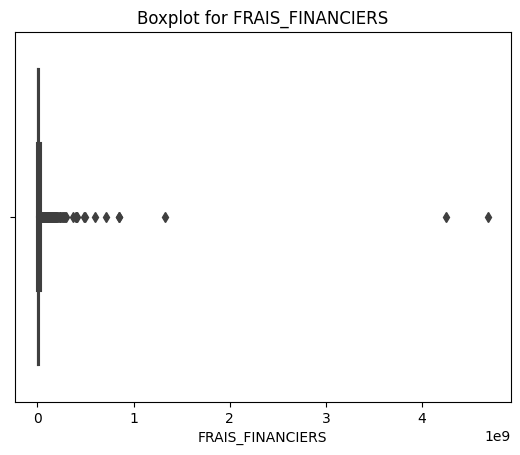

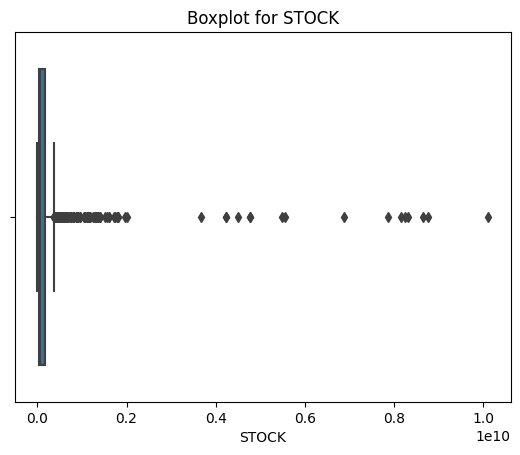

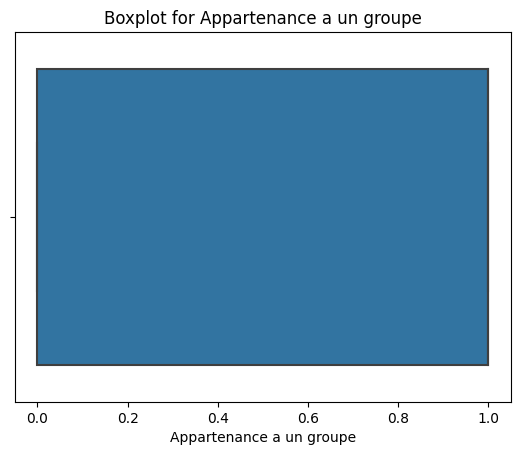

In [ ]:
# Boxplot for each numeric feature to visualize outliers (excluding 'defaut')
for col in numerical_features:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

3 (a). Counting Outliers for Each Numerical Column

The Z-score is a statistical measurement that indicates how many standard deviations a data point is from the mean of a dataset. A positive Z-score means the data point is above the mean, while a negative Z-score means it's below the mean. High absolute values of Z-score (e.g., above 3 or below -3) typically indicate that the data point is an outlier.

In [18]:
from scipy import stats
import pandas as pd  # Make sure pandas is imported

outlier_counts = {}

for col in numerical_features:
    z_scores = stats.zscore(data[col])
    # The mask for where z-scores are greater than the threshold, e.g., 3 for +-3 std deviations
    outliers = np.abs(z_scores) > 3
    outlier_count = np.sum(outliers)
    outlier_counts[col] = outlier_count

print("Number of outliers in each numerical column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Number of outliers in each numerical column:
CHIFFRE_AFFAIRES: 17
EXCEDENT_BRUT_EXPLOITATION: 1
RESULTAT_EXPlOITATION: 10
RESULTAT_NET: 16
FINANCEMENT_PERMANENT: 7
FONDS_DE_ROULEMENT: 7
BESOIN_FONDS_ROULEMENT: 9
CAPITAUX_PROPRES: 9
TRESORIE_NETTE: 24
TOTAL_BILAN: 10
DETTE_FINANCIERE: 5
ACTIF_CIRCULANT: 15
PASSIF_CIRCULANT: 25
TOTAL_ACTIF: 9
TOTAL_PASSIF: 9
DELAI_REGLEMENT_CLIENTS: 2
DELAI_REGLEMENT_FOURNISSEURS: 5
AUTO_FINANCEMENT: 13
FRAIS_FINANCIERS: 7
STOCK: 16
Appartenance a un groupe: 0


3 (b). Handling Outliers by Imputation


In [19]:
from sklearn.impute import SimpleImputer

# Assuming 'data' is your DataFrame
imputed_data = data.copy()  # Create a copy to preserve the original data
imputer = SimpleImputer(strategy='median')

for col in numerical_features:
    if outlier_counts[col] > 0:  # If outliers are present
        # Reshape data for imputation
        outlier_column_reshaped = imputed_data[col].values.reshape(-1, 1)
        # Impute outliers using the median of the column
        imputed_data[col] = imputer.fit_transform(outlier_column_reshaped)



4. Checking Distribution Again After Outlier Handling



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'imputed_data' is your DataFrame after outlier imputation

# Summary statistics
summary_after_imputation = imputed_data.describe()
print(summary_after_imputation)


            defaut  CHIFFRE_AFFAIRES  EXCEDENT_BRUT_EXPLOITATION  \
count  1521.000000      1.521000e+03                1.521000e+03   
mean      0.034845      8.836712e+08                1.113634e+11   
std       0.183449      2.260292e+09                4.338997e+12   
min       0.000000      2.407834e+05               -7.244920e+08   
25%       0.000000      2.201000e+08                9.256980e+06   
50%       0.000000      3.666245e+08                2.337180e+07   
75%       0.000000      7.300641e+08                6.484448e+07   
max       1.000000      4.654680e+10                1.692210e+14   

       RESULTAT_EXPlOITATION  RESULTAT_NET  FINANCEMENT_PERMANENT  \
count           1.521000e+03  1.521000e+03           1.521000e+03   
mean            7.084423e+07  4.466026e+07           8.179797e+08   
std             3.374614e+08  2.689441e+08           5.511221e+09   
min            -9.228820e+08 -1.365167e+09          -2.181978e+08   
25%             6.046446e+06  1.626665e+06

Checking for visible difference between pre and post imputation by using different approaches :

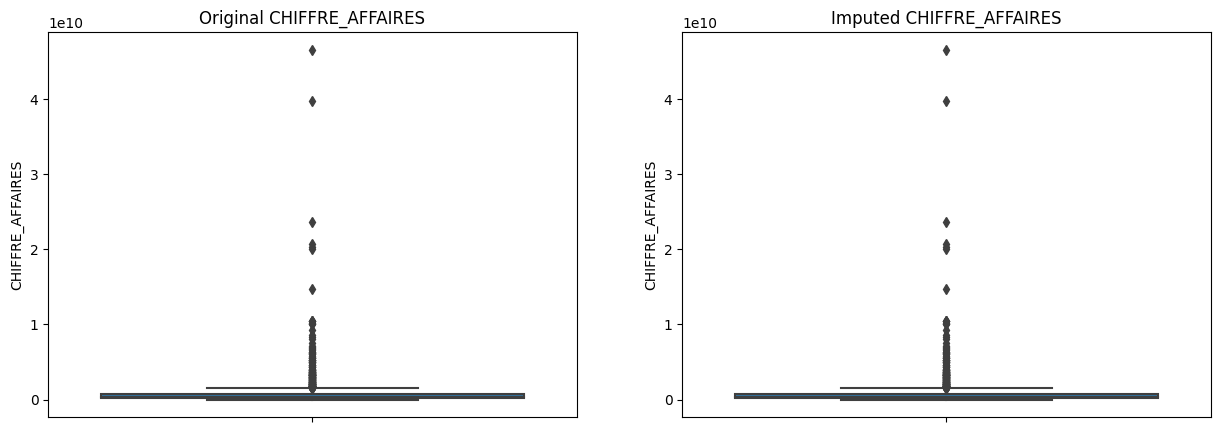

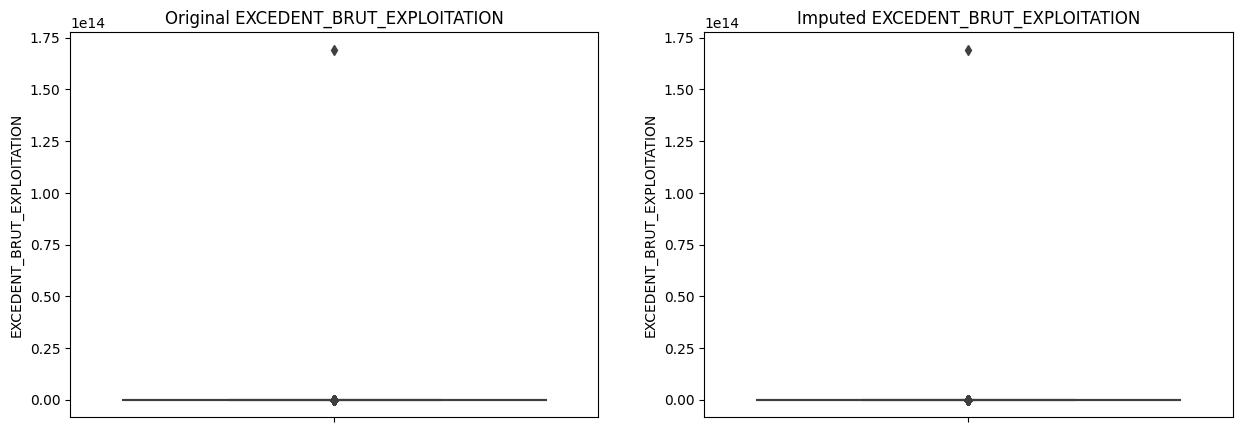

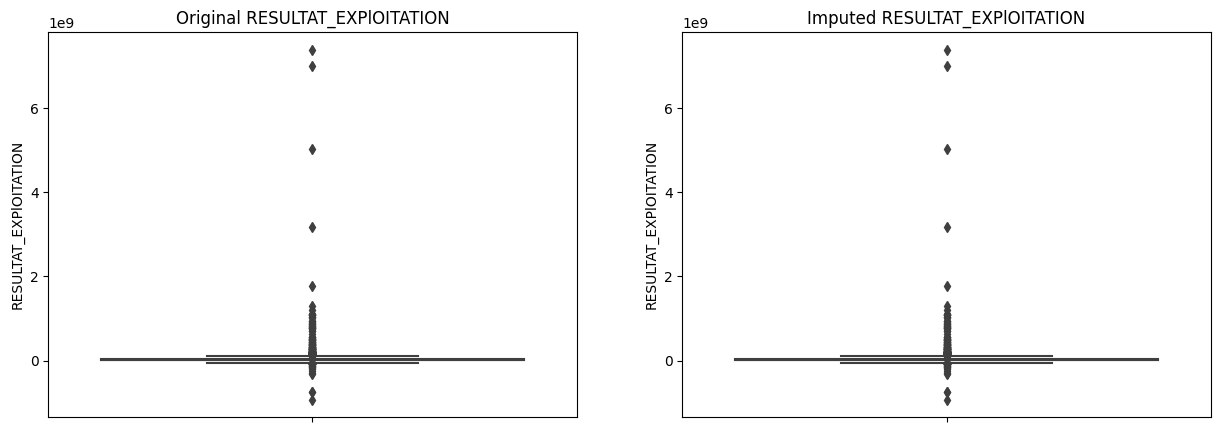

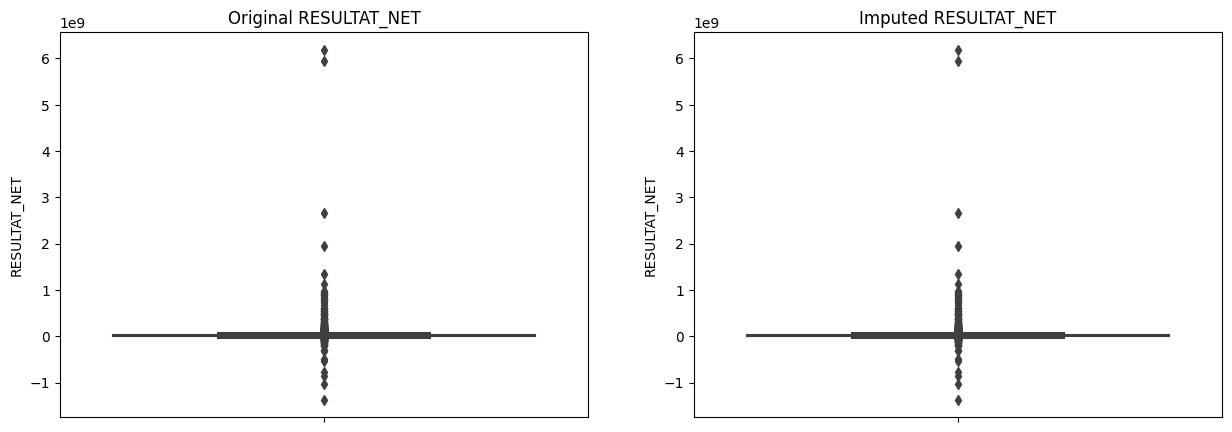

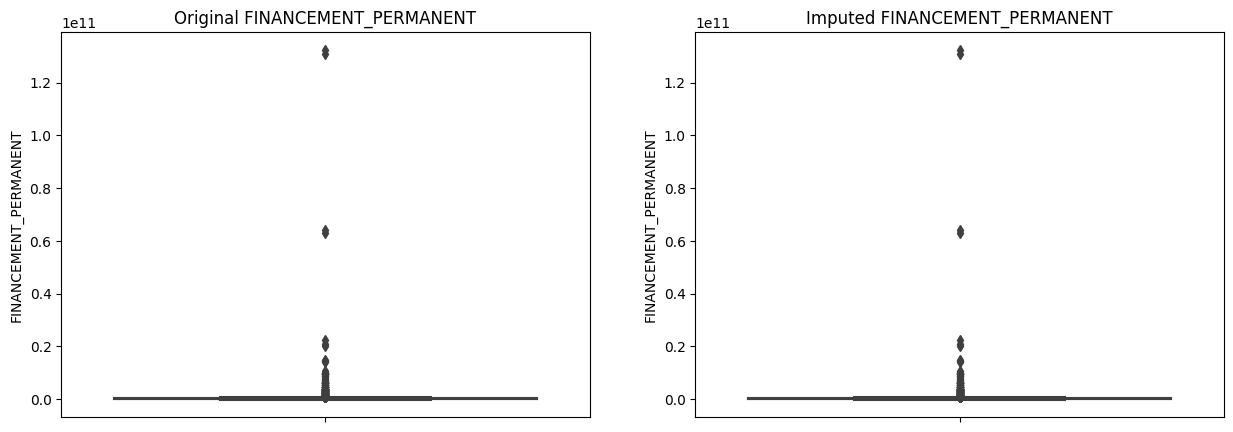

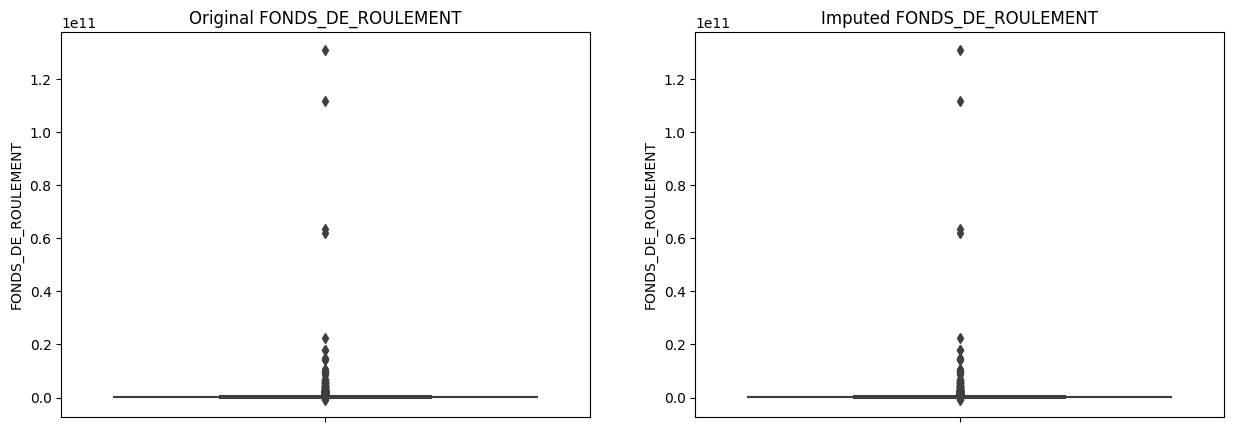

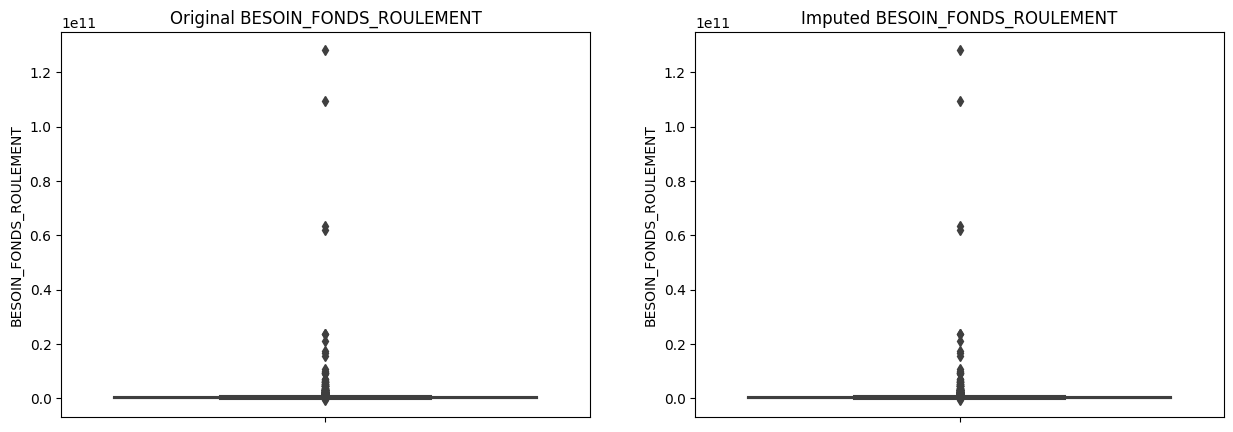

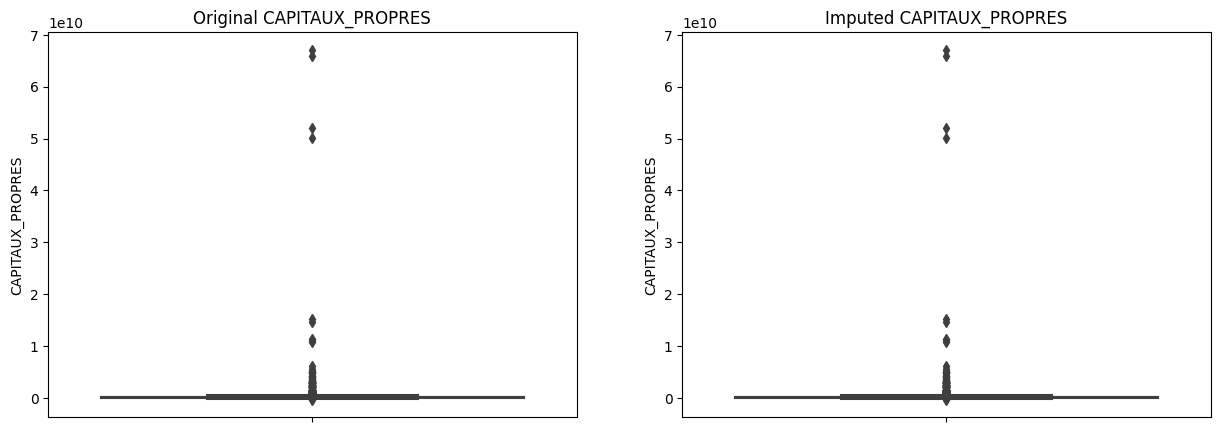

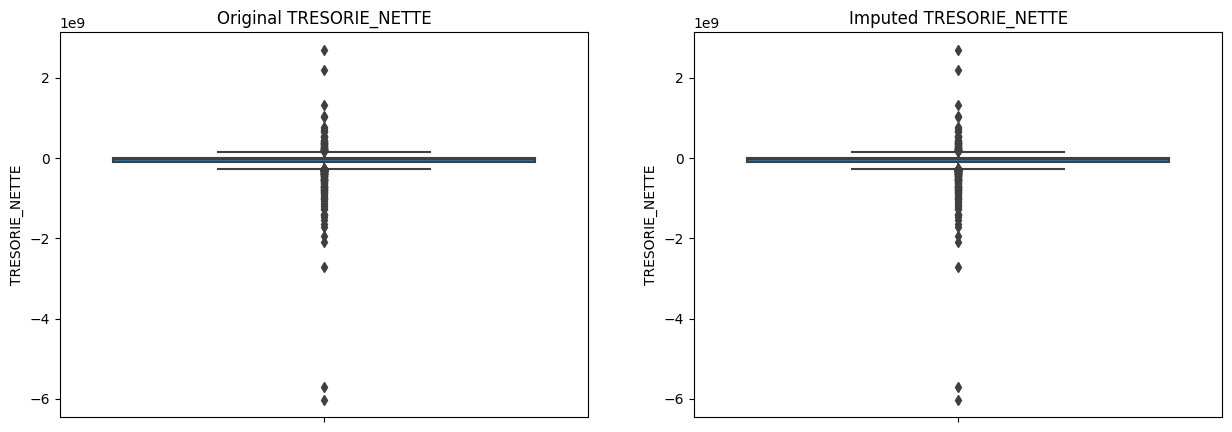

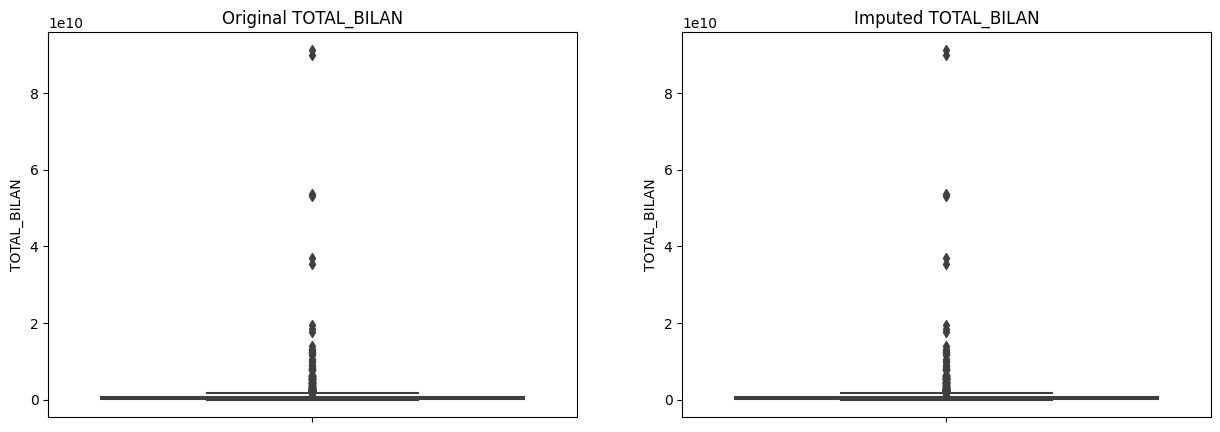

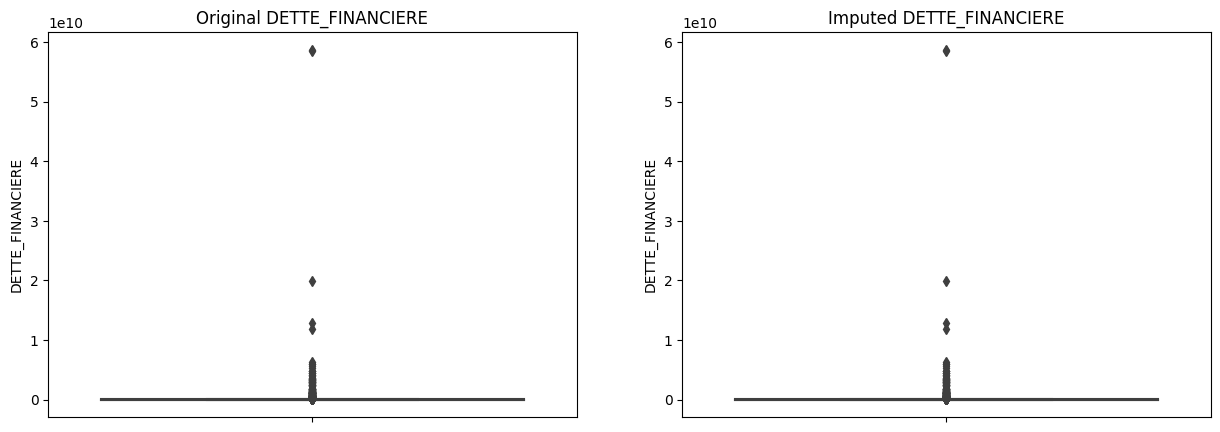

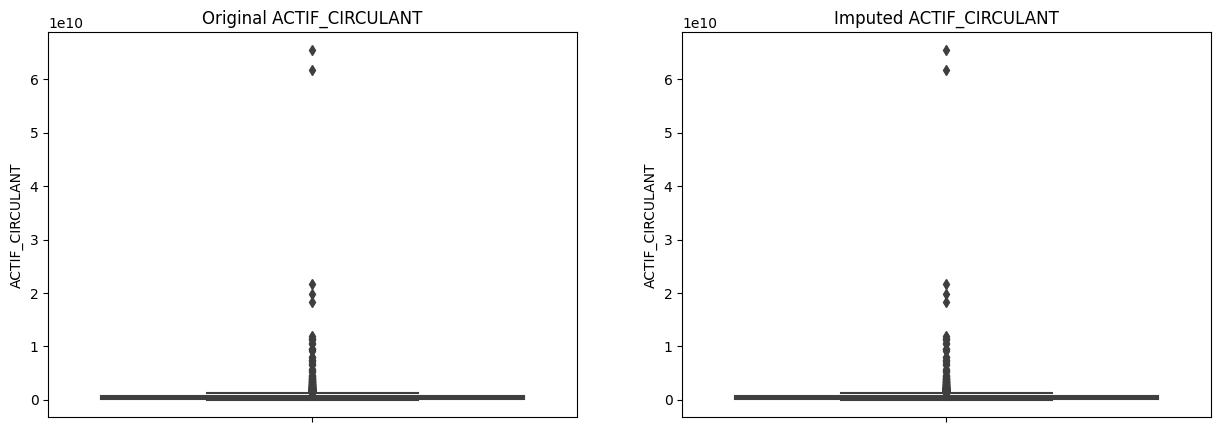

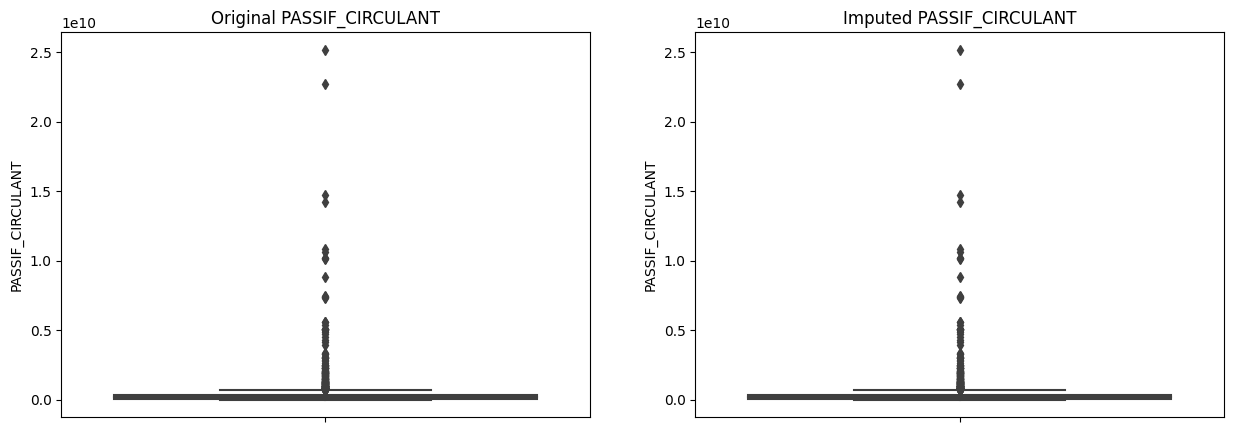

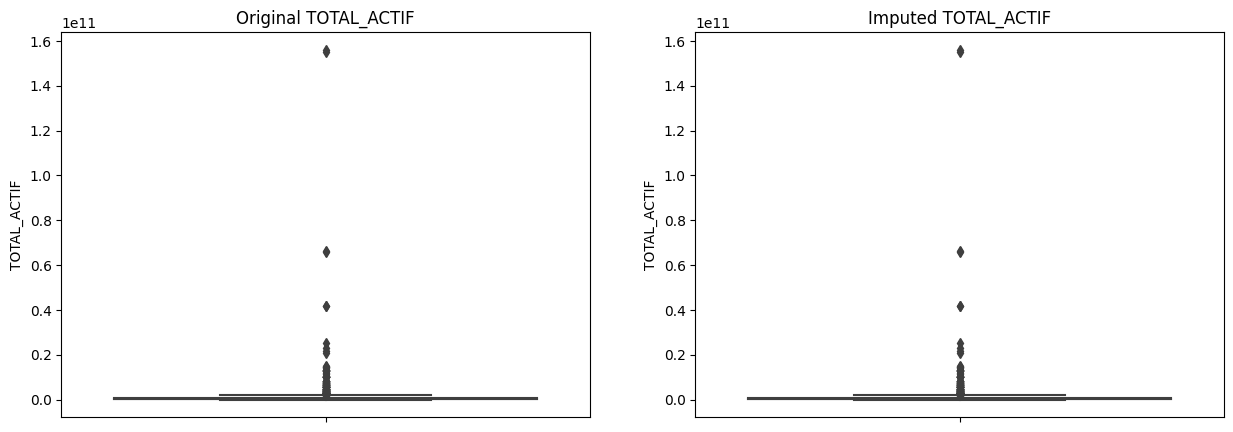

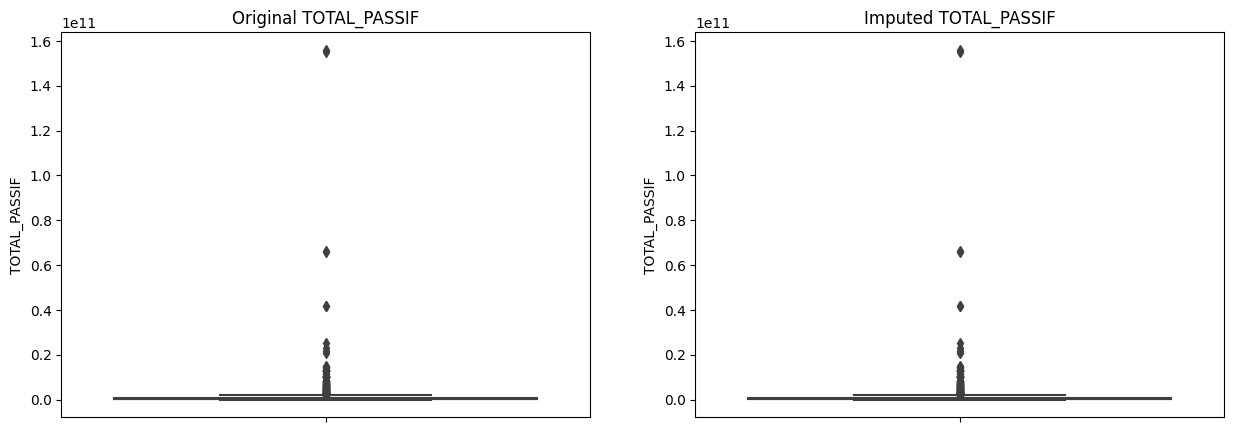

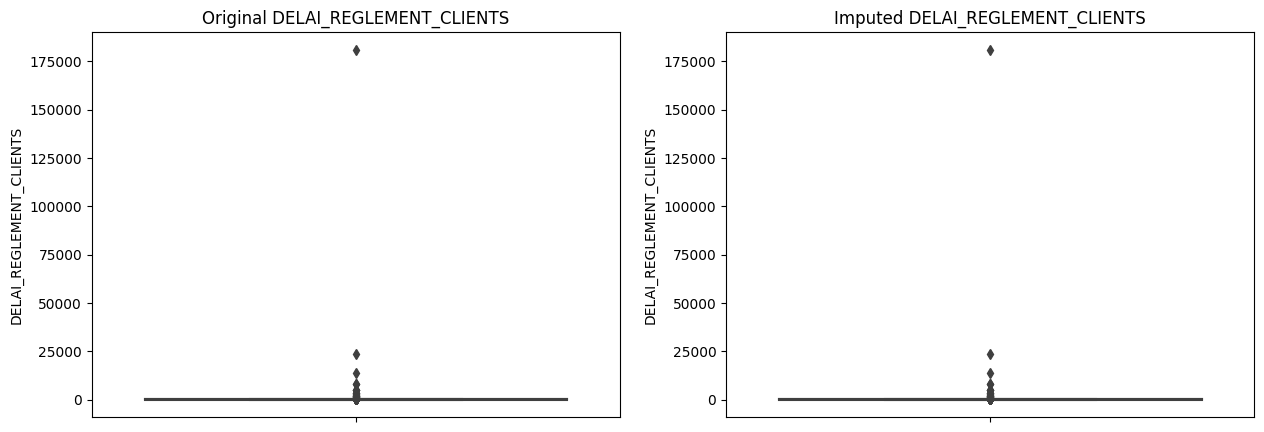

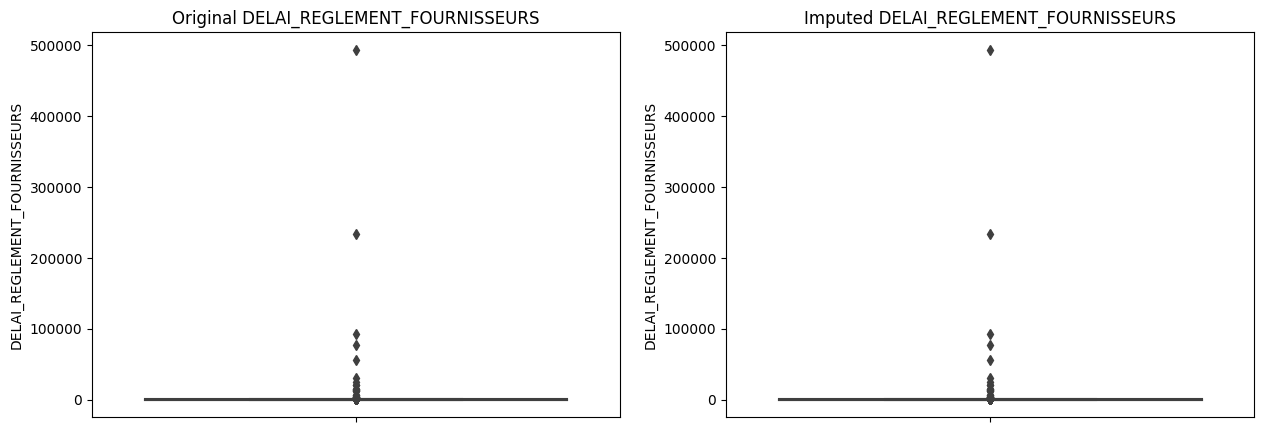

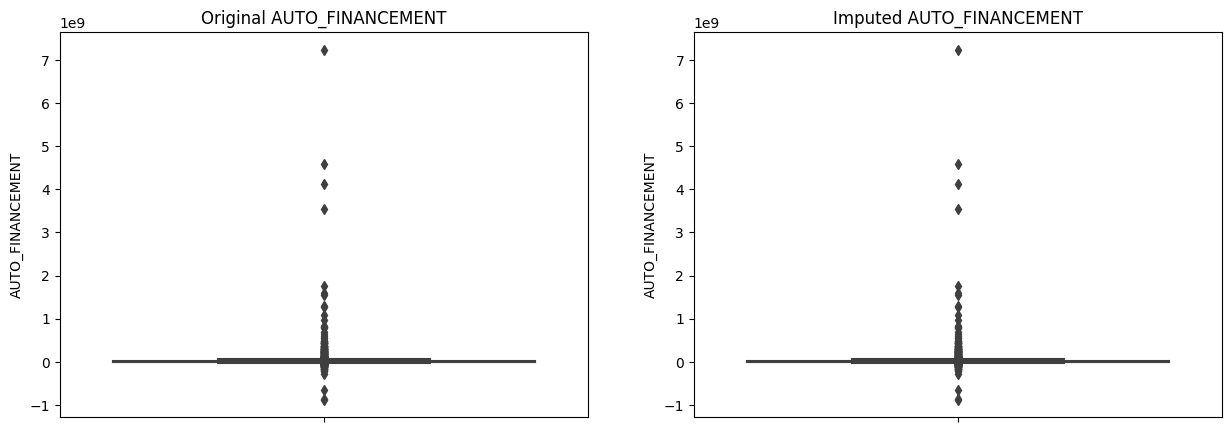

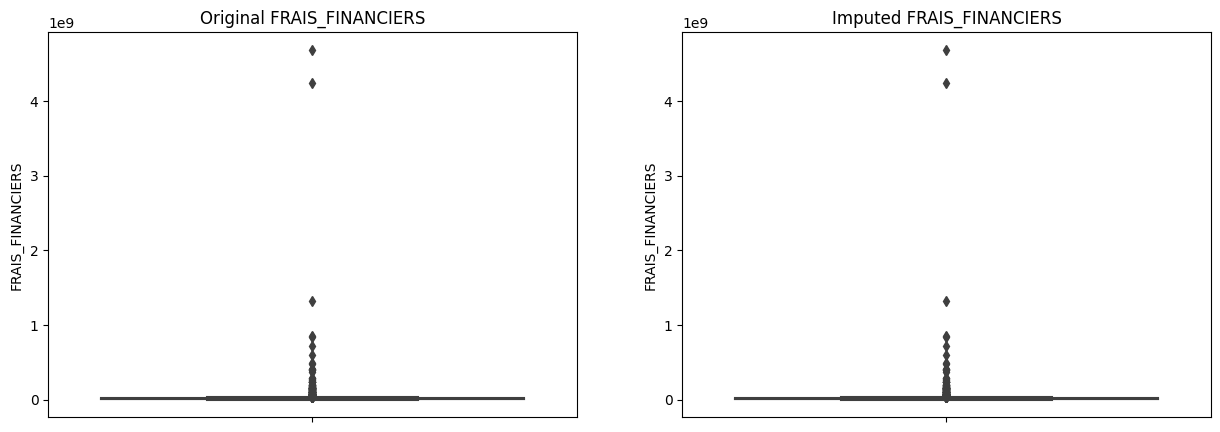

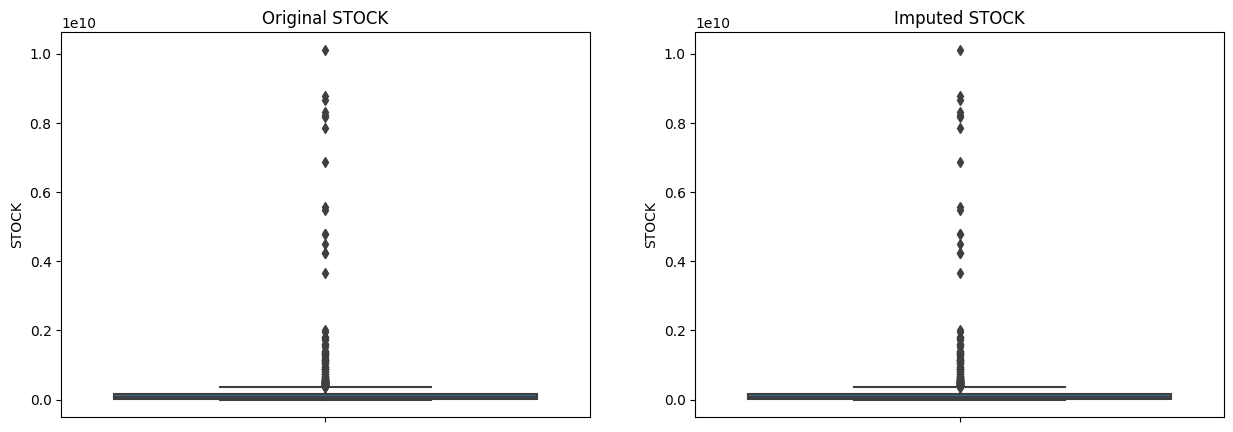

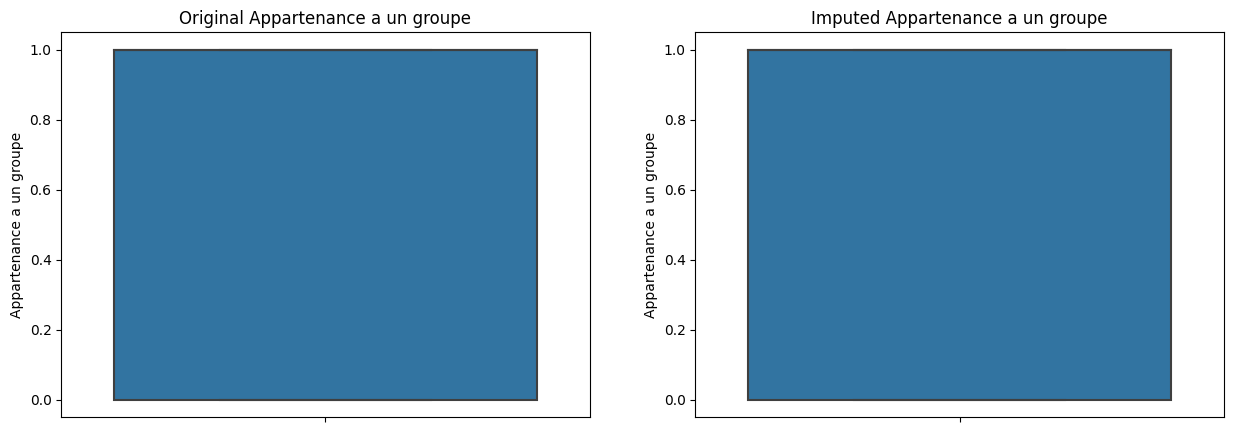

In [21]:

for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot for the original data
    sns.boxplot(y=data[col], ax=axes[0])
    axes[0].set_title(f'Original {col}')

    # Boxplot for the imputed data
    sns.boxplot(y=imputed_data[col], ax=axes[1])
    axes[1].set_title(f'Imputed {col}')

    plt.show()

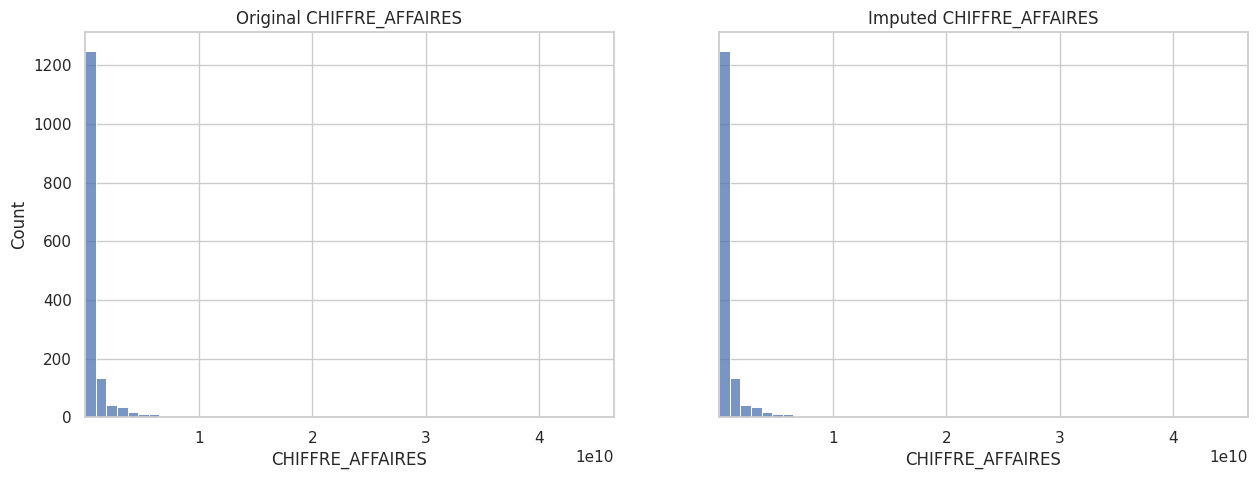

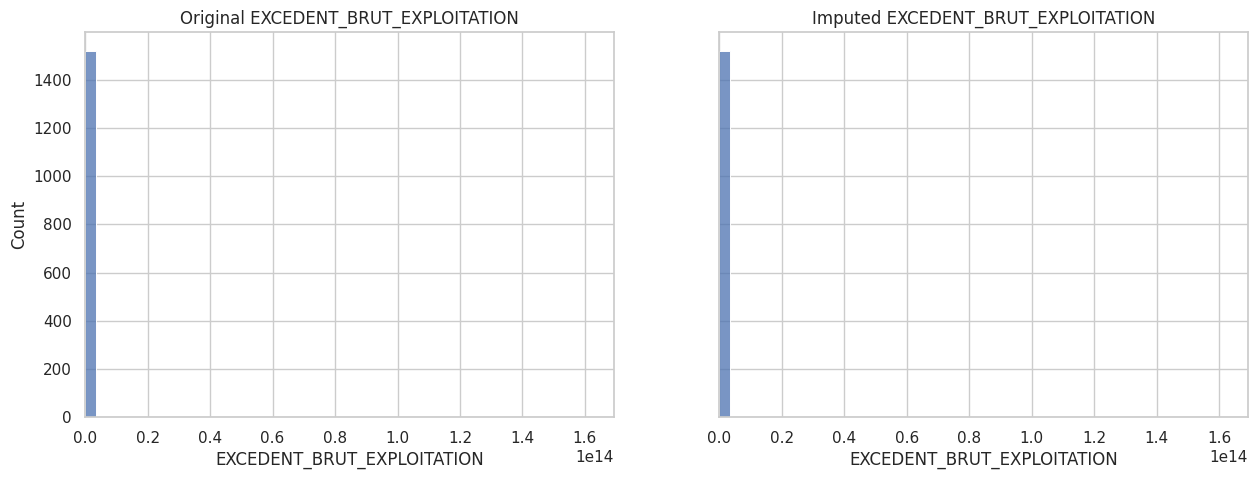

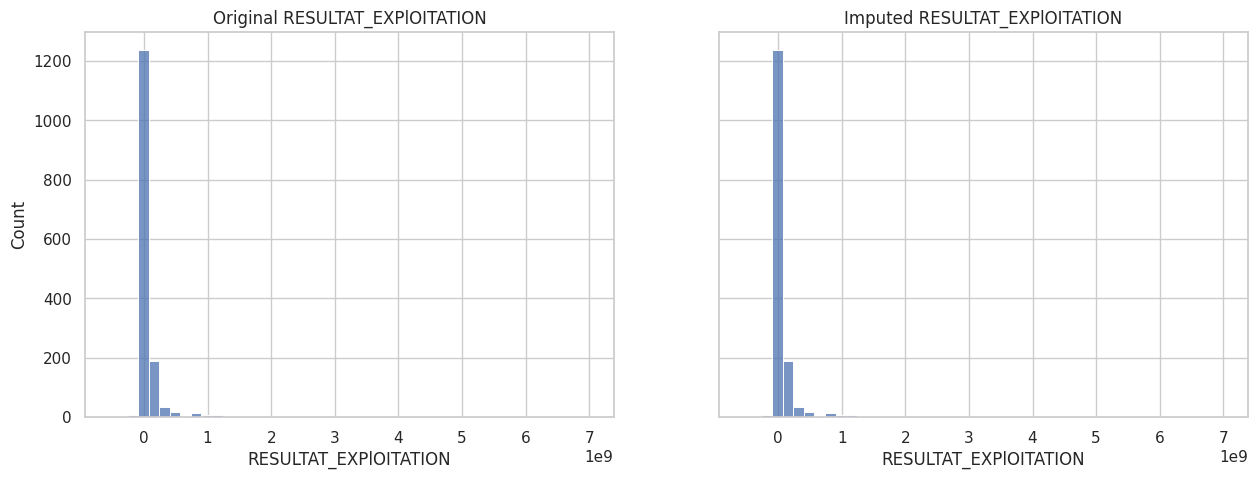

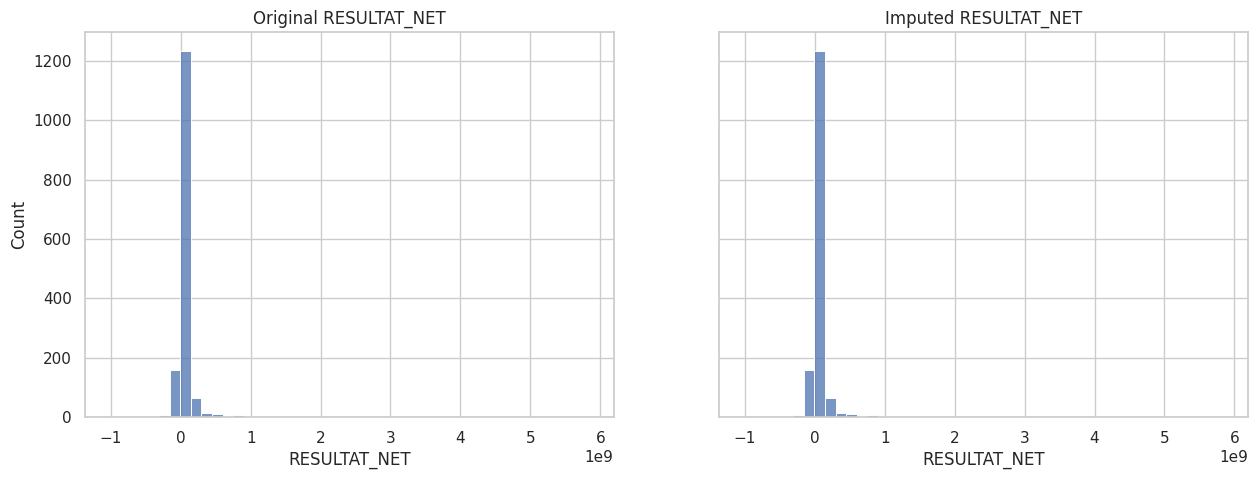

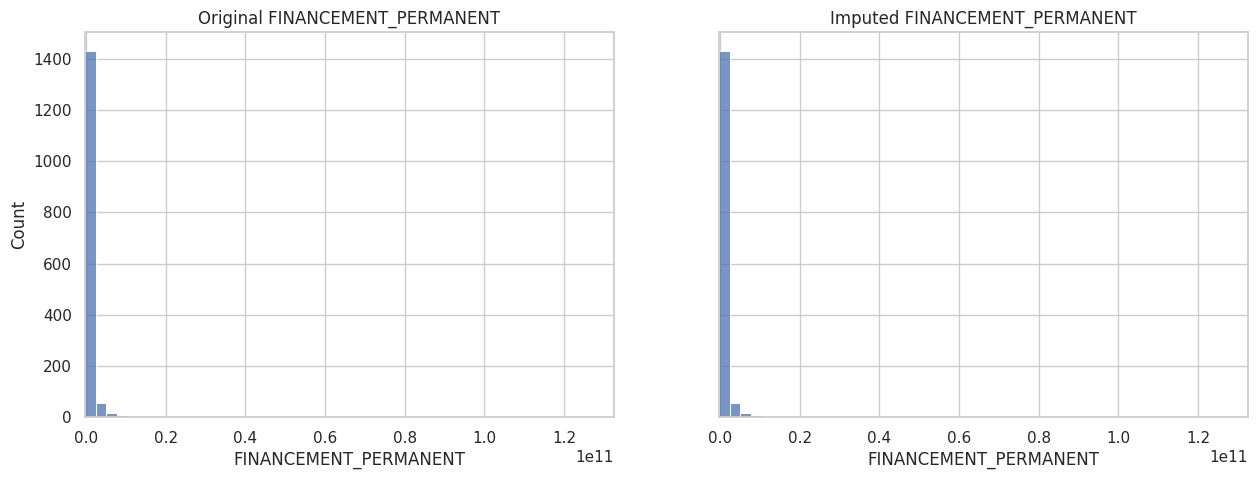

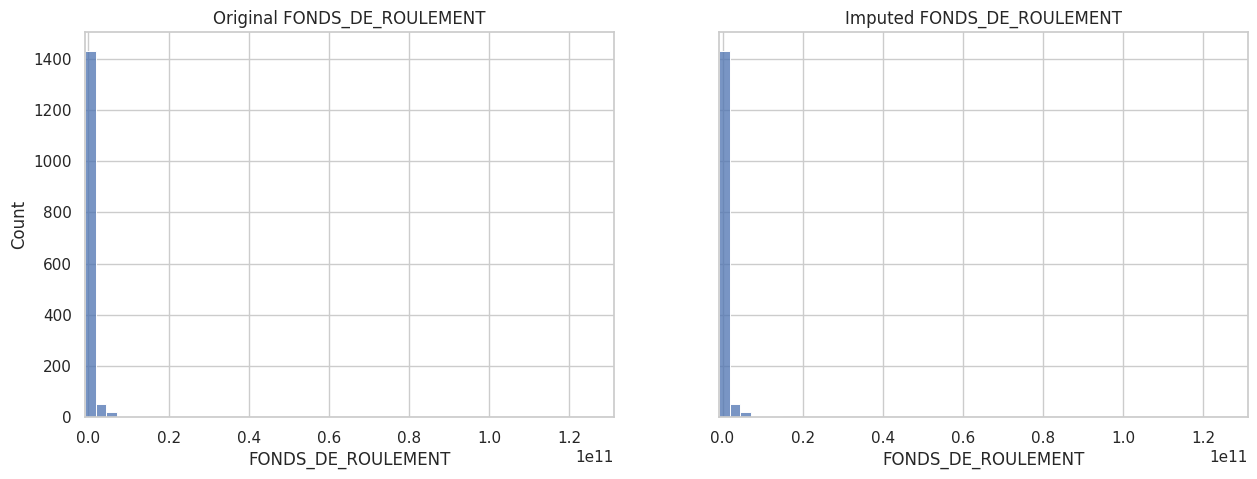

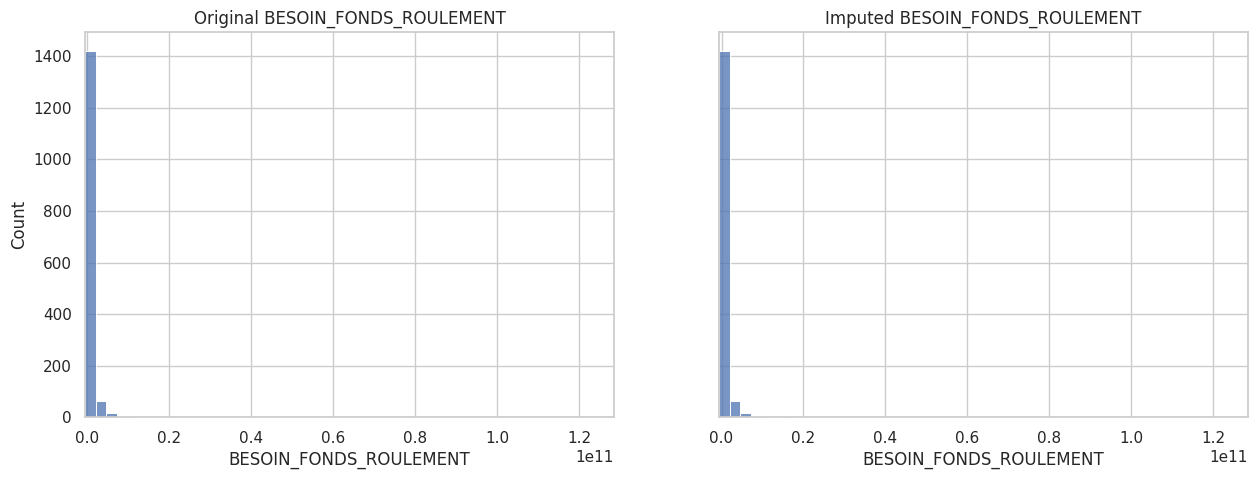

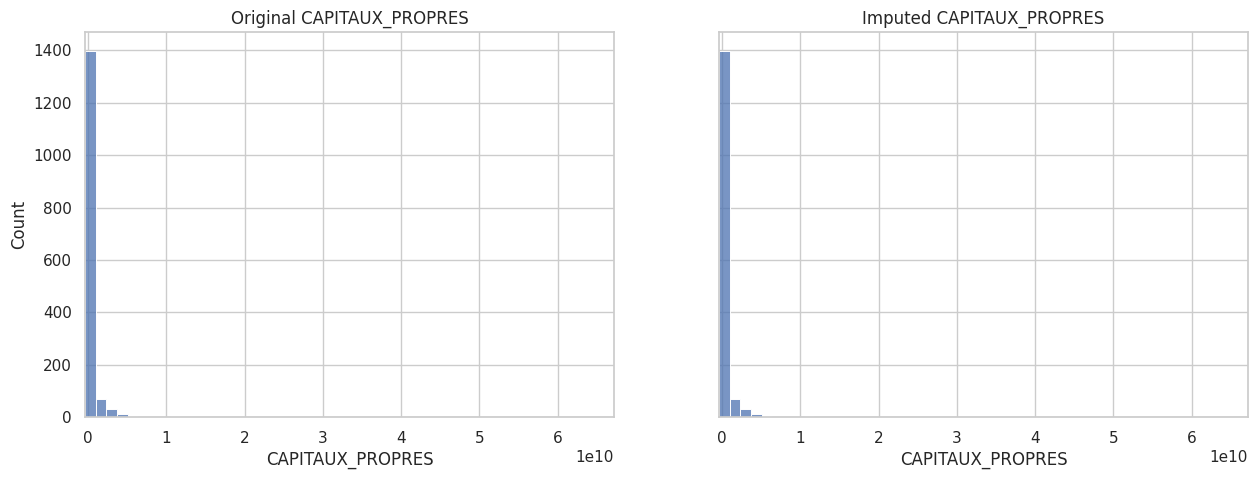

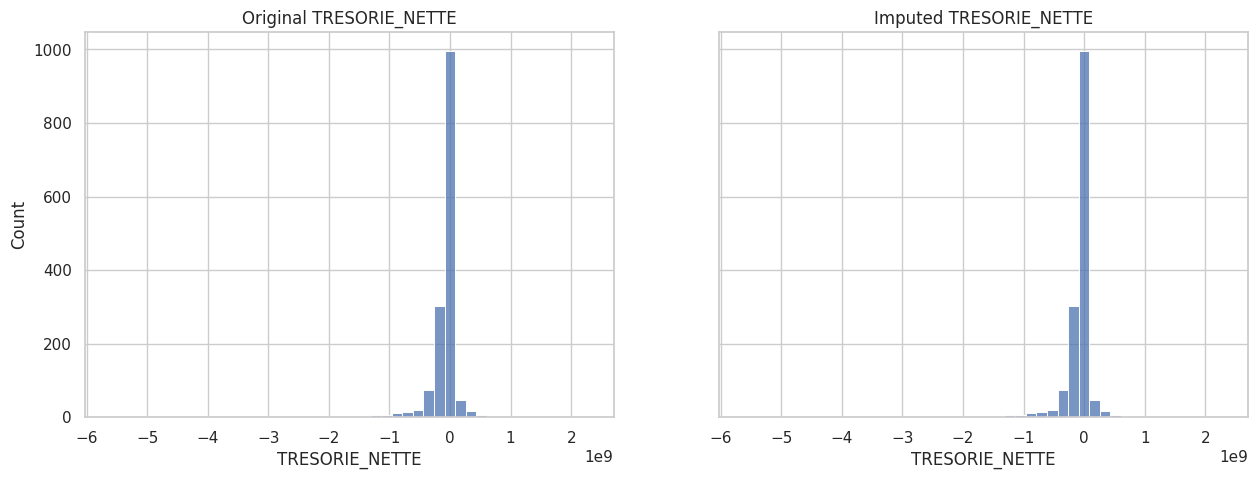

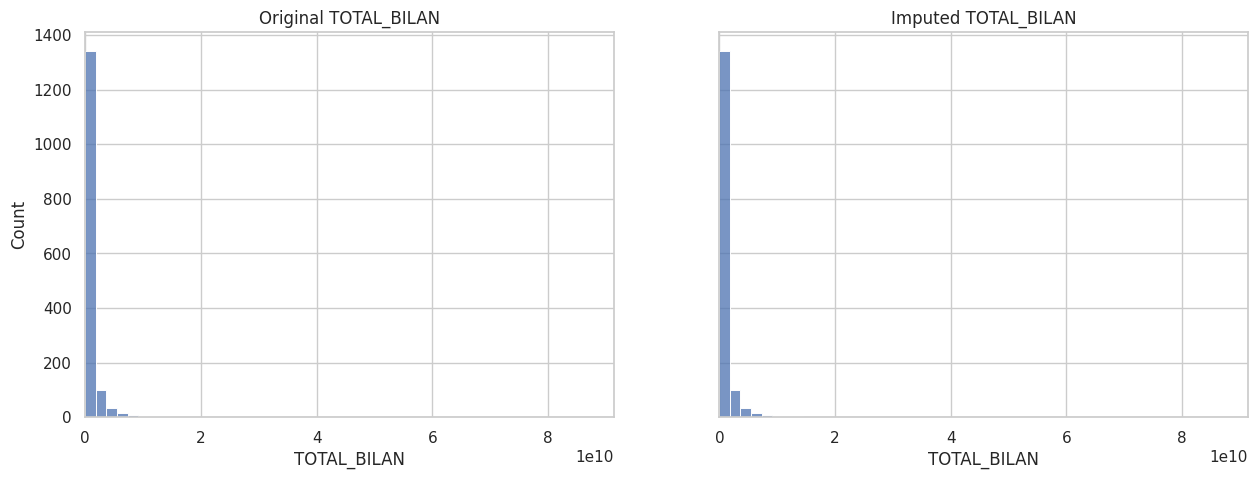

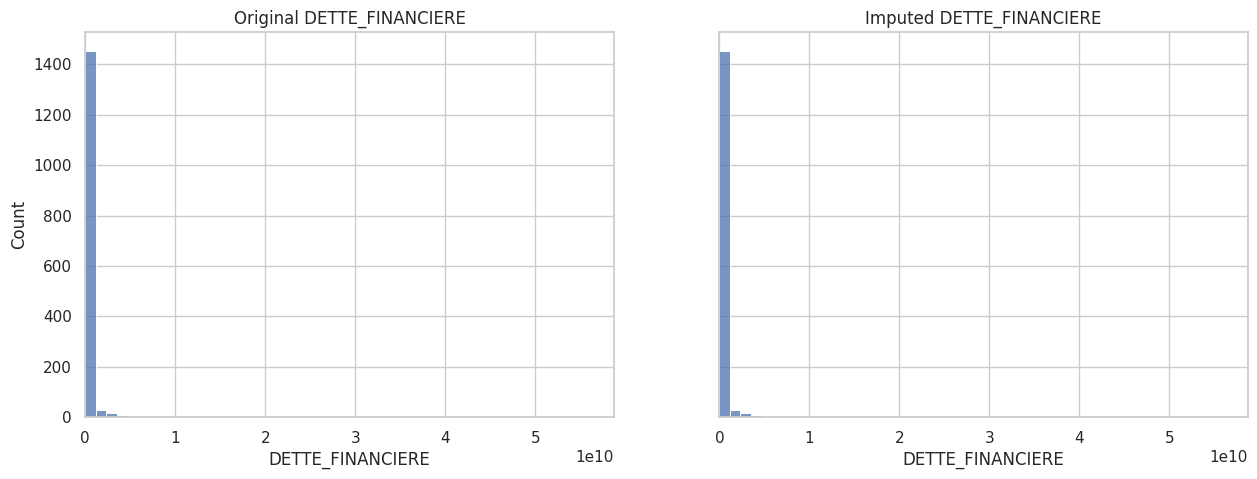

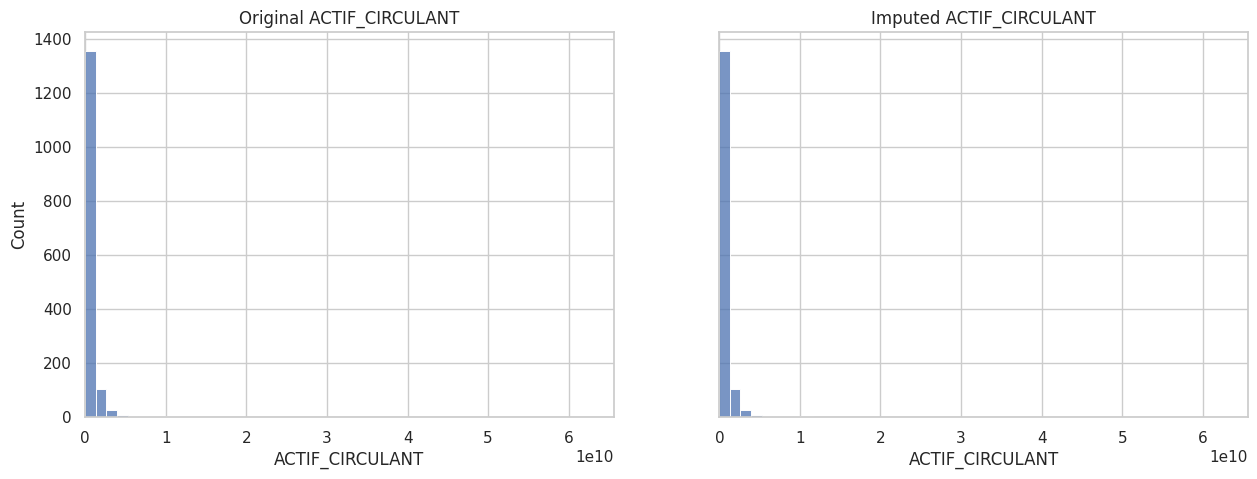

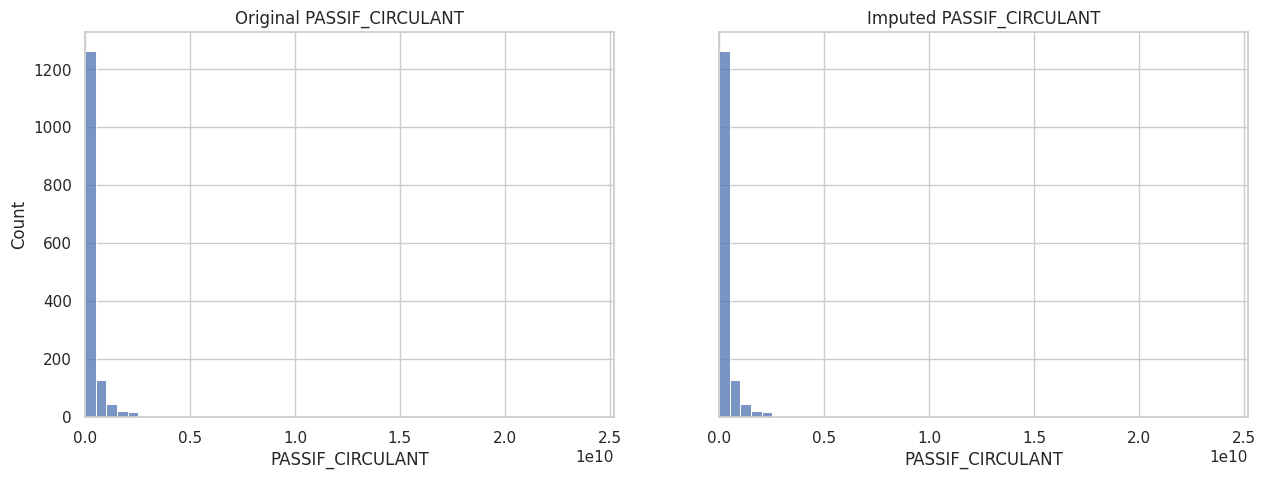

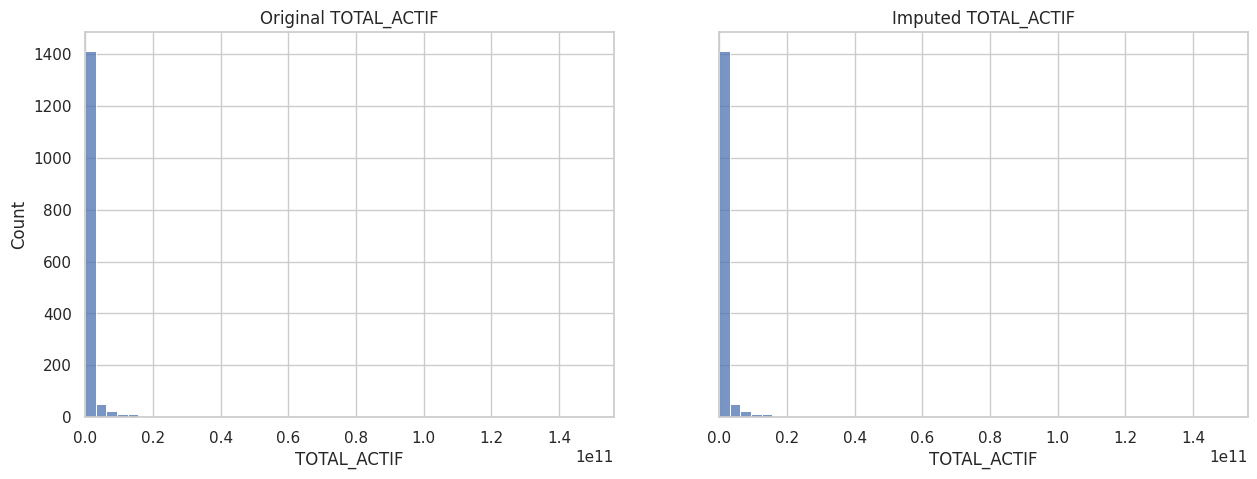

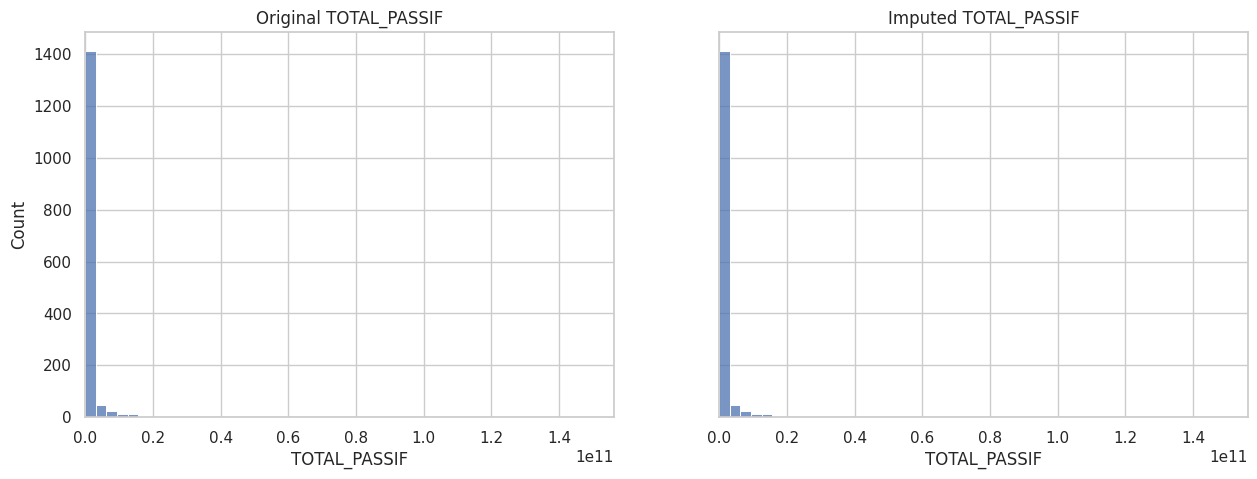

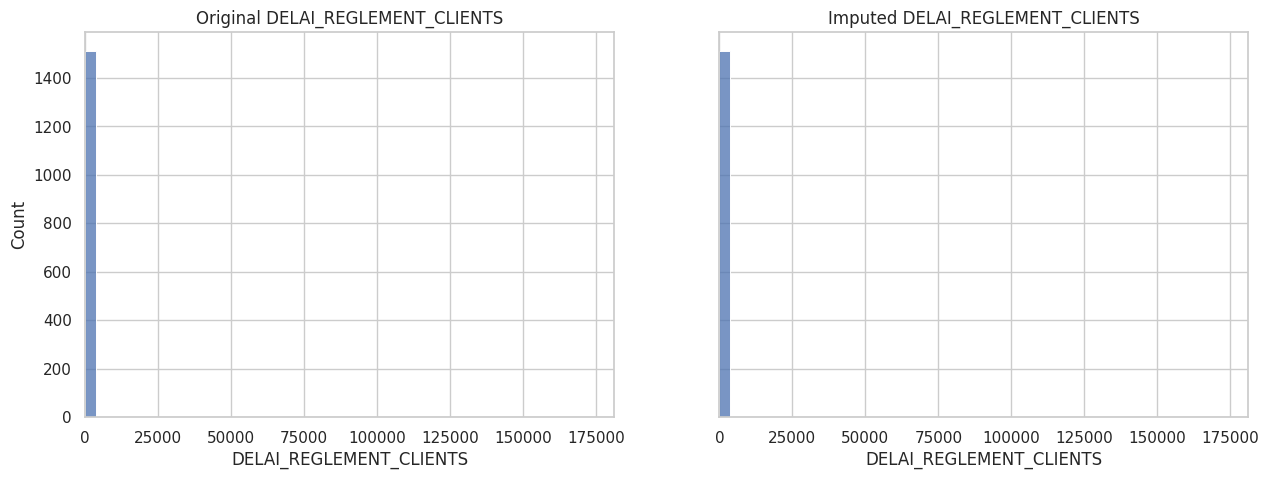

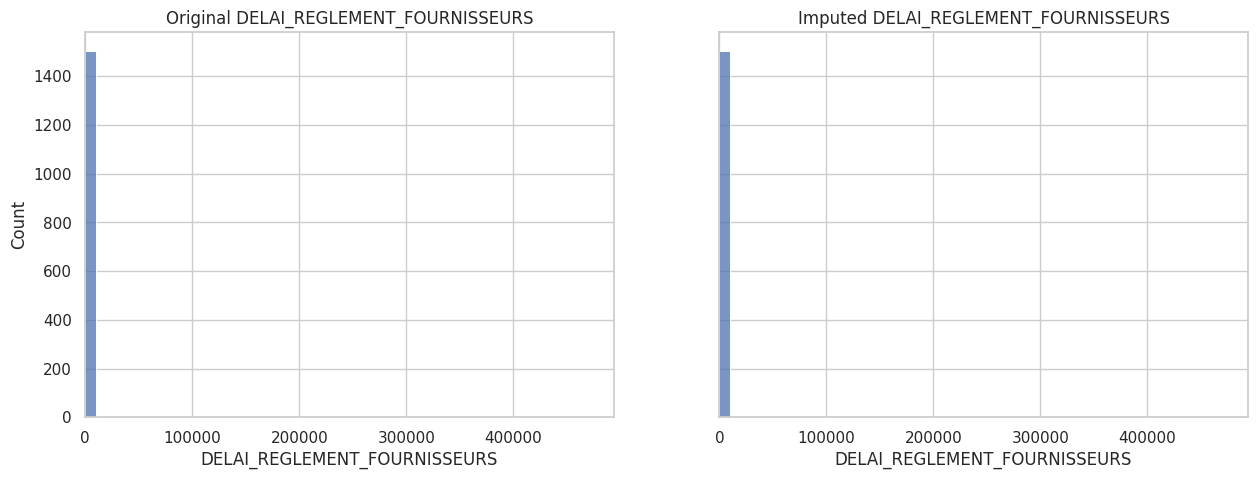

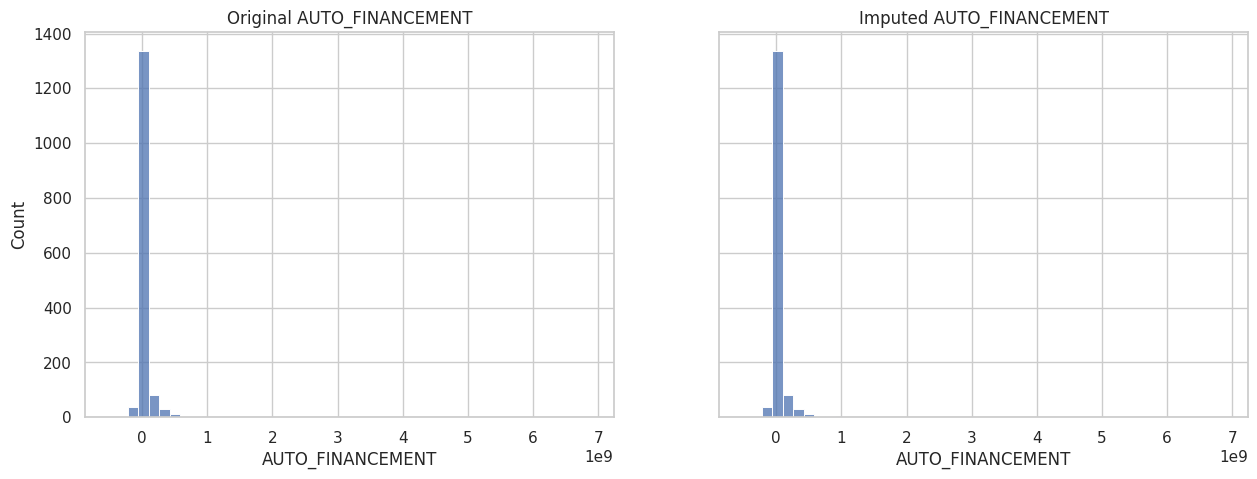

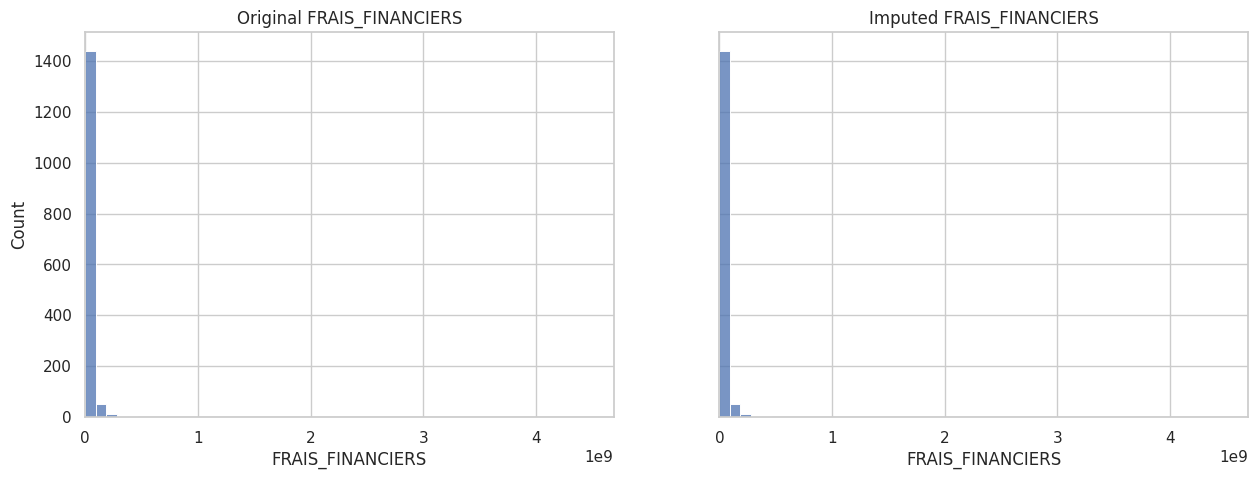

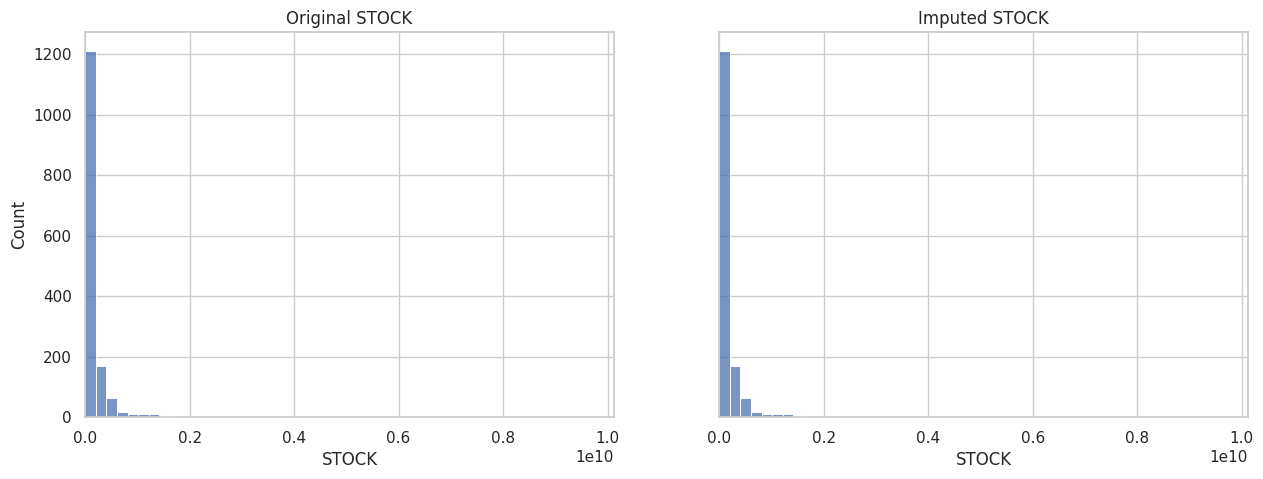

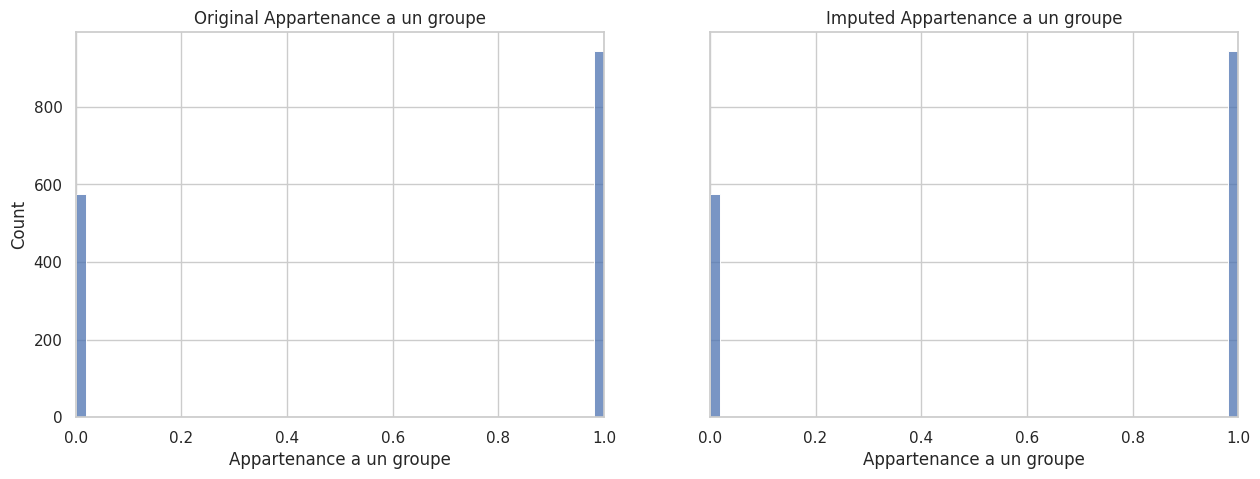

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style='whitegrid')

# Define the number of bins for the histogram
bins = 50  # You can adjust this value as needed

# Iterate through the numerical features
for col in numerical_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

    # Plot histogram for the original data
    sns.histplot(data[col], bins=bins, ax=axes[0], kde=False)
    axes[0].set_title(f'Original {col}')

    # Plot histogram for the imputed data
    sns.histplot(imputed_data[col], bins=bins, ax=axes[1], kde=False)
    axes[1].set_title(f'Imputed {col}')

    # Ensure the same x-axis limits on both histograms
    x_min = min(data[col].min(), imputed_data[col].min())
    x_max = max(data[col].max(), imputed_data[col].max())
    axes[0].set_xlim(x_min, x_max)
    axes[1].set_xlim(x_min, x_max)

    plt.show()

## There's no visible difference, so we'll change the previous imputation method which is  ' median method'

## Winsorization

Before winsorization: CHIFFRE_AFFAIRES count    1.521000e+03
mean     8.836712e+08
std      2.260292e+09
min      2.407834e+05
25%      2.201000e+08
50%      3.666245e+08
75%      7.300641e+08
max      4.654680e+10
Name: CHIFFRE_AFFAIRES, dtype: float64
After winsorization: CHIFFRE_AFFAIRES count    1.521000e+03
mean     6.817848e+08
std      7.985454e+08
min      1.241899e+08
25%      2.201000e+08
50%      3.666245e+08
75%      7.300641e+08
max      3.273088e+09
Name: CHIFFRE_AFFAIRES, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


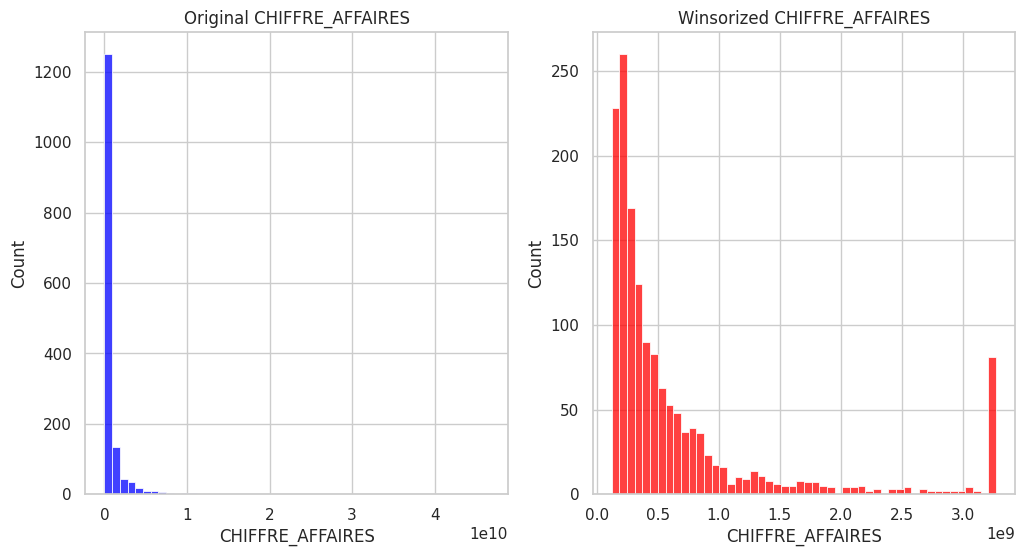

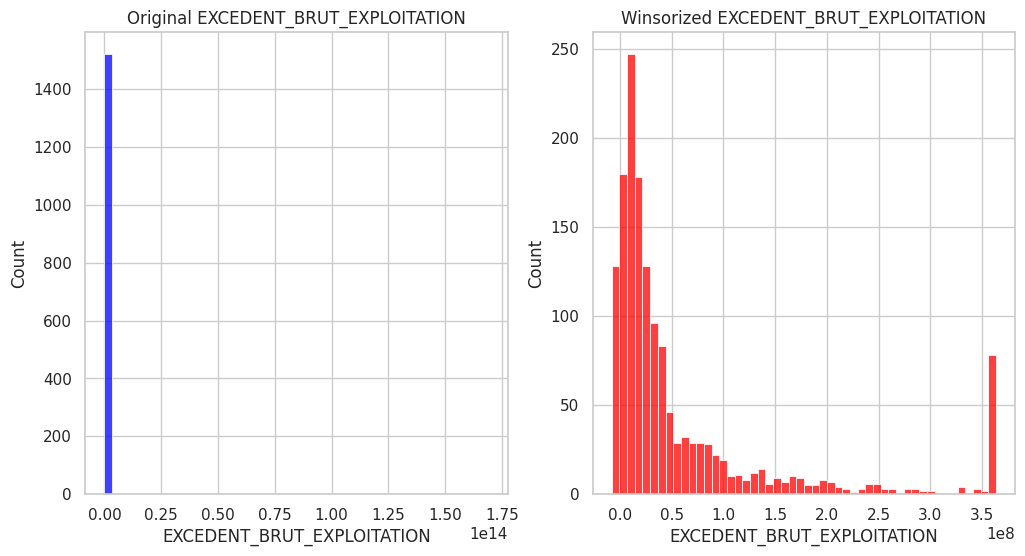

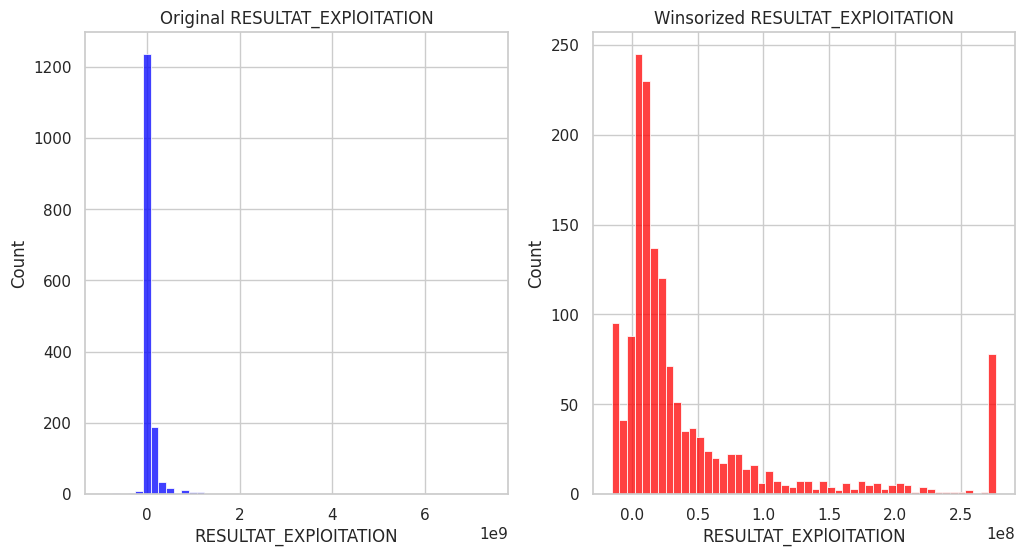

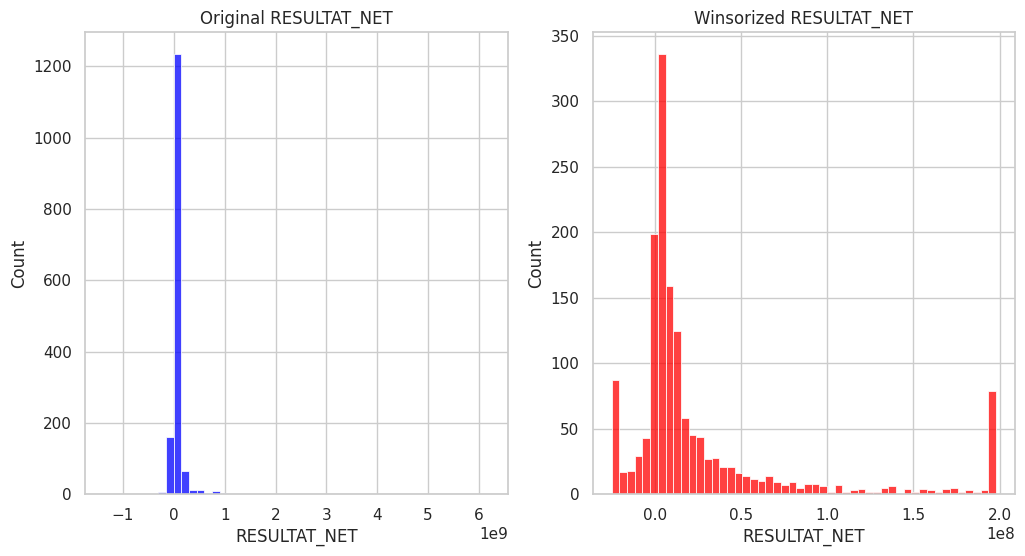

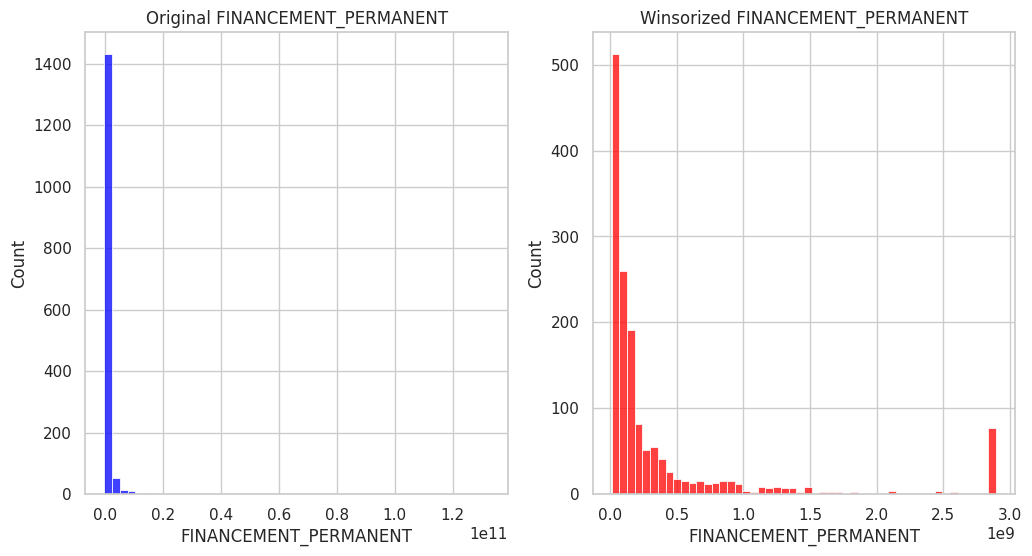

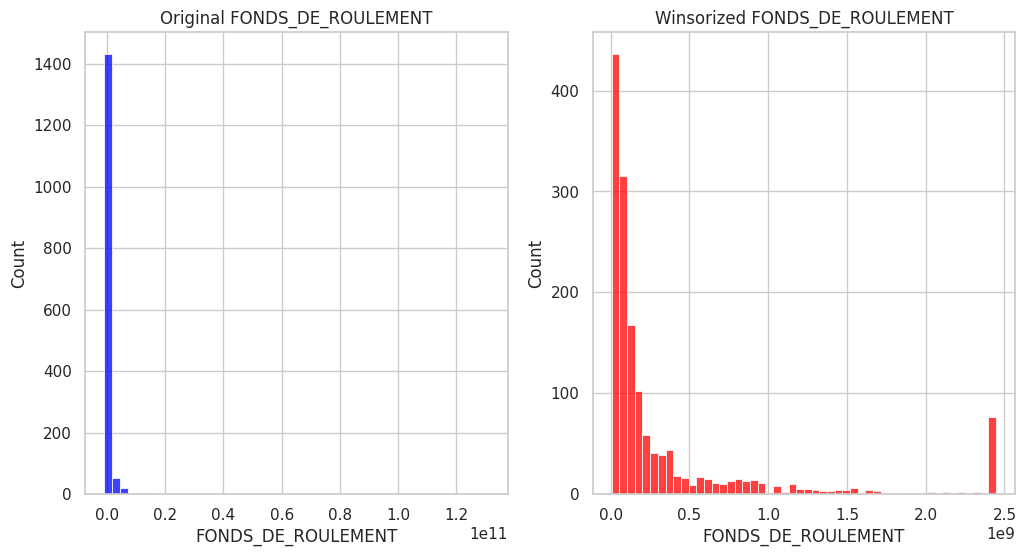

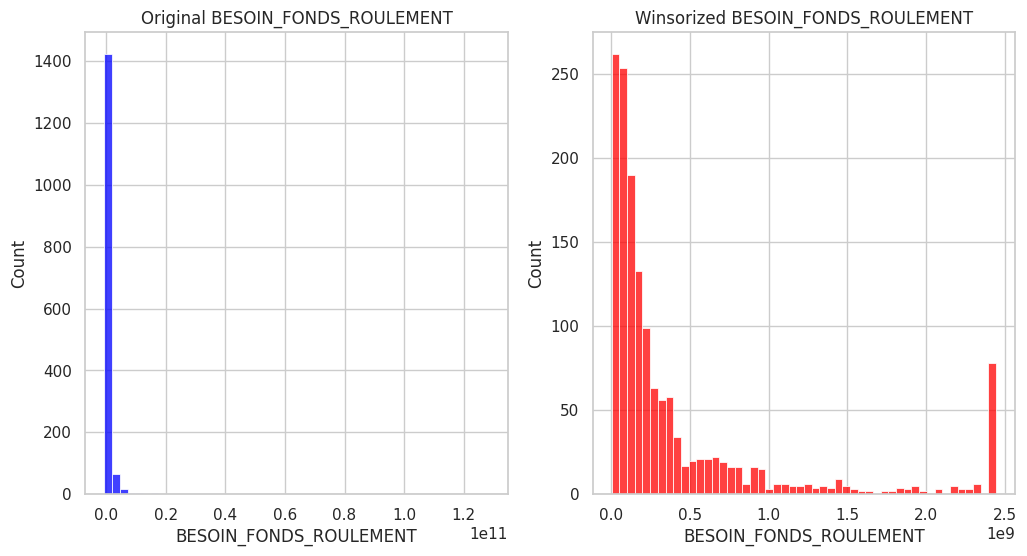

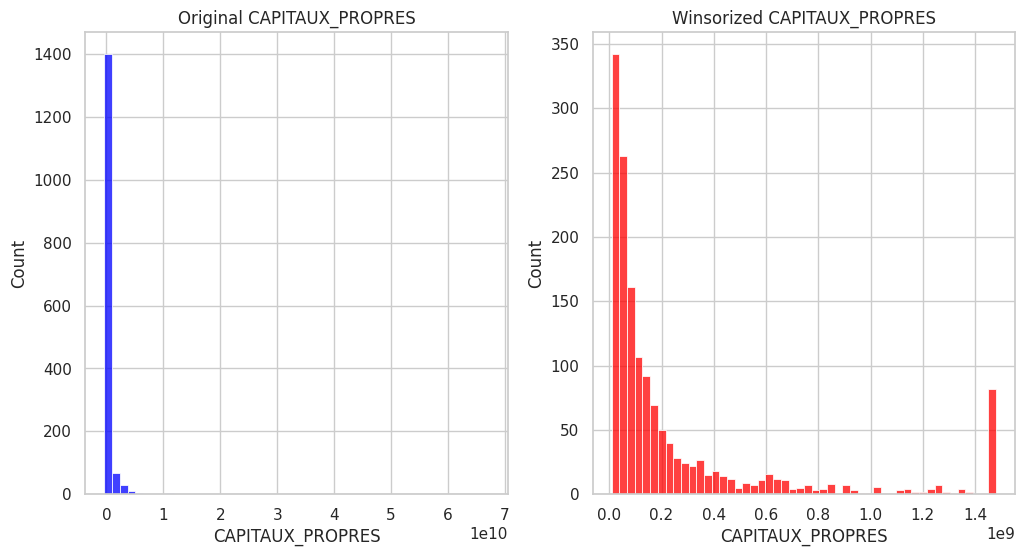

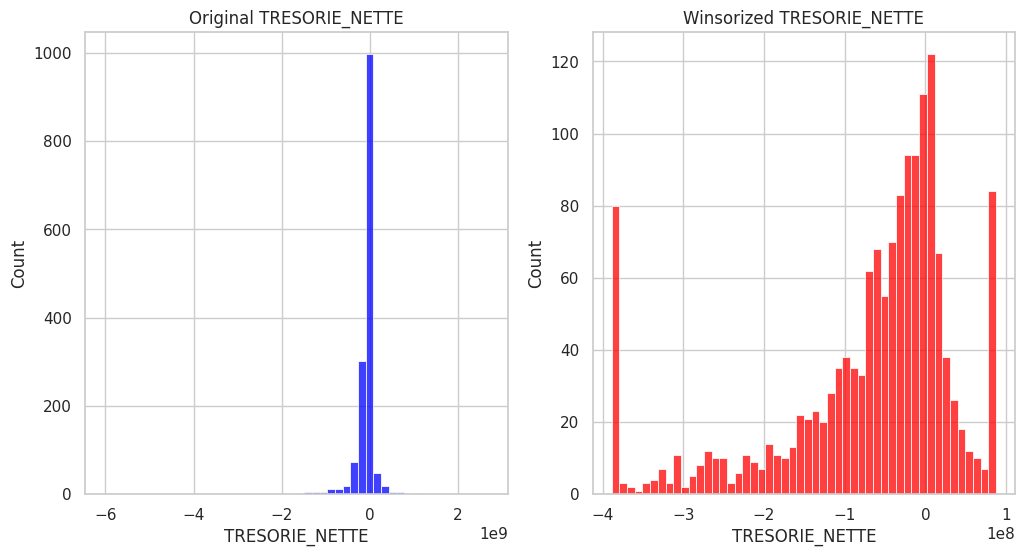

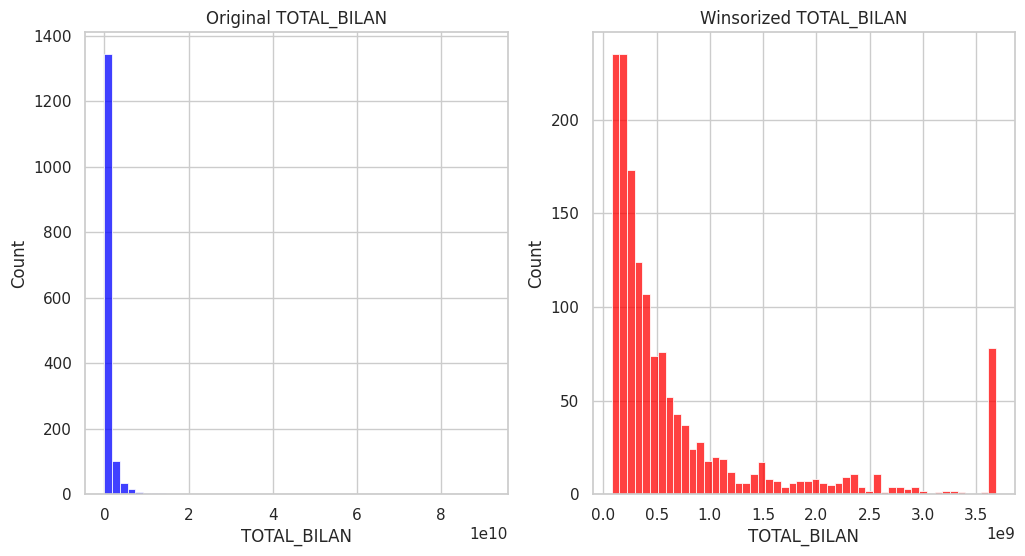

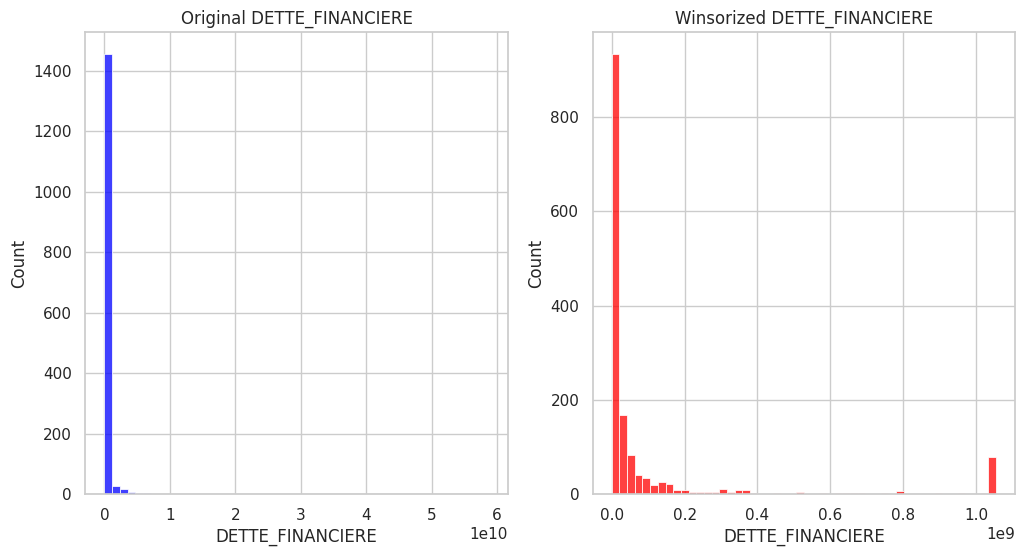

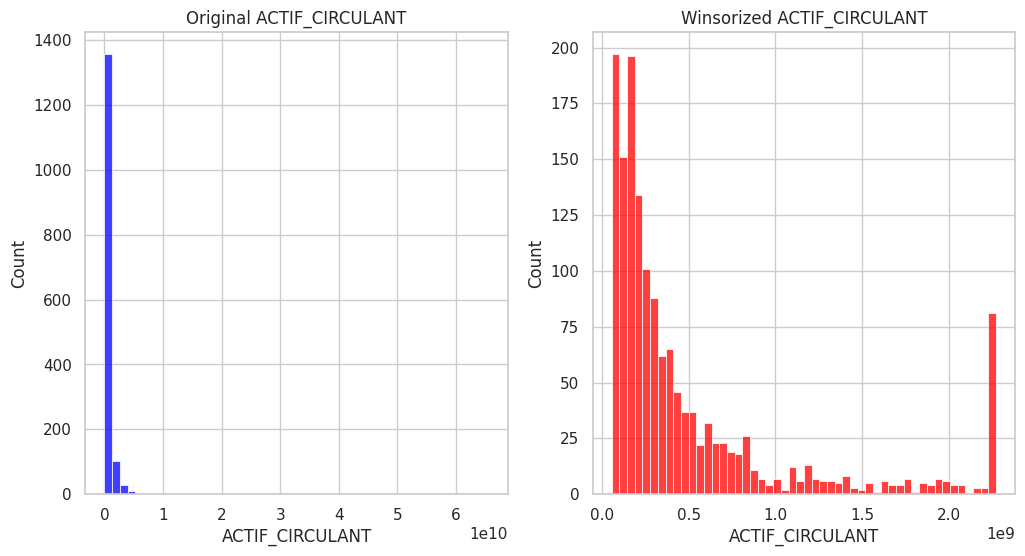

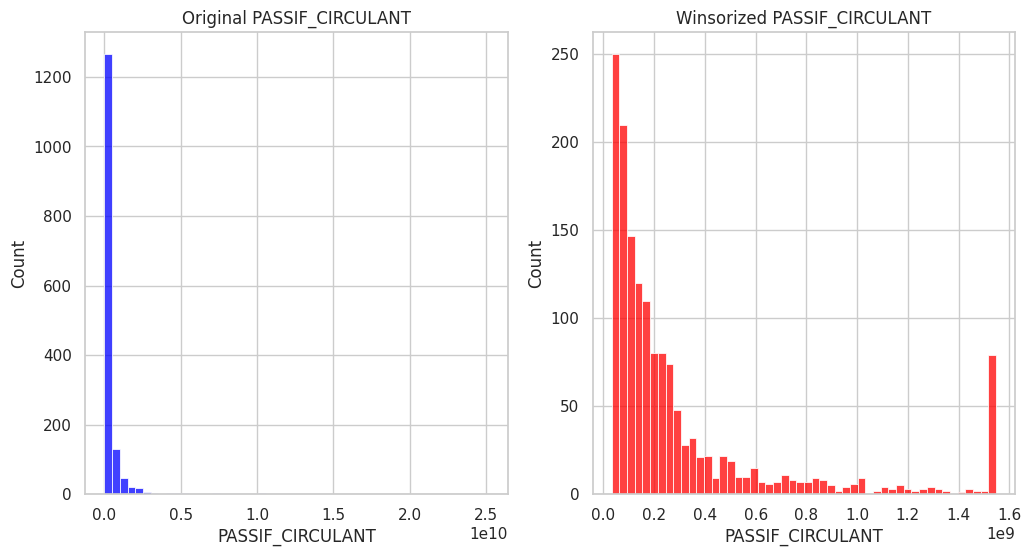

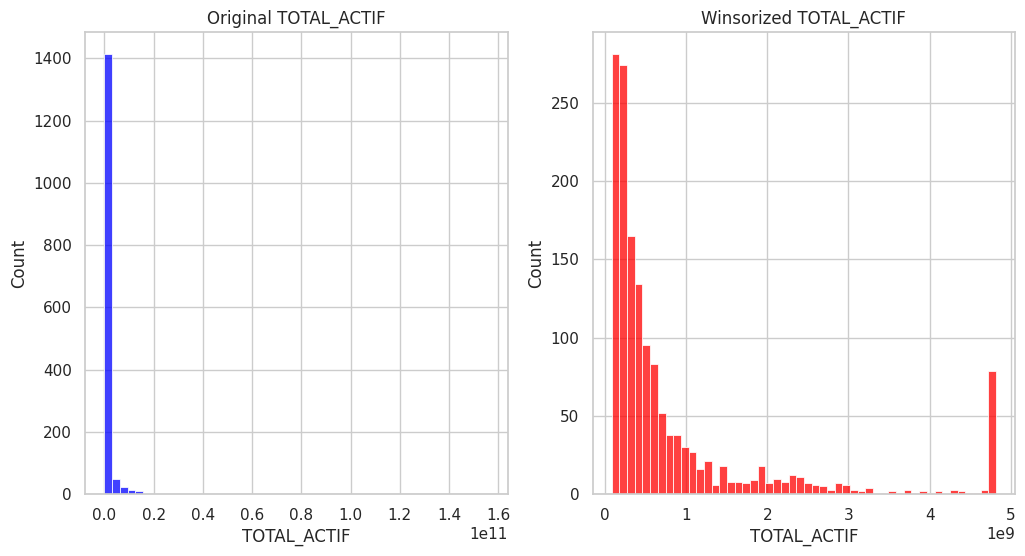

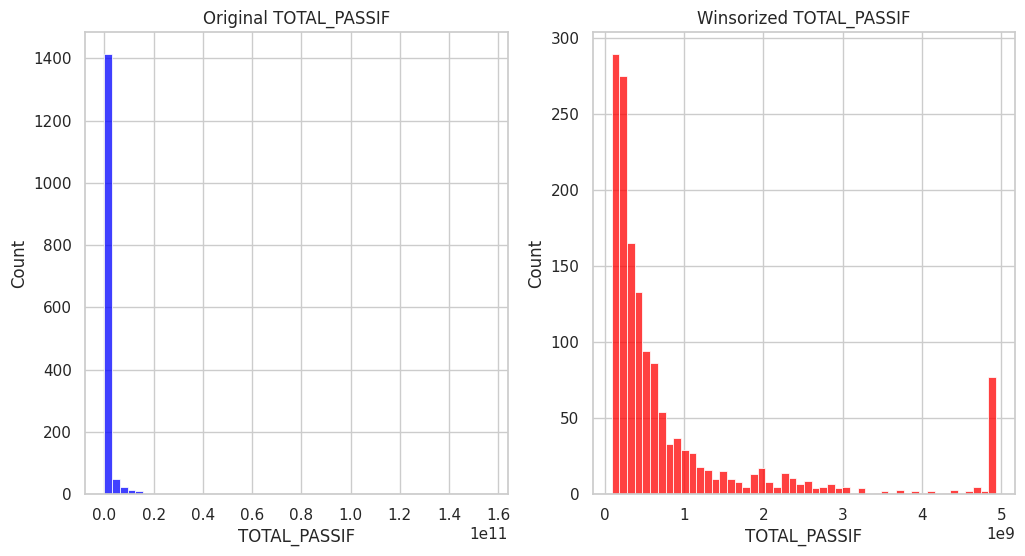

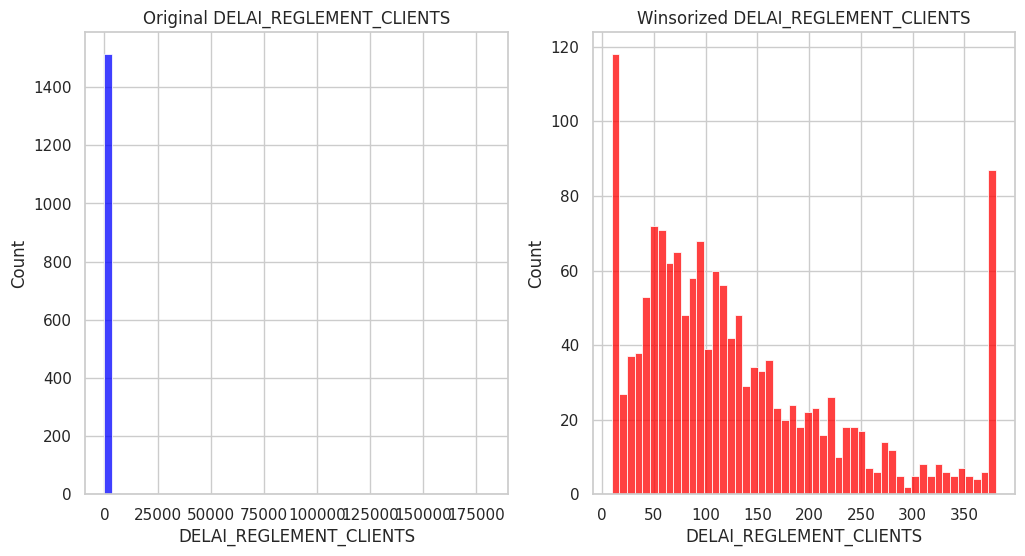

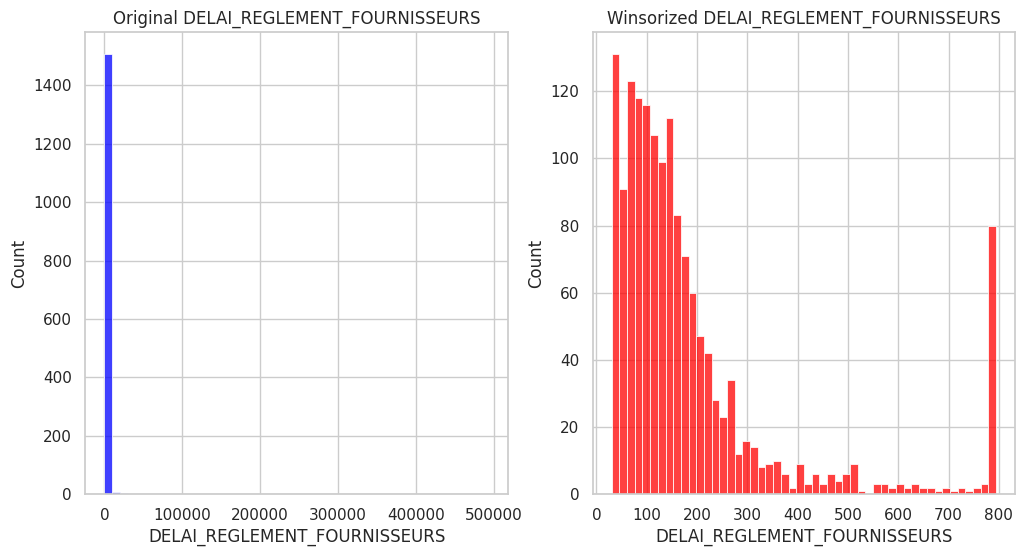

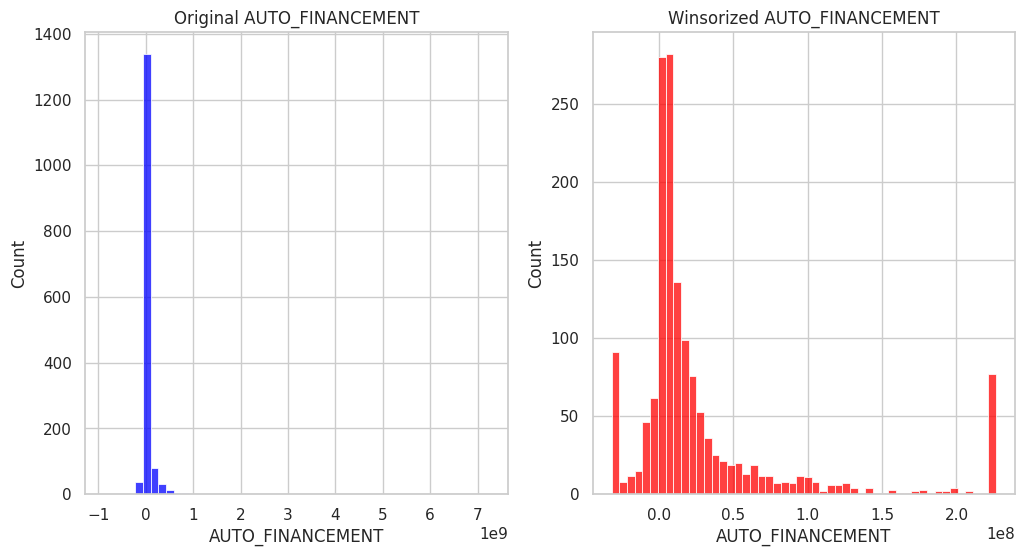

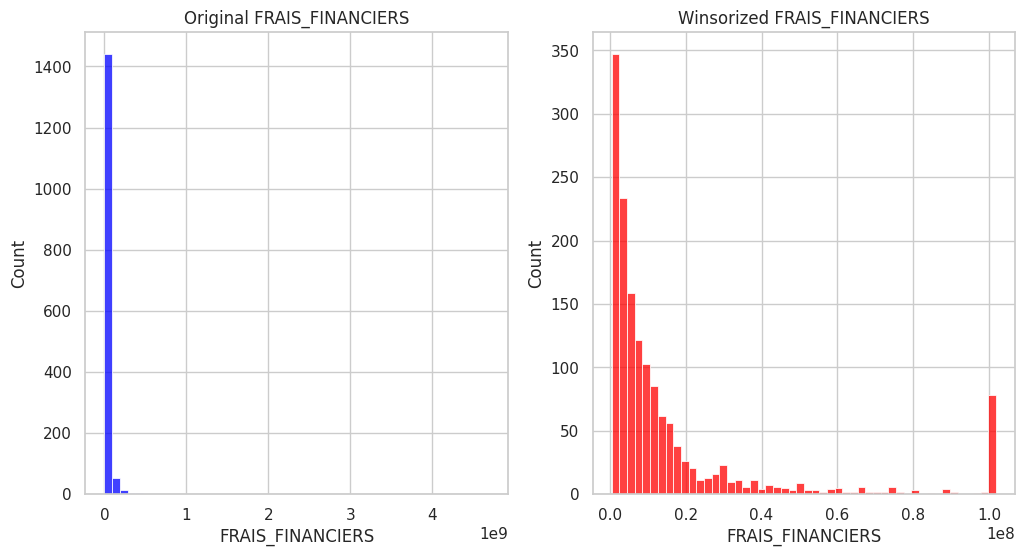

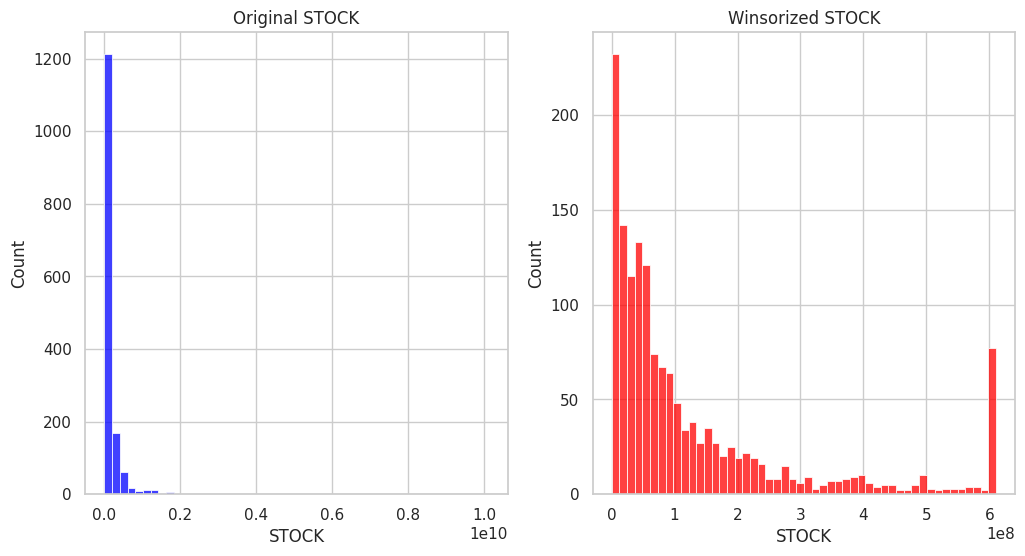

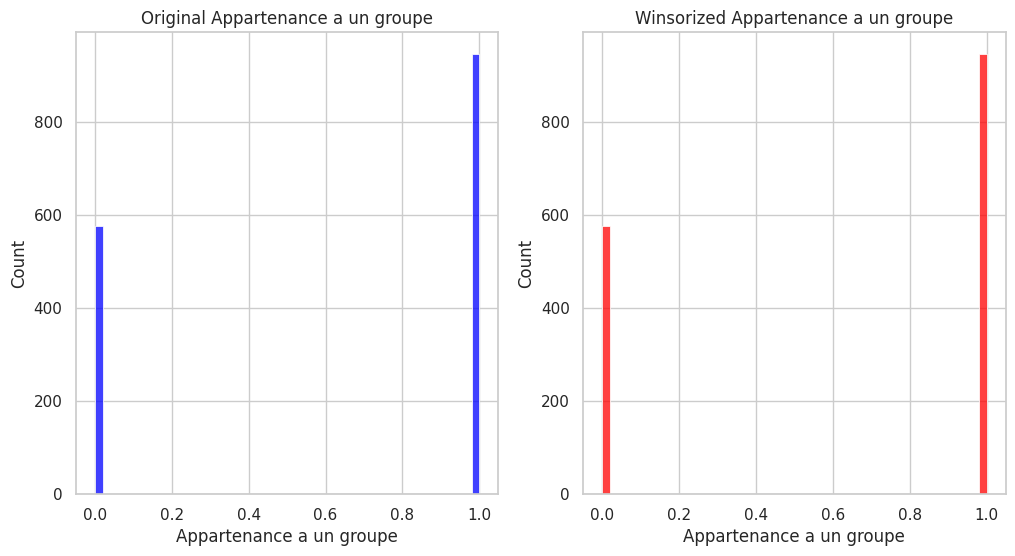

In [23]:
import pandas as pd
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

# Copy data
winsorized_data = data.copy()

# Define the lower and upper percentiles for winsorization
lower_percentile = 0.05
upper_percentile = 0.95

# Print to check before winsorization for the first feature
print(f"Before winsorization: {numerical_features[0]}", winsorized_data[numerical_features[0]].describe())

# Apply winsorization
for col in numerical_features:
    winsorized_data[col] = winsorize(data[col], limits=[lower_percentile, 1 - upper_percentile])

# Print to check after winsorization for the first feature
print(f"After winsorization: {numerical_features[0]}", winsorized_data[numerical_features[0]].describe())

# Plotting the histograms for comparison
sns.set(style='whitegrid')
for col in numerical_features:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original Data
    sns.histplot(data[col], bins=50, ax=ax[0], color="blue", kde=False)
    ax[0].set_title(f'Original {col}')

    # Winsorized Data
    sns.histplot(winsorized_data[col], bins=50, ax=ax[1], color="red", kde=False)
    ax[1].set_title(f'Winsorized {col}')

    plt.show()

In [26]:
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in ('defaut', 'Cote en bourse')]

winsorized_data = data[numerical_features].copy()

# Define the percentiles for winsorization
lower_percentile = 0.05
upper_percentile = 0.95

# Apply winsorization to each numerical column
for col in winsorized_data:
    winsorized_data[col] = winsorize(winsorized_data[col], limits=[lower_percentile, 1 - upper_percentile])

# Performing Standard Scaling on the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(winsorized_data)
scaled_features_df = pd.DataFrame(scaled_features, index=data.index, columns=numerical_features)

scaled_features_df['defaut'] = data['defaut']
scaled_features_df['Cote en bourse'] = data['Cote en bourse']

data_processed = scaled_features_df.copy()



In [27]:
data1 = data_processed.copy()
data1.head(5)

CHIFFRE_AFFAIRES  EXCEDENT_BRUT_EXPLOITATION  \
NUMTIERS_ANNEE                                                     
5200000007513_2015         -0.558338                   -0.561917   
5200000007513_2016         -0.530386                   -0.607092   
5200000007934_2015         -0.600487                   -0.597066   
5200000007934_2017         -0.589850                   -0.509479   
5200000008051_2015         -0.638617                   -0.476110   

                    RESULTAT_EXPlOITATION  RESULTAT_NET  \
NUMTIERS_ANNEE                                            
5200000007513_2015              -0.521912     -0.773592   
5200000007513_2016              -0.593421     -0.466825   
5200000007934_2015              -0.571348     -0.517958   
5200000007934_2017              -0.446123     -0.369474   
5200000008051_2015              -0.445693     -0.483923   

                    FINANCEMENT_PERMANENT  FONDS_DE_ROULEMENT  \
NUMTIERS_ANNEE                                                  
5200000007513_2015              -0.438062           -0.455956   
5200000007513_2016              -0.438139           -0.432338   
5200000007934_2015              -0.540509           -0.549429   
5200000007934_2017              -0.515419           -0.519067   
5200000008051_2015              -0.499184           -0.499897   

                    BESOIN_FONDS_ROULEMENT  CAPITAUX_PROPRES  TRESORIE_NETTE  \
NUMTIERS_ANNEE                                                                 
5200000007513_2015               -0.511614         -0.428750        0.361566   
5200000007513_2016               -0.487380         -0.422709        0.352955   
5200000007934_2015               -0.659962         -0.608232        0.681118   
5200000007934_2017               -0.625232         -0.561599        0.650579   
5200000008051_2015               -0.522630         -0.542354        0.192094   

                    TOTAL_BILAN  ...  TOTAL_ACTIF  TOTAL_PASSIF  \
NUMTIERS_ANNEE                   ...                              
5200000007513_2015    -0.582497  ...    -0.566453     -0.560913   
5200000007513_2016    -0.574018  ...    -0.561937     -0.556486   
5200000007934_2015    -0.713666  ...    -0.665201     -0.657714   
5200000007934_2017    -0.713666  ...    -0.665201     -0.657714   
5200000008051_2015    -0.612642  ...    -0.589584     -0.583588   

                    DELAI_REGLEMENT_CLIENTS  DELAI_REGLEMENT_FOURNISSEURS  \
NUMTIERS_ANNEE                                                              
5200000007513_2015                 0.192830                     -0.411057   
5200000007513_2016                 0.270176                     -0.366703   
5200000007934_2015                -0.617066                     -0.700794   
5200000007934_2017                -0.714221                     -0.855411   
5200000008051_2015                 0.333387                     -0.358308   

                    AUTO_FINANCEMENT  FRAIS_FINANCIERS     STOCK  \
NUMTIERS_ANNEE                                                     
5200000007513_2015         -0.580395         -0.093359 -0.806740   
5200000007513_2016         -0.495834         -0.463834 -0.806740   
5200000007934_2015         -0.499770         -0.586745 -0.766423   
5200000007934_2017         -0.365016         -0.594385 -0.761956   
5200000008051_2015         -0.417850         -0.399965 -0.715232   

                    Appartenance a un groupe  defaut  Cote en bourse  
NUMTIERS_ANNEE                                                        
5200000007513_2015                 -1.280869       0               0  
5200000007513_2016                 -1.280869       0               0  
5200000007934_2015                  0.780720       0               0  
5200000007934_2017                  0.780720       0               0  
5200000008051_2015                  0.780720       0               0  

[5 rows x 23 columns]

In [ ]:

print("Unique values and their count for 'defaut':")
print(data1['defaut'].value_counts())

print("\nUnique values and their count for 'Cote en bourse':")
print(data1['Cote en bourse'].value_counts())

Unique values and their count for 'defaut':
0    1468
1      53
Name: defaut, dtype: int64

Unique values and their count for 'Cote en bourse':
0    1463
1      58
Name: Cote en bourse, dtype: int64


5. Checking Correlations with the Target Column defaut

In [28]:
# Calculate correlation matrix
correlation_matrix = data1.corr()

# Extract the correlations with the target column 'defaut'
target_correlation = correlation_matrix['defaut'].sort_values(ascending=False)

# Display the correlations with the target
print(target_correlation)

defaut                          1.000000
FRAIS_FINANCIERS                0.082666
ACTIF_CIRCULANT                 0.079550
DELAI_REGLEMENT_CLIENTS         0.079441
DETTE_FINANCIERE                0.070232
PASSIF_CIRCULANT                0.067051
BESOIN_FONDS_ROULEMENT          0.061131
TOTAL_ACTIF                     0.056566
TOTAL_PASSIF                    0.055777
STOCK                           0.050810
FINANCEMENT_PERMANENT           0.048773
DELAI_REGLEMENT_FOURNISSEURS    0.046035
TOTAL_BILAN                     0.045826
FONDS_DE_ROULEMENT              0.043522
Cote en bourse                  0.018326
CAPITAUX_PROPRES                0.016825
Appartenance a un groupe        0.000525
CHIFFRE_AFFAIRES               -0.019954
EXCEDENT_BRUT_EXPLOITATION     -0.028817
RESULTAT_EXPlOITATION          -0.033464
AUTO_FINANCEMENT               -0.034535
RESULTAT_NET                   -0.050523
TRESORIE_NETTE                 -0.077390
Name: defaut, dtype: float64


###Low Correlation with Default:
The decision to use ratios is influenced by the low correlations observed between the original numerical features and the target variable (default). When the correlation is low, it indicates that individual numerical features may not be strong predictors of default risk on their own. Ratios, on the other hand, can provide a more nuanced view of a company's financial health and can potentially capture patterns that are not evident in individual features.

Now, let's briefly explain the selected ratios:

1. **Quick Ratio:**
   - **Formula:** (Current Assets - Inventory)\Current Liabilities

   - **Interest:** Measures a company's ability to cover its short-term liabilities with its most liquid assets, excluding inventory. A higher quick ratio indicates better liquidity.

2. **Debt-to-Equity Ratio:**
   - **Formula:** Total Debt/Total Equity
   - **Interest:** Indicates the proportion of a company's financing that comes from debt compared to equity. Higher ratios suggest higher financial leverage and potential solvency risks.

3. **Return on Assets (ROA):**
   - **Formula:** Net Income\Total Assets
   - **Interest:** Measures a company's efficiency in generating profit from its assets. A higher ROA indicates better profitability relative to the size of the asset base.

4. **Receivables Turnover:**
   - **Formula:** Net Sales/Average Accounts Receivable
   - **Interest:** Reflects how quickly a company collects its receivables. A higher turnover implies efficient management of receivables and better cash flow.

5. **Interest Coverage Ratio:**
   - **Formula:** EBIT/Interest Expenses
   - **Interest:** Measures the company's ability to cover interest expenses with its operating income. Higher coverage ratios indicate a lower risk of default on interest payments.



In [29]:
data11 = data1.copy()

In [30]:
import pandas as pd

# Assuming your numerical features are stored in a DataFrame called 'data1'
# Replace the feature names with the actual column names from your dataset

# Liquidity Ratio
data11['Quick_Ratio'] = (data11['TOTAL_ACTIF'] - data1['STOCK']) / data11['TOTAL_PASSIF']

# Solvency Ratio
data11['Debt_to_Equity_Ratio'] = data11['DETTE_FINANCIERE'] / data11['CAPITAUX_PROPRES']

# Profitability Ratio
data11['ROA'] = data11['RESULTAT_NET'] / data11['TOTAL_ACTIF']

# Efficiency Ratio
data11['Receivables_Turnover'] = data11['CHIFFRE_AFFAIRES'] / data11['TOTAL_PASSIF']

# Coverage Ratio
data11['Interest_Coverage_Ratio'] = data11['RESULTAT_EXPlOITATION'] / data11['FRAIS_FINANCIERS']

# Drop the original numerical features used to create ratios
numerical_features_to_drop = ['TOTAL_ACTIF', 'TOTAL_PASSIF', 'STOCK', 'DETTE_FINANCIERE', 'CAPITAUX_PROPRES', 'RESULTAT_NET', 'CHIFFRE_AFFAIRES', 'RESULTAT_EXPlOITATION', 'FRAIS_FINANCIERS']
data1_ratios = data11.drop(columns=numerical_features_to_drop, errors='ignore')

# Display the updated DataFrame with ratios
print(data1_ratios.head())


                    EXCEDENT_BRUT_EXPLOITATION  FINANCEMENT_PERMANENT  \
NUMTIERS_ANNEE                                                          
5200000007513_2015                   -0.561917              -0.438062   
5200000007513_2016                   -0.607092              -0.438139   
5200000007934_2015                   -0.597066              -0.540509   
5200000007934_2017                   -0.509479              -0.515419   
5200000008051_2015                   -0.476110              -0.499184   

                    FONDS_DE_ROULEMENT  BESOIN_FONDS_ROULEMENT  \
NUMTIERS_ANNEE                                                   
5200000007513_2015           -0.455956               -0.511614   
5200000007513_2016           -0.432338               -0.487380   
5200000007934_2015           -0.549429               -0.659962   
5200000007934_2017           -0.519067               -0.625232   
5200000008051_2015           -0.499897               -0.522630   

                    TRESO

In [31]:
# Save the DataFrame to an Excel file
data1_ratios.to_excel('data1_ratios.xlsx', index=False)

# Optionally, you can print a message to confirm the save
print("Data saved to 'data1_ratios.xlsx'")


Data saved to 'data1_ratios.xlsx'


In [32]:
data2 = pd.read_excel('data1_ratios.xlsx')
data2


EXCEDENT_BRUT_EXPLOITATION  FINANCEMENT_PERMANENT  FONDS_DE_ROULEMENT  \
0                      -0.561917              -0.438062           -0.455956   
1                      -0.607092              -0.438139           -0.432338   
2                      -0.597066              -0.540509           -0.549429   
3                      -0.509479              -0.515419           -0.519067   
4                      -0.476110              -0.499184           -0.499897   
...                          ...                    ...                 ...   
1516                   -0.614269              -0.557540           -0.576578   
1517                   -0.639217              -0.557540           -0.580492   
1518                    3.303079               3.493456            3.475292   
1519                   -0.235495              -0.154024           -0.100130   
1520                   -0.440085              -0.471699           -0.467319   

      BESOIN_FONDS_ROULEMENT  TRESORIE_NETTE  TOTAL_BILAN  ACTIF_CIRCULANT  \
0                  -0.511614        0.361566    -0.582497        -0.627229   
1                  -0.487380        0.352955    -0.574018        -0.616611   
2                  -0.659962        0.681118    -0.713666        -0.771156   
3                  -0.625232        0.650579    -0.713666        -0.771156   
4                  -0.522630        0.192094    -0.612642        -0.677617   
...                      ...             ...          ...              ...   
1516               -0.666520        0.575056    -0.679318        -0.737004   
1517               -0.675891        0.623130    -0.713666        -0.771156   
1518                3.205023        1.368830     3.238969         2.524259   
1519                0.275896       -2.067812     0.476502         0.609891   
1520               -0.530473        0.404900    -0.672699        -0.769080   

      PASSIF_CIRCULANT  DELAI_REGLEMENT_CLIENTS  DELAI_REGLEMENT_FOURNISSEURS  \
0            -0.622690                 0.192830                     -0.411057   
1            -0.607732                 0.270176                     -0.366703   
2            -0.715285                -0.617066                     -0.700794   
3            -0.720575                -0.714221                     -0.855411   
4            -0.621645                 0.333387                     -0.358308   
...                ...                      ...                           ...   
1516         -0.563775                -0.753940                      3.272450   
1517         -0.720575                -1.212542                     -0.864401   
1518          1.966271                -0.540914                     -0.071279   
1519          0.735065                 0.686770                      0.348596   
1520         -0.686265                -1.222297                     -0.759824   

      AUTO_FINANCEMENT  Appartenance a un groupe  defaut  Cote en bourse  \
0            -0.580395                 -1.280869       0               0   
1            -0.495834                 -1.280869       0               0   
2            -0.499770                  0.780720       0               0   
3            -0.365016                  0.780720       0               0   
4            -0.417850                  0.780720       0               0   
...                ...                       ...     ...             ...   
1516         -0.487382                 -1.280869       0               0   
1517         -0.496280                 -1.280869       0               0   
1518         -0.504009                  0.780720       1               0   
1519         -0.162302                 -1.280869       1               0   
1520         -0.262125                 -1.280869       1               0   

      Quick_Ratio  Debt_to_Equity_Ratio       ROA  Receivables_Turnover  \
0       -0.428385              0.963634  1.365677              0.995409   
1       -0.439909              0.978335  0.830743              0.953099   
2       -

In [33]:
print("\nDescriptive Statistics Summary of data2:")
print(data2.describe())



Descriptive Statistics Summary of data2:
       EXCEDENT_BRUT_EXPLOITATION  FINANCEMENT_PERMANENT  FONDS_DE_ROULEMENT  \
count                1.521000e+03           1.521000e+03        1.521000e+03   
mean                -3.270085e-17          -1.868620e-17       -3.737240e-17   
std                  1.000329e+00           1.000329e+00        1.000329e+00   
min                 -7.382324e-01          -5.575398e-01       -5.804923e-01   
25%                 -5.510467e-01          -5.009115e-01       -5.117299e-01   
50%                 -3.974337e-01          -4.019309e-01       -4.150303e-01   
75%                  5.391739e-02          -8.183481e-02       -5.923302e-02   
max                  3.303079e+00           3.493456e+00        3.475292e+00   

       BESOIN_FONDS_ROULEMENT  TRESORIE_NETTE   TOTAL_BILAN  ACTIF_CIRCULANT  \
count            1.521000e+03    1.521000e+03  1.521000e+03     1.521000e+03   
mean             2.802930e-17   -1.868620e-17 -5.605860e-17    -1.868620e-17 

In [34]:
# Calculate the correlation matrix of data2
correlation_matrix = data2.corr()

# Extract the correlation with the target column 'defaut'
correlation_with_defaut = correlation_matrix['defaut']

# Display the correlation with the 'defaut' column
print("Correlation with 'defaut':")
print(correlation_with_defaut)



Correlation with 'defaut':
EXCEDENT_BRUT_EXPLOITATION     -0.028817
FINANCEMENT_PERMANENT           0.048773
FONDS_DE_ROULEMENT              0.043522
BESOIN_FONDS_ROULEMENT          0.061131
TRESORIE_NETTE                 -0.077390
TOTAL_BILAN                     0.045826
ACTIF_CIRCULANT                 0.079550
PASSIF_CIRCULANT                0.067051
DELAI_REGLEMENT_CLIENTS         0.079441
DELAI_REGLEMENT_FOURNISSEURS    0.046035
AUTO_FINANCEMENT               -0.034535
Appartenance a un groupe        0.000525
defaut                          1.000000
Cote en bourse                  0.018326
Quick_Ratio                     0.004495
Debt_to_Equity_Ratio            0.143024
ROA                             0.012778
Receivables_Turnover           -0.004251
Interest_Coverage_Ratio         0.004984
Name: defaut, dtype: float64


In [35]:
data111 = data1.copy()

## Examinating other ratios :

In [36]:
# Calculate selected ratios
data111['Current_Ratio'] = data111['TOTAL_ACTIF'] / data111['TOTAL_PASSIF']
data111['ROE'] = data111['RESULTAT_NET'] / data111['CAPITAUX_PROPRES']
data111['Inventory_Turnover'] = data111['CHIFFRE_AFFAIRES'] / data111['STOCK']
data111['Debt_to_Equity_Ratio'] = data111['DETTE_FINANCIERE'] / data111['CAPITAUX_PROPRES']
data111['Operating_Margin'] = data111['EXCEDENT_BRUT_EXPLOITATION'] / data111['CHIFFRE_AFFAIRES']

# Calculate correlations with the target variable
correlations = data111[['defaut', 'Current_Ratio', 'ROE', 'Inventory_Turnover', 'Debt_to_Equity_Ratio', 'Operating_Margin']].corr()

# Print the correlations
print(correlations['defaut'])


defaut                  1.000000
Current_Ratio          -0.010504
ROE                     0.137958
Inventory_Turnover      0.063439
Debt_to_Equity_Ratio    0.143024
Operating_Margin       -0.036086
Name: defaut, dtype: float64


### Debt to Equity Ratio:
This ratio reflects the company's leverage and financial risk. A higher Debt to Equity Ratio indicates higher financial risk.

Formula: Total Debt/Shareholders’ Equity



### ROE (Return on Equity):
ROE measures the company's profitability with respect to shareholders' equity. A higher ROE is generally favorable.

Formula:
ROE = Net Income /Shareholders’ Equity



### Current Ratio:
The Current Ratio assesses a company's ability to cover short-term liabilities with short-term assets. A ratio above 1 indicates good liquidity.

Formula:
Current Assets /Current Liabilities

### Inventory Turnover:
 This ratio measures how quickly a company sells its inventory. A higher turnover is generally preferable.

Formula:
Cost of Goods Sold / Average Inventory


### Operating Margin:
Operating Margin reflects the company's profitability from its core operations. A higher margin indicates better profitability.

Formula:
Operating Income /Net Sales



In [37]:
# Add chosen ratios to the original data1
data1['Debt_to_Equity_Ratio'] = data1['DETTE_FINANCIERE'] / data1['CAPITAUX_PROPRES']
data1['ROE'] = data1['RESULTAT_NET'] / data1['CAPITAUX_PROPRES']
data1['Current_Ratio'] = data1['TOTAL_ACTIF'] / data1['TOTAL_PASSIF']
data1['Inventory_Turnover'] = data1['CHIFFRE_AFFAIRES'] / data1['STOCK']
data1['Operating_Margin'] = data1['EXCEDENT_BRUT_EXPLOITATION'] / data1['CHIFFRE_AFFAIRES']

# Drop the columns used to create the ratios from the original data1
columns_to_drop = ['EXCEDENT_BRUT_EXPLOITATION', 'CHIFFRE_AFFAIRES', 'RESULTAT_NET', 'DETTE_FINANCIERE', 'CAPITAUX_PROPRES', 'TOTAL_ACTIF', 'TOTAL_PASSIF', 'STOCK']
df_ratios = data1.drop(columns=columns_to_drop)

# Print the correlation matrix for the chosen ratios
correlations_ratios = df_ratios.corr()
print(correlations_ratios['defaut'])


RESULTAT_EXPlOITATION          -0.033464
FINANCEMENT_PERMANENT           0.048773
FONDS_DE_ROULEMENT              0.043522
BESOIN_FONDS_ROULEMENT          0.061131
TRESORIE_NETTE                 -0.077390
TOTAL_BILAN                     0.045826
ACTIF_CIRCULANT                 0.079550
PASSIF_CIRCULANT                0.067051
DELAI_REGLEMENT_CLIENTS         0.079441
DELAI_REGLEMENT_FOURNISSEURS    0.046035
AUTO_FINANCEMENT               -0.034535
FRAIS_FINANCIERS                0.082666
Appartenance a un groupe        0.000525
defaut                          1.000000
Cote en bourse                  0.018326
Debt_to_Equity_Ratio            0.143024
ROE                             0.137958
Current_Ratio                  -0.010504
Inventory_Turnover              0.063439
Operating_Margin               -0.036086
Name: defaut, dtype: float64


In [38]:
# Save df_ratios to an Excel file
df_ratios.to_excel('df_ratios.xlsx', index=False)

# Load df_ratios from the saved Excel file
df_ratios_loaded = pd.read_excel('df_ratios.xlsx')

df_ratios_loaded.head()


RESULTAT_EXPlOITATION  FINANCEMENT_PERMANENT  FONDS_DE_ROULEMENT  \
0              -0.521912              -0.438062           -0.455956   
1              -0.593421              -0.438139           -0.432338   
2              -0.571348              -0.540509           -0.549429   
3              -0.446123              -0.515419           -0.519067   
4              -0.445693              -0.499184           -0.499897   

   BESOIN_FONDS_ROULEMENT  TRESORIE_NETTE  TOTAL_BILAN  ACTIF_CIRCULANT  \
0               -0.511614        0.361566    -0.582497        -0.627229   
1               -0.487380        0.352955    -0.574018        -0.616611   
2               -0.659962        0.681118    -0.713666        -0.771156   
3               -0.625232        0.650579    -0.713666        -0.771156   
4               -0.522630        0.192094    -0.612642        -0.677617   

   PASSIF_CIRCULANT  DELAI_REGLEMENT_CLIENTS  DELAI_REGLEMENT_FOURNISSEURS  \
0         -0.622690                 0.192830                     -0.411057   
1         -0.607732                 0.270176                     -0.366703   
2         -0.715285                -0.617066                     -0.700794   
3         -0.720575                -0.714221                     -0.855411   
4         -0.621645                 0.333387                     -0.358308   

   AUTO_FINANCEMENT  FRAIS_FINANCIERS  Appartenance a un groupe  defaut  \
0         -0.580395         -0.093359                 -1.280869       0   
1         -0.495834         -0.463834                 -1.280869       0   
2         -0.499770         -0.586745                  0.780720       0   
3         -0.365016         -0.594385                  0.780720       0   
4         -0.417850         -0.399965                  0.780720       0   

   Cote en bourse  Debt_to_Equity_Ratio       ROE  Current_Ratio  \
0               0              0.963634  1.804296       1.009876   
1               0              0.978335  1.104366       1.009795   
2               0              0.679922  0.851578       1.011382   
3               0              0.736381  0.657896       1.011382   
4               0              0.732791  0.892263       1.010274   

   Inventory_Turnover  Operating_Margin  
0            0.692092          1.006409  
1            0.657444          1.144622  
2            0.783493          0.994303  
3            0.774126          0.863743  
4            0.892881          0.745532

# The Selected Ratios are :
- Debt to equity Ratio
- ROE
- Current Ratio
- Inventry Turnover
- Operating Margin

In [50]:
df = df_ratios.copy()
df.head()

RESULTAT_EXPlOITATION  FINANCEMENT_PERMANENT  \
NUMTIERS_ANNEE                                                     
5200000007513_2015              -0.521912              -0.438062   
5200000007513_2016              -0.593421              -0.438139   
5200000007934_2015              -0.571348              -0.540509   
5200000007934_2017              -0.446123              -0.515419   
5200000008051_2015              -0.445693              -0.499184   

                    FONDS_DE_ROULEMENT  BESOIN_FONDS_ROULEMENT  \
NUMTIERS_ANNEE                                                   
5200000007513_2015           -0.455956               -0.511614   
5200000007513_2016           -0.432338               -0.487380   
5200000007934_2015           -0.549429               -0.659962   
5200000007934_2017           -0.519067               -0.625232   
5200000008051_2015           -0.499897               -0.522630   

                    TRESORIE_NETTE  TOTAL_BILAN  ACTIF_CIRCULANT  \
NUMTIERS_ANNEE                                                     
5200000007513_2015        0.361566    -0.582497        -0.627229   
5200000007513_2016        0.352955    -0.574018        -0.616611   
5200000007934_2015        0.681118    -0.713666        -0.771156   
5200000007934_2017        0.650579    -0.713666        -0.771156   
5200000008051_2015        0.192094    -0.612642        -0.677617   

                    PASSIF_CIRCULANT  DELAI_REGLEMENT_CLIENTS  \
NUMTIERS_ANNEE                                                  
5200000007513_2015         -0.622690                 0.192830   
5200000007513_2016         -0.607732                 0.270176   
5200000007934_2015         -0.715285                -0.617066   
5200000007934_2017         -0.720575                -0.714221   
5200000008051_2015         -0.621645                 0.333387   

                    DELAI_REGLEMENT_FOURNISSEURS  AUTO_FINANCEMENT  \
NUMTIERS_ANNEE                                                       
5200000007513_2015                     -0.411057         -0.580395   
5200000007513_2016                     -0.366703         -0.495834   
5200000007934_2015                     -0.700794         -0.499770   
5200000007934_2017                     -0.855411         -0.365016   
5200000008051_2015                     -0.358308         -0.417850   

                    FRAIS_FINANCIERS  Appartenance a un groupe  defaut  \
NUMTIERS_ANNEE                                                           
5200000007513_2015         -0.093359                 -1.280869       0   
5200000007513_2016         -0.463834                 -1.280869       0   
5200000007934_2015         -0.586745                  0.780720       0   
5200000007934_2017         -0.594385                  0.780720       0   
5200000008051_2015         -0.399965                  0.780720       0   

                    Cote en bourse  Debt_to_Equity_Ratio       ROE  \
NUMTIERS_ANNEE                                                       
5200000007513_2015               0              0.963634  1.804296   
5200000007513_2016               0              0.978335  1.104366   
5200000007934_2015               0              0.679922  0.851578   
5200000007934_2017               0              0.736381  0.657896   
5200000008051_2015               0              0.732791  0.892263   

                    Current_Ratio  Inventory_Turnover  Operating_Margin  
NUMTIERS_ANNEE                                                           
5200000007513_2015       1.009876            0.692092          1.006409  
5200000007513_2016       1.009795            0.657444          1.144622  
5200000007934_2015       1.011382            0.783493          0.994303  
5200000007934_2017       1.011382            0.774126          0.863743  
5200000008051_2015       1.010274            0.892881          0.745532

## Target Column :

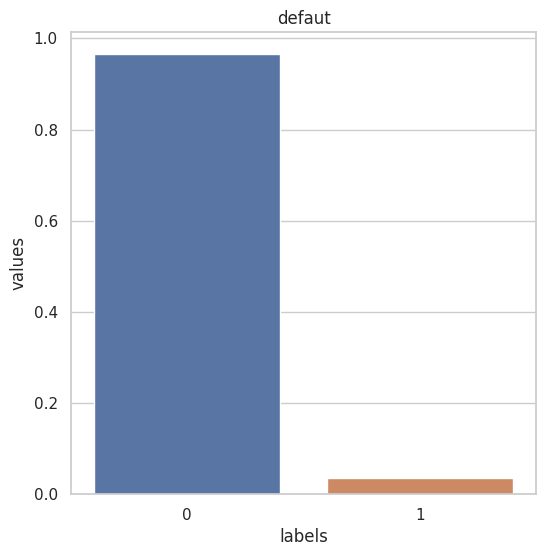

In [40]:
temp = df["defaut"].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(df)
                  })
plt.figure(figsize = (6,6))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

Target ('defaut') take two levels: 0 wich mean the loan is repaid on time or 1 if not.From the barplot, we see unbalanced class problem.we'll use oversampling method

## Categorical Data :

In [41]:
categorical_data.apply(pd.Series.nunique,axis=0).sort_values()

Categorie_juridique                         3
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT     4
QUALITE_INFORMATION_FINANCIERE              4
STRUCTUREDUMANAGEMENT                       4
POSITIONNEMENTMARCHE                        4
NIVEAU_COMPETITIVITE                        5
REPUTATION                                  5
SUPPORT                                     5
DIVERSITE_FOURNISSEURS                      6
IMPACT_SOCIAUX_ENVIRONNEMENTAL              6
DIVERSITE_CLIENTS                           7
Secteurs                                   17
dtype: int64

In [42]:
categorical_columns = data.select_dtypes(include='object').columns

# Display the modalities for each categorical column
for feature in categorical_columns:
    if feature != 'NUMTIERS_ANNEE':
        print(f"{feature} has as modalities {set(categorical_data[feature])}\n")


EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT has as modalities {'Plus de 10 ans', 'Inferieure e 5 ans', 'Entre 5 et 10 ans', 'Modalite vide'}

DIVERSITE_CLIENTS has as modalities {'Bonne diversification par produits mais limitee e une zone geographique ou e quelques client', 'Diversification très forte par produits,clients, situation geographique', 'Diversification tres forte par produits, clients, situation geographique', 'Diversification limitee e un seul client ou un seul produit ou e une seule zone geographique', 'Forte dependance e quelques clients mais limitee e un seul produit', 'Diversification très forte par produits, clients, situation geographique', 'Modalite vide'}

DIVERSITE_FOURNISSEURS has as modalities {'Diversite insufisante', 'Tres grande diversite', 'Diversite moyenne', 'Très grande diversite', 'Pas de diversite', 'Modalite vide'}

IMPACT_SOCIAUX_ENVIRONNEMENTAL has as modalities {'Aucun impact social ou environnemental, soumis e une reglementation', 'Aucun impact social 

In [43]:
data['DIVERSITE_CLIENTS'].replace("Diversification tres forte par produits, clients, situation geographique", 'Diversification trés forte par produits, clients, situation geographique', inplace=True)
data['DIVERSITE_FOURNISSEURS'].replace('Tres grande diversite', 'Très grande diversite', inplace=True)
data['DIVERSITE_FOURNISSEURS'].replace('Trés grande diversite', 'Très grande diversite', inplace=True)
data['REPUTATION'].replace('Tres bonne', 'Très bonne', inplace=True)
data['NIVEAU_COMPETITIVITE'].replace('Tres forte concurrence', 'Très forte concurrence', inplace=True)
data['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].replace('Aucun impact social ou environnemental, soumis e une reglementation', 'Aucun impact social ou environnemental, soumis à une reglementation', inplace=True)


In [44]:
def cat_stats(feature,df):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'value': temp.values})
    cat_perc = df[[feature, 'defaut']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='defaut', ascending=False, inplace=True)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="value",data=df1)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    s = sns.barplot(ax=ax2, x = feature, y='defaut', data=cat_perc)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

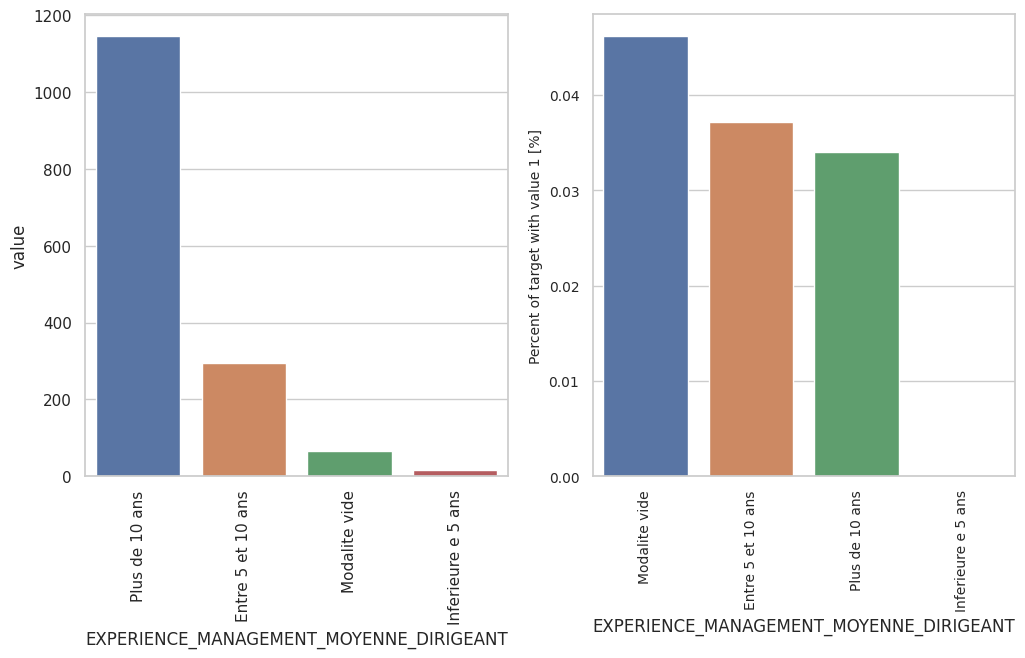

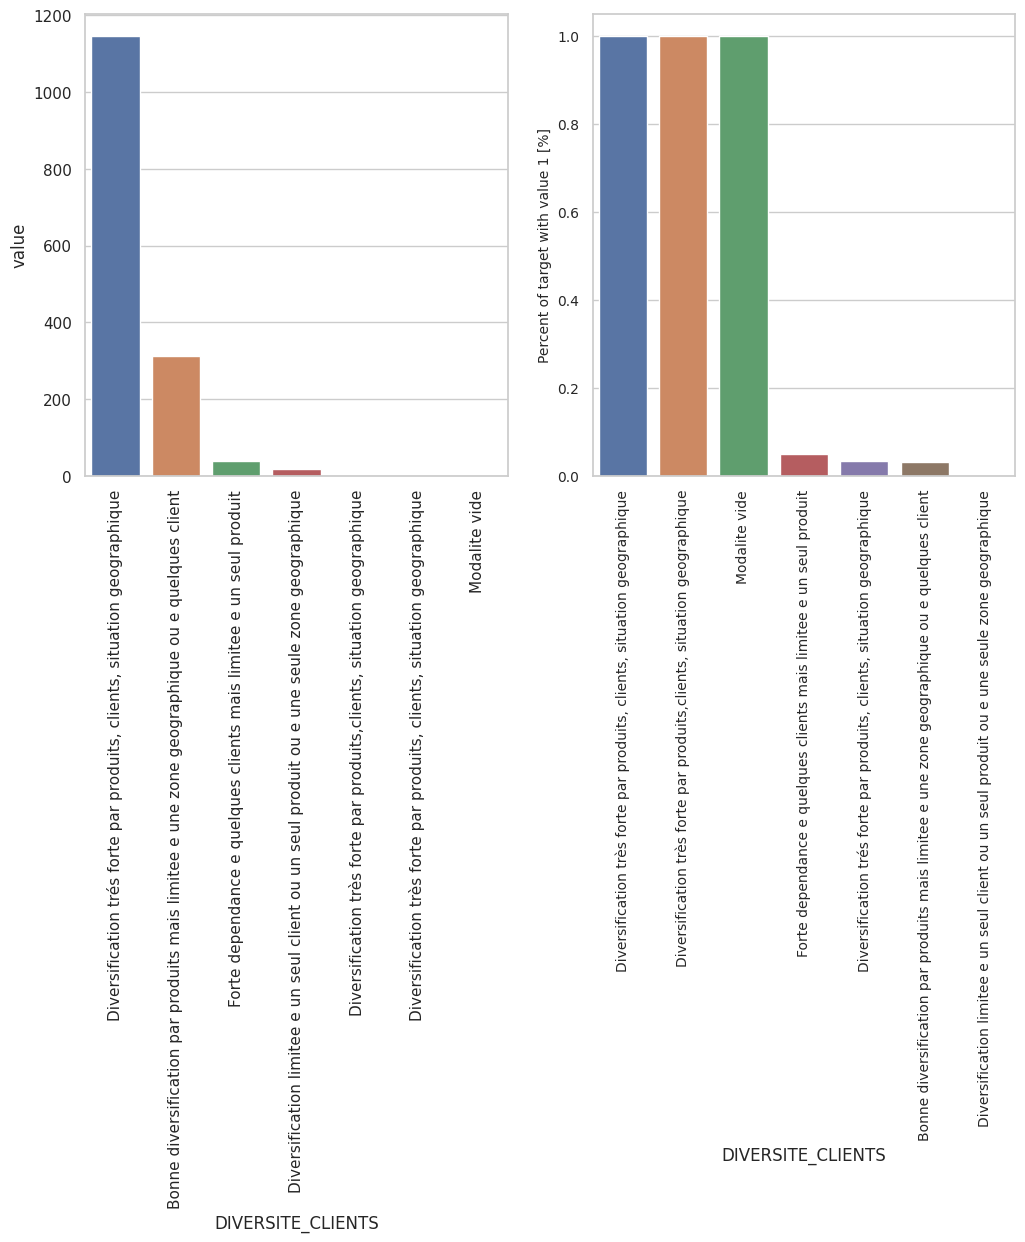

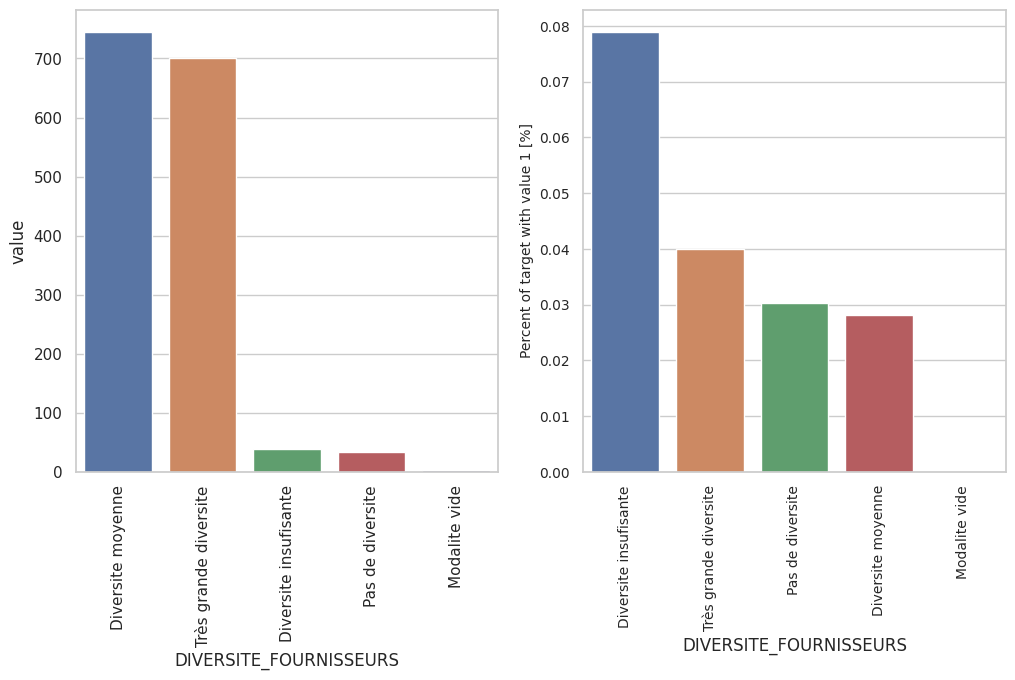

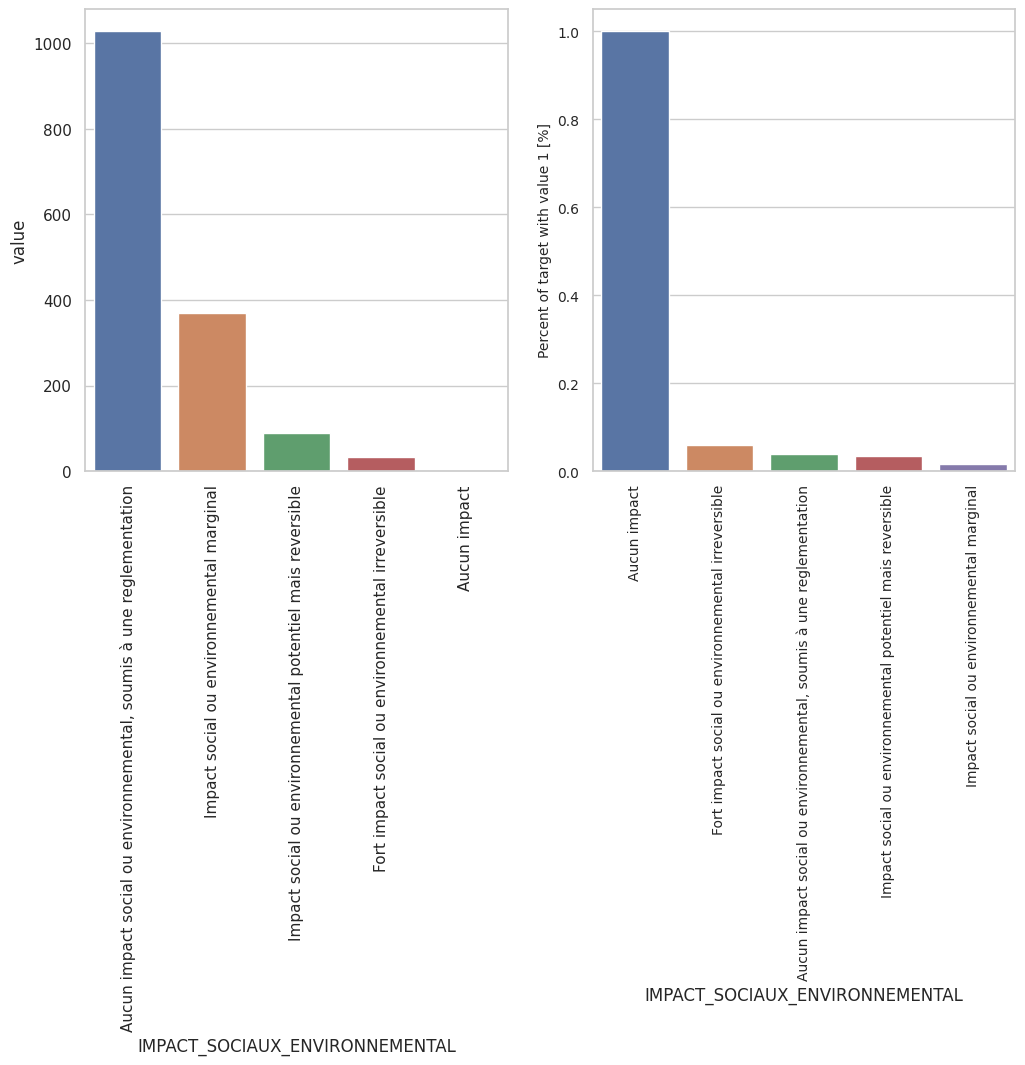

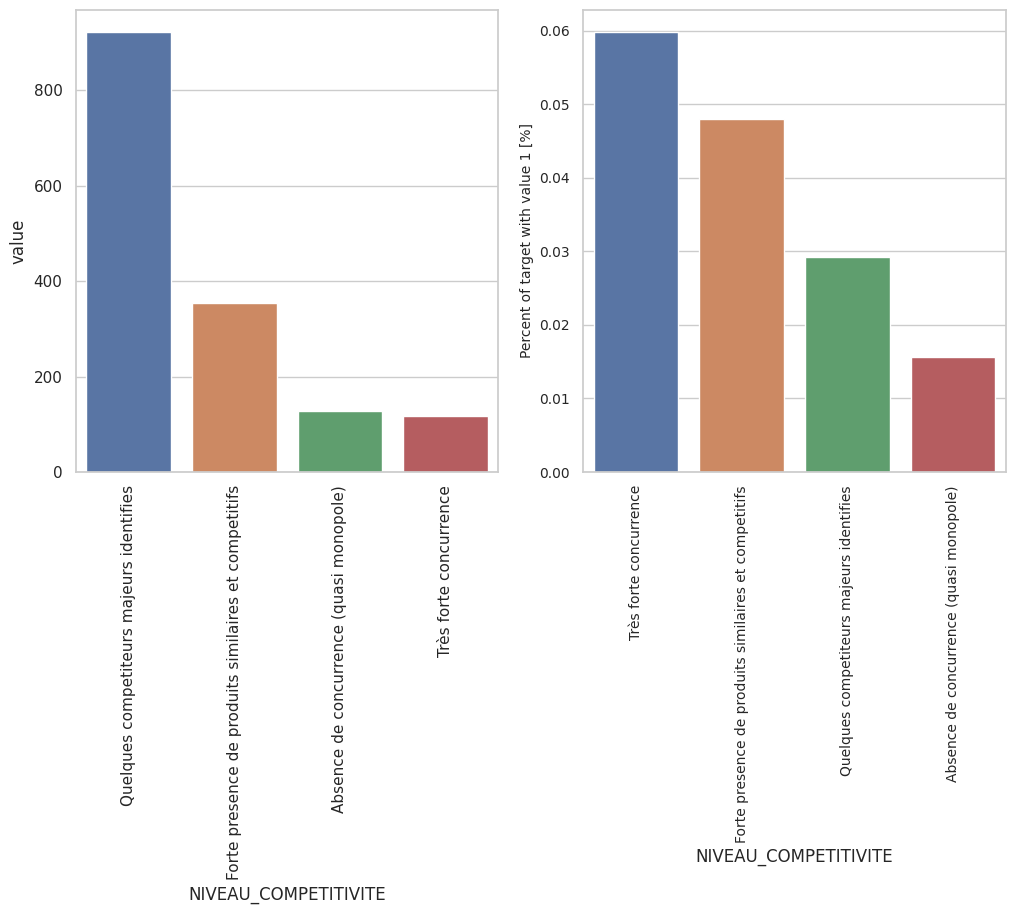

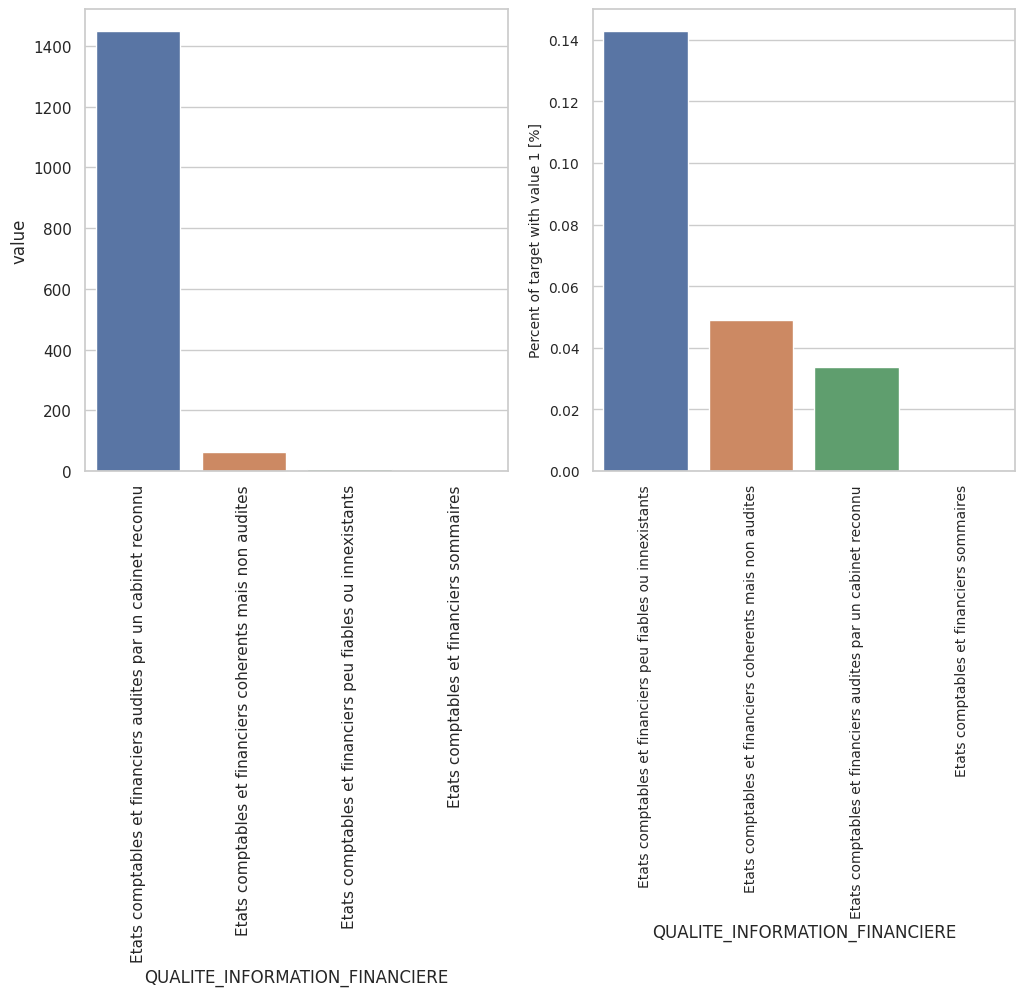

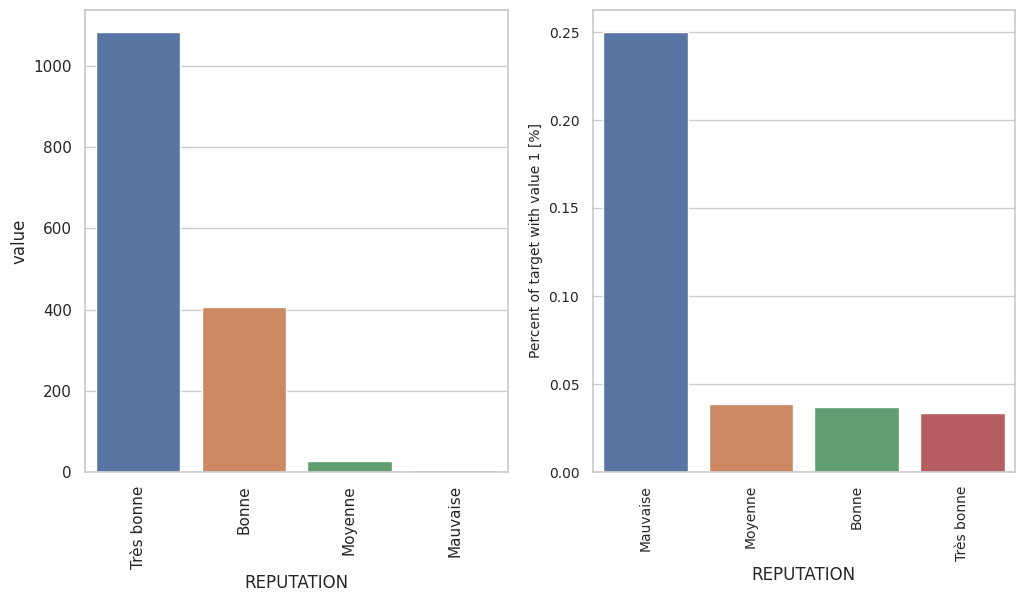

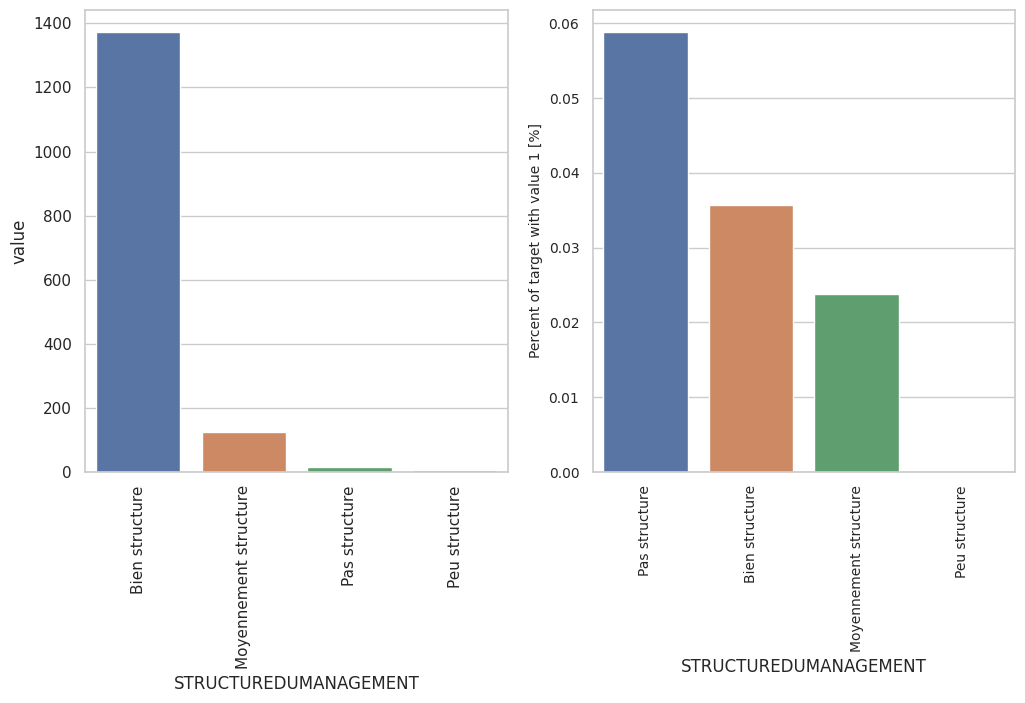

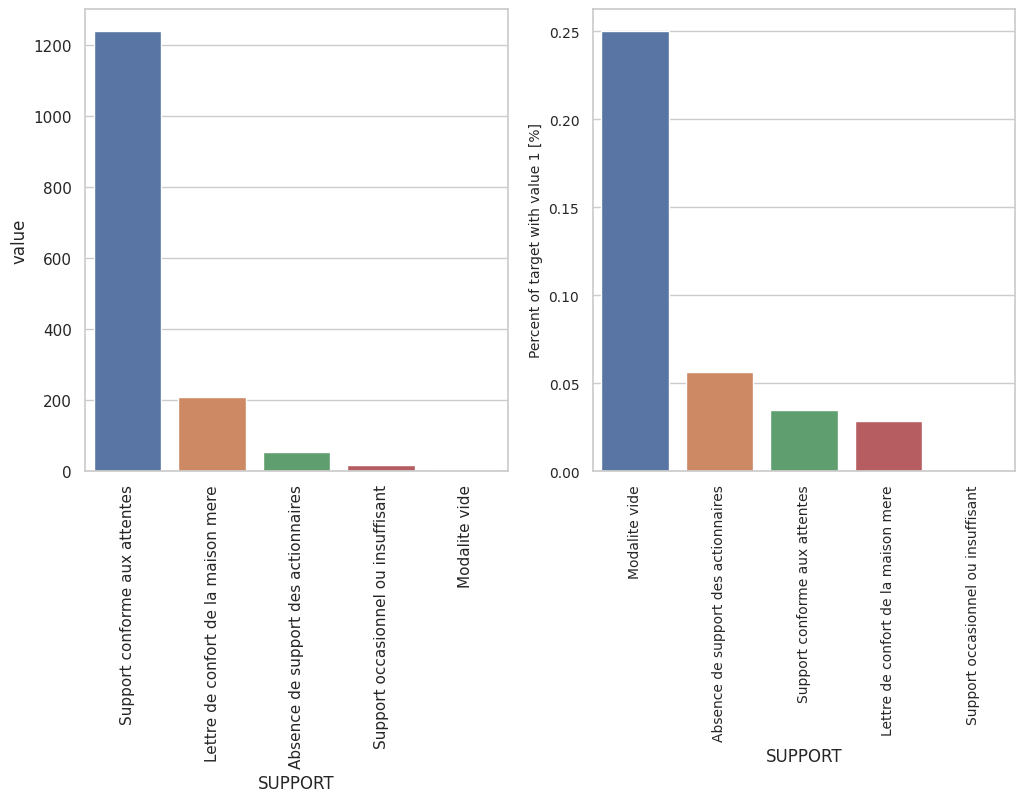

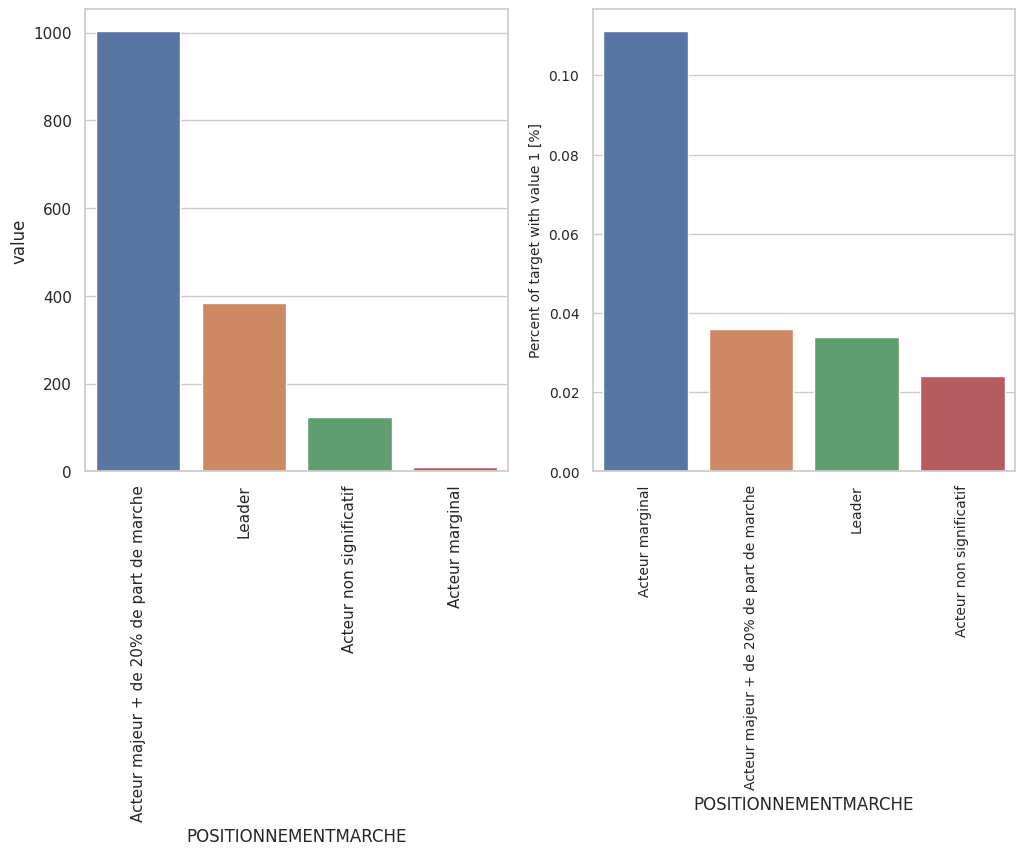

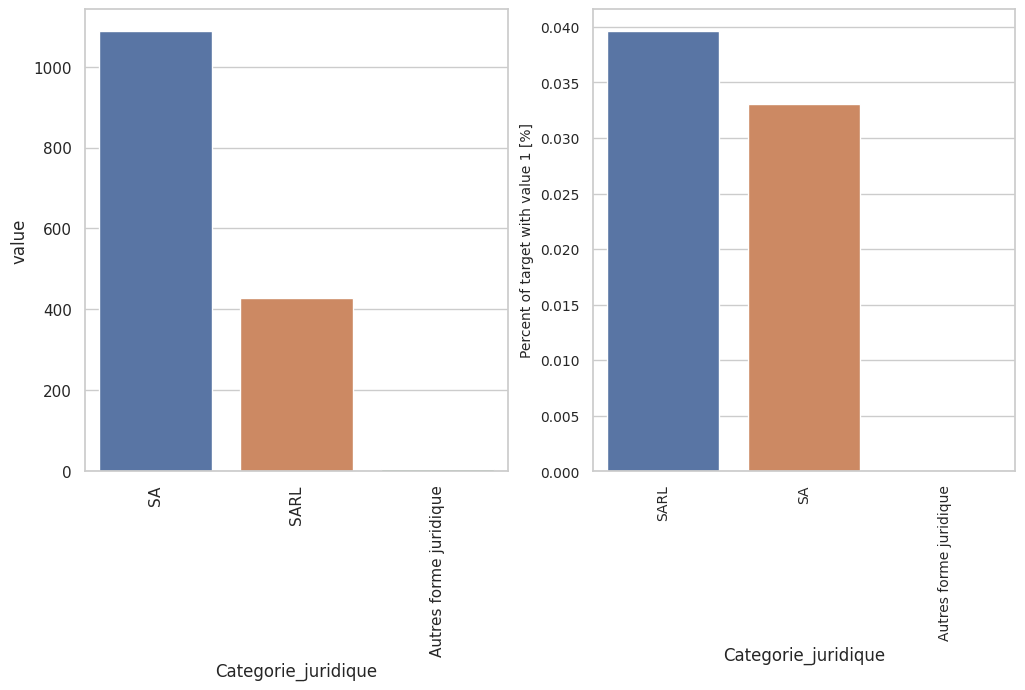

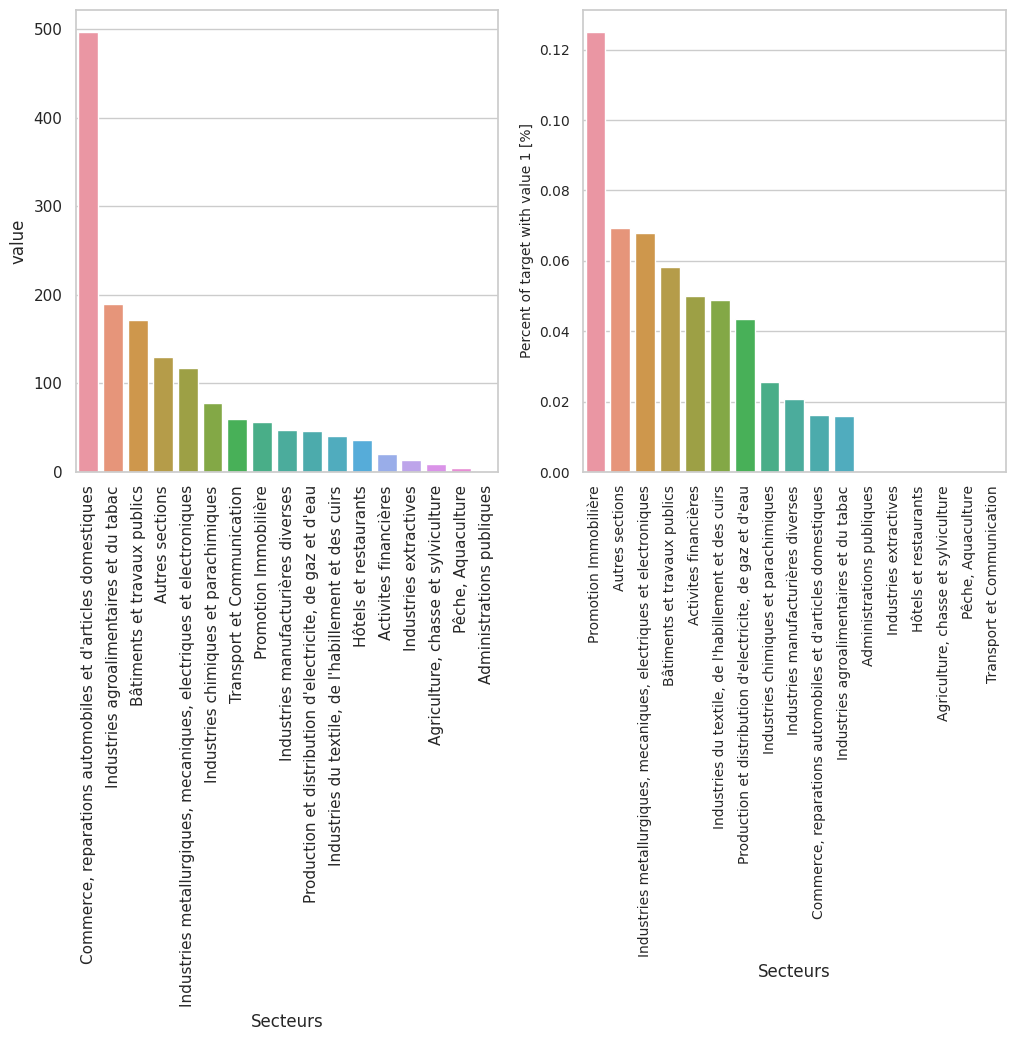

In [45]:
# Assuming your categorical data DataFrame is named 'data'
for feature in categorical_columns:
    if feature in data.columns:
        cat_stats(feature, data)
        plt.show()
    else:
        print(f"Column '{feature}' not found in the DataFrame.")


The analysis of features with 'Modalite vide' reveals interesting insights. Specifically, when examining the frequency of this category in relation to the target variable, it becomes evident that 'Modalite vide' is the most frequent class when the target variable is '1' for the features 'SUPPORT,' 'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT,' and 'DIVERSITE_CLIENTS.' This observation suggests that instances with 'Modalite vide' are associated with the positive class of the target variable. Consequently, we can infer that 'Modalite vide' is an important aspect of the data. Instead of removing these instances, it may be more beneficial to impute the missing values in these features, acknowledging their potential significance in predicting the target variable.

In [46]:
for feature in categorical_columns:
    if 'Modalite vide' in data[feature].values:
        most_frequent_modality = data[feature].mode()[0]
        data[feature].replace('Modalite vide', most_frequent_modality, inplace=True)


In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

keys = []
tables = []

for variable in categorical_columns:
    model = ols('defaut ~ C({}, Sum)'.format(variable), data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    keys.append(variable)
    tables.append(anova_table)

df_anova = pd.concat(tables, keys=keys, axis=0)

# Display the ANOVA results
print(df_anova)



                                                                                            sum_sq  \
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT C(EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT, Sum)   0.019824   
                                        Residual                                         51.133365   
DIVERSITE_CLIENTS                       C(DIVERSITE_CLIENTS, Sum)                         1.898746   
                                        Residual                                         49.254443   
DIVERSITE_FOURNISSEURS                  C(DIVERSITE_FOURNISSEURS, Sum)                    0.127521   
                                        Residual                                         51.025668   
IMPACT_SOCIAUX_ENVIRONNEMENTAL          C(IMPACT_SOCIAUX_ENVIRONNEMENTAL, Sum)            1.104734   
                                        Residual                                         50.048454   
NIVEAU_COMPETITIVITE                    C(NIVEAU_COMPETITIVITE, Sum)              

## Label Encoding :

In [48]:
data['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT'].replace(['Plus de 10 ans', 'Entre 5 et 10 ans', 'Inferieure e 5 ans'],(0,1,2),inplace=True)
data['DIVERSITE_FOURNISSEURS'].replace(['Pas de diversite', 'Diversite moyenne', 'Diversite insufisante', 'Très grande diversite'],(0,1,2,3),inplace=True)
data['REPUTATION'].replace(['Mauvaise', 'Moyenne', 'Bonne', 'Très bonne'],(0,1,2,3),inplace=True)
data['STRUCTUREDUMANAGEMENT'].replace(['Pas structure','Peu structure',  'Moyennement structure' ,'Bien structure'],(0,1,2,3),inplace=True)

## OneHotEncoding :

In [49]:
data=pd.get_dummies(data)

# Model Selection :

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Assuming df is your DataFrame
X = df.drop('defaut', axis=1)
y = df['defaut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def modeling(model):
    smote = SMOTE(random_state=123)
    rfe = RFE(estimator=model, n_features_to_select=60)
    pipeline = Pipeline(steps=[('smt', smote), ('s', rfe), ('m', model)])
    pipeline.fit(X_train, y_train)

    # Use predict_proba for ROC-AUC calculation
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, pipeline.predict(X_test), average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba, average='weighted')

    print('confusion_matrix: ', '\n', confusion_matrix(y_test, pipeline.predict(X_test)))
    print('classification_report: ', '\n', classification_report(y_test, pipeline.predict(X_test)))
    print('f1_score: ', f1)
    print('roc_auc_score:', roc_auc)

# Example usage with Logistic Regression
logistic_model = LogisticRegression(random_state=42)
modeling(logistic_model)

# Example usage with Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
modeling(tree_model)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

confusion_matrix:  
 [[262 109]
 [  5   5]]
classification_report:  
               precision    recall  f1-score   support

           0       0.98      0.71      0.82       371
           1       0.04      0.50      0.08        10

    accuracy                           0.70       381
   macro avg       0.51      0.60      0.45       381
weighted avg       0.96      0.70      0.80       381

f1_score:  0.8018764187998596
roc_auc_score: 0.6563342318059299
confusion_matrix:  
 [[339  32]
 [ 10   0]]
classification_report:  
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       371
           1       0.00      0.00      0.00        10

    accuracy                           0.89       381
   macro avg       0.49      0.46      0.47       381
weighted avg       0.95      0.89      0.92       381

f1_score:  0.9169510061242345
roc_auc_score: 0.4568733153638814


The outcomes of the classification analysis reveal the presence of an imbalanced dataset, with a significant majority of instances associated with the "0" class. This imbalance has the potential to impact the effectiveness of the models, particularly when assessing metrics such as precision, recall, and F1-score.

The Logistic Regression model exhibits notable characteristics:

- The model demonstrates high precision for class "0" (non-default) but experiences a decline in precision for class "1" (default). This outcome aligns with expectations given the imbalanced nature of the classes.
- The recall for class "1" is also diminished, indicating the model's difficulty in accurately identifying instances belonging to class "1."
- The imbalanced dataset contributes to a reduced F1-score, reflecting the compromise in model performance.

Similarly, the Decision Tree model displays comparable trends:

- High precision is observed for class "0," while precision for class "1" is diminished.
- The recall for class "1" registers at zero, signifying the model's inability to correctly identify any instances of class "1."
- The F1-score for class "1" is likewise zero, a consequence of the absence of recall for that class.

# Enhancing Our Model Performance :

In [65]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from numpy import mean
from numpy import std
smote=SMOTE(random_state=123)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)
model = RandomForestClassifier()
pipeline1 = Pipeline(steps=[('smt',smote),('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_f1 = cross_val_score(pipeline1, X1, y1, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores_roc_auc = cross_val_score(pipeline1, X1, y1, scoring='roc_auc_ovo_weighted', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('f1_score: %.3f (%.3f)' % (mean(n_scores_f1), std(n_scores_f1)))
print('roc_auc_score: %.3f (%.3f)' % (mean(n_scores_roc_auc), std(n_scores_roc_auc)))

f1_score: 0.941 (0.010)
roc_auc_score: 0.658 (0.114)



We choosed a combination of approaches including addressing class imbalance, hyperparameter tuning, and experimenting with a different model (Random Forest) to enhance the performance. We'll also use cross-validation for a more reliable estimate of the model's performance

## Step 1: Address Class Imbalance using SMOTE


In [74]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame
X = df.drop('defaut', axis=1)
y = df['defaut']

# Address class imbalance using SMOTE
smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)


## Step 2: Hyperparameter Tuning for Random Forest



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

scorer = make_scorer(f1_score, average='weighted')  # Use F1-score as the evaluation metric

grid_search = GridSearchCV(rf_model, param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Step 3: Evaluate Model on Test Dataset




In [77]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assuming X_test and y_test are your test dataset
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Predictions on test data
y_pred = grid_search.best_estimator_.predict(X_test_resampled)

# Evaluate the model on the test dataset
print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test_resampled, y_pred))


Confusion Matrix:
[[371   0]
 [ 72 299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       1.00      0.81      0.89       371

    accuracy                           0.90       742
   macro avg       0.92      0.90      0.90       742
weighted avg       0.92      0.90      0.90       742


ROC-AUC Score: 0.9029649595687331
